In [1]:
import code_extract as ce
import test_extract as te
import pandas as pd
import numpy as np

## Apache Projects:
- P1 - Apache Maven Surefire Plugin
- P2 - Apache Dubbo

### P1 modules test coverage (Sonarqube & Jacoco)

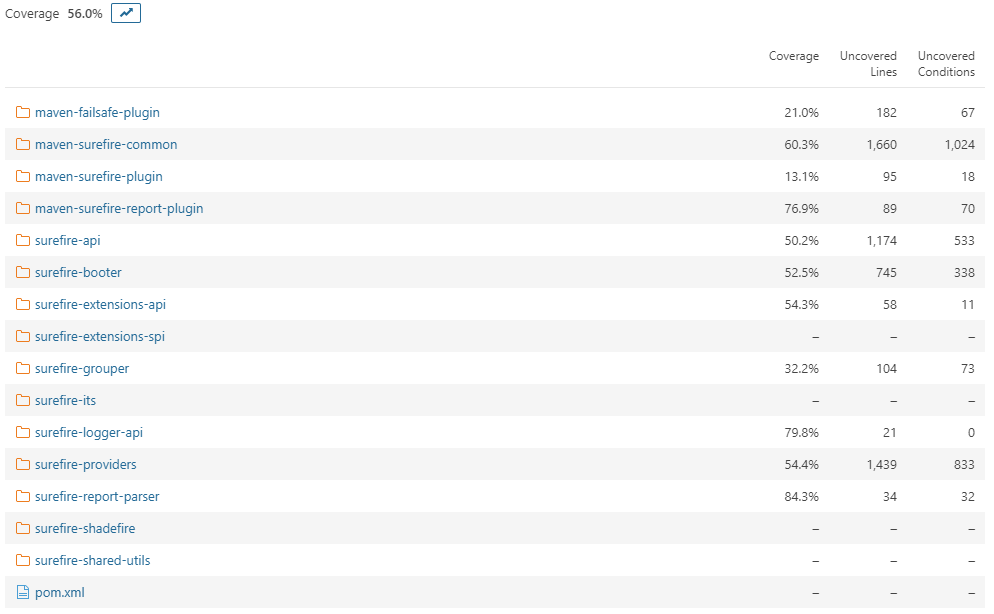

### P2 modules test coverage (Sonarqube & Jacoco)

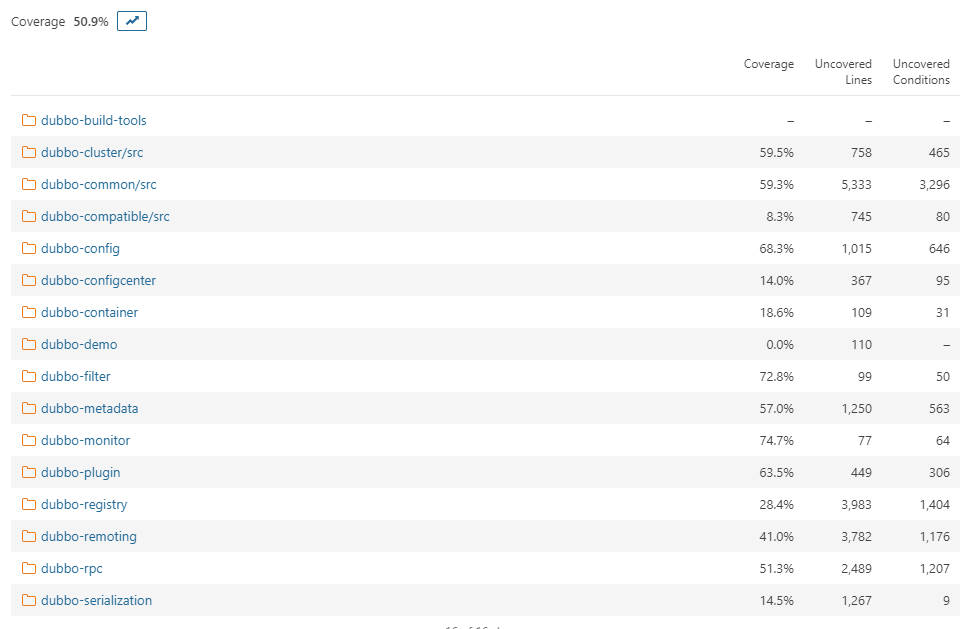

In [2]:
p1_modules = [
    'maven-failsafe-plugin',
    'maven-surefire-common',
    'maven-surefire-plugin',
    'maven-surefire-report-plugin',
    'surefire-api',
    'surefire-booter',
    'surefire-extensions-api',
    'surefire-grouper',
    'surefire-logger-api',
    'surefire-providers',
    'surefire-report-parser'    
]

In [3]:
p2_modules = ['dubbo-cluster',
              'dubbo-common',
              'dubbo-compatible',
              'dubbo-config',
              'dubbo-configcenter',
              'dubbo-container',
              'dubbo-filter',
              'dubbo-metadata',
              'dubbo-monitor',
              'dubbo-plugin',
              'dubbo-registry',
              'dubbo-remoting',
              'dubbo-rpc',
              'dubbo-serialization']

In [4]:
# taken from sonarqube + jacoco reports for each module

p1_baseline_res = [0.210,
                   0.603,
                   0.131,
                   0.769,
                   0.502,
                   0.525,
                   0.543,
                   0.322,
                   0.798,
                   0.544,
                   0.843]

p2_baseline_res = [0.595, 
                0.593, 
                0.083, 
                0.683, 
                0.140, 
                0.186, 
                0.728, 
                0.570, 
                0.747, 
                0.635, 
                0.284, 
                0.410, 
                0.513, 
                0.145]

In [5]:
import spacy

nlp = spacy.load('en_core_web_md')
nlp.max_length = 4000000

In [6]:
p1_baseline_df = pd.DataFrame(np.transpose([p1_modules, p1_baseline_res]), columns=['P1 Module', 'Baseline'])
p1_baseline_df

,P1 Module,Baseline
0,maven-failsafe-plugin,0.21
1,maven-surefire-common,0.603
2,maven-surefire-plugin,0.131
3,maven-surefire-report-plugin,0.769
4,surefire-api,0.502
5,surefire-booter,0.525
6,surefire-extensions-api,0.543
7,surefire-grouper,0.322
8,surefire-logger-api,0.798
9,surefire-providers,0.544


In [7]:
p2_baseline_df = pd.DataFrame(np.transpose([p2_modules, p2_baseline_res]), columns=['P2 Module', 'Baseline'])
p2_baseline_df

,P2 Module,Baseline
0,dubbo-cluster,0.595
1,dubbo-common,0.593
2,dubbo-compatible,0.083
3,dubbo-config,0.683
4,dubbo-configcenter,0.14
5,dubbo-container,0.186
6,dubbo-filter,0.728
7,dubbo-metadata,0.57
8,dubbo-monitor,0.747
9,dubbo-plugin,0.635


### Extract from P1 and P2

In [8]:
p1_code = []

for module in p1_modules:
    p1_code.append(ce.extract_from_code('repo/maven-surefire/{}/'.format(module), nlp))

In [9]:
p2_code = []

for module in p2_modules:
    p2_code.append(ce.extract_from_code('repo/dubbo/{}/'.format(module), nlp))

In [10]:
p1_test = []

for module in p1_modules:
    p1_test.append(te.extract_from_test('repo/maven-surefire/{}/'.format(module), nlp))

In [11]:
p2_test = []

for module in p2_modules:
    p2_test.append(te.extract_from_test('repo/dubbo/{}/'.format(module), nlp))

In [12]:
p1_code_clean = [len(x.replace(',', ' ').split()) for x in p1_code]
p1_test_clean = [len(x.replace(',', ' ').split()) for x in p1_test]

In [13]:
p2_code_clean = [len(x.replace(',', ' ').split()) for x in p2_code]
p2_test_clean = [len(x.replace(',', ' ').split()) for x in p2_test]

In [14]:
p1_data_df = pd.DataFrame(np.transpose([p1_modules, p1_code, p1_code_clean, p1_test, p1_test_clean]), columns=['P1 Module', 'Code Extraction', 'Code Length', 'Test Extraction', 'Test Length'])
p1_data_df

,P1 Module,Code Extraction,Code Length,Test Extraction,Test Length
0,maven-failsafe-plugin,verify mojo skip test skip skip exec skip test...,268,basic web client client url property property ...,406
1,maven-surefire-common,surefire mojo fork fork always always fork nev...,5741,iterable artifact artifact class directory cla...,4497
2,maven-surefire-plugin,surefire plugin class directory test failure i...,448,surefire plugin expect expect include report s...,23
3,maven-surefire-report-plugin,surefire report mojo show success report direc...,703,"suite suite,mojo renderer renderer dir rendere...",113
4,surefire-api,provider factory inside fork reporter factory ...,2854,control event report entry event run mode run ...,1530
5,surefire-booter,path configuration child delegation child dele...,2343,master process channel encoder event channel c...,1032
6,surefire-extensions-api,closeable daemon thread thread closeable close...,314,stateless testset info console report event li...,124
7,surefire-grouper,group matcher group matcher group matcher matc...,596,group matcher do not match one group match gro...,89
8,surefire-logger-api,"console logger,console logger decorator object...",115,console logger util print stacktrace print sta...,23
9,surefire-providers,"match stack trace element element,match stack ...",2953,"npe,assertion message something,sub,fail nest ...",3628


In [15]:
p2_data_df = pd.DataFrame(np.transpose([p2_modules, p2_code, p2_code_clean, p2_test, p2_test_clean]), columns=['P2 Module', 'Code Extraction', 'Code Length', 'Test Extraction', 'Test Length'])
p2_data_df

,P2 Module,Code Extraction,Code Length,Test Extraction,Test Length
0,dubbo-cluster,cacheable router factory router factory concur...,2206,short response load balance load balance short...,1412
1,dubbo-common,"activate,reference,service,service metadata co...",12861,"service metadata,pojo utils non non non,url bu...",3865
2,dubbo-compatible,"cache cache,cache factory cache factory,cache ...",1781,cache cache factory target service unique prot...,772
3,dubbo-config,"config initializer,config processor,dubbo shut...",5234,config append append append validate protocol ...,3288
4,dubbo-configcenter,apollo dynamic configuration dynamic configura...,690,apollo dynamic configuration session timeout k...,211
5,dubbo-container,"container,container key shutdown hook key logg...",64,"container container,logback container logger l...",14
6,dubbo-filter,"cache,cache factory,cache filter filter cache ...",474,cache filter rpc invocation invocation cache f...,183
7,dubbo-metadata,metadata param filter metadata param filter se...,4476,"demo service,metadata info revision,metadata s...",3517
8,dubbo-monitor,"constant,metric service,monitor node monitor s...",413,monitor factory monitor factory monitor factor...,274
9,dubbo-plugin,access key authenticator authenticator sign in...,1139,"access key authenticator,access key storage,co...",673


In [16]:
p1_len_df = pd.DataFrame(np.transpose([p1_modules, p1_code_clean, p1_test_clean]), columns=['Module', 'Code Token Count', 'Test Token Count'])
p1_len_df

,Module,Code Token Count,Test Token Count
0,maven-failsafe-plugin,268,406
1,maven-surefire-common,5741,4497
2,maven-surefire-plugin,448,23
3,maven-surefire-report-plugin,703,113
4,surefire-api,2854,1530
5,surefire-booter,2343,1032
6,surefire-extensions-api,314,124
7,surefire-grouper,596,89
8,surefire-logger-api,115,23
9,surefire-providers,2953,3628


In [17]:
p2_len_df = pd.DataFrame(np.transpose([p2_modules, p2_code_clean, p2_test_clean]), columns=['Module', 'Code Token Count', 'Test Token Count'])
p2_len_df

,Module,Code Token Count,Test Token Count
0,dubbo-cluster,2206,1412
1,dubbo-common,12861,3865
2,dubbo-compatible,1781,772
3,dubbo-config,5234,3288
4,dubbo-configcenter,690,211
5,dubbo-container,64,14
6,dubbo-filter,474,183
7,dubbo-metadata,4476,3517
8,dubbo-monitor,413,274
9,dubbo-plugin,1139,673


In [18]:
total_len_df = pd.concat([p1_len_df, p2_len_df])

In [19]:
total_len_df['Code Token Count'] = total_len_df['Code Token Count'].astype(int)
total_len_df['Test Token Count'] = total_len_df['Test Token Count'].astype(int)

In [20]:
total_len_df = total_len_df.set_index('Module')

DEBUG:matplotlib:CONFIGDIR=C:\Users\biadge\.matplotlib
DEBUG:matplotlib:(private) matplotlib data path: c:\users\biadge\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:matplotlib data path: c:\users\biadge\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:loaded rc file c:\users\biadge\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\matplotlibrc
DEBUG:matplotlib:matplotlib version 3.2.1
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'encodings.cp1252', 'site', 'os', 'stat', '_stat', 'ntpath

DEBUG:matplotlib:CACHEDIR=C:\Users\biadge\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\biadge\.matplotlib\fontlist-v310.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STI

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 6.613636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal demi condensed>) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 4.6863636363636365
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Dubai' (DUBAI-REGULAR.TTF) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal bold condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfon

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal demibold normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal bold condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal light normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Parchment' (PARCHM.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gill Sans MT' (GIL_____.TTF)

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Engravers MT' (ENGR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal demi normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal bold condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Castellar' (CASTELAR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Mono' (UbuntuMono-R.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kunstler Script' (KUNSTLER.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 3.6863636363636365
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SimSun' 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG:m

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gigi' (GIGI.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 6.413636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibril.ttf) normal n

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Schoolbook' (SCHLBKB.TTF) normal normal book normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal book normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (arialbd.ttf) normal normal bold normal>) = 6.698636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Uighur' (MSUIGHUB.TTF) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Fo

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Univers for BP' (UniversforBP-Roman.ttf) normal normal roman normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal book normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<F

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft JhengHei' (msjh.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal book normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Candara' (Cand

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal book normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tw Cen MT' (TCMI____.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal book normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('c:\\users\\biadge\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0

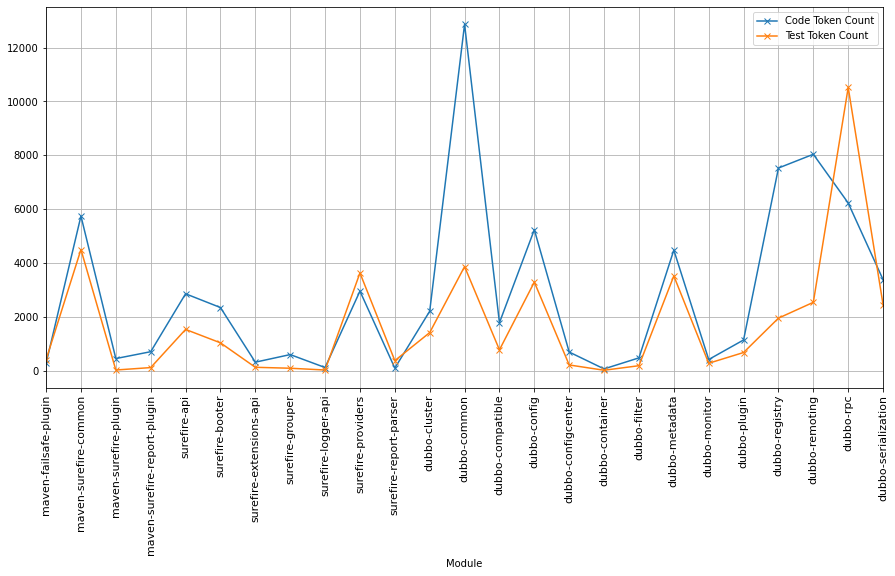

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,7)

total_len_df.plot(grid=True, marker='x', xlim=(0,24))
#plt.style.use('seaborn-white')
#plt.grid(b=True)
#plt.xticks(total_len_df.index, total_len_df.index, rotation=90)
plt.xticks(list(range(len(p1_modules+p2_modules))), total_len_df.index, fontsize=11, rotation=90)
plt.show()

In [22]:
total_len_df['TKP'] = total_len_df['Test Token Count'] / total_len_df['Code Token Count']

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [23]:
total_len_df

,Code Token Count,Test Token Count,TKP
Module,,,
maven-failsafe-plugin,268,406,1.514925
maven-surefire-common,5741,4497,0.783313
maven-surefire-plugin,448,23,0.051339
maven-surefire-report-plugin,703,113,0.160740
surefire-api,2854,1530,0.536090
surefire-booter,2343,1032,0.440461
surefire-extensions-api,314,124,0.394904
surefire-grouper,596,89,0.149329
surefire-logger-api,115,23,0.200000


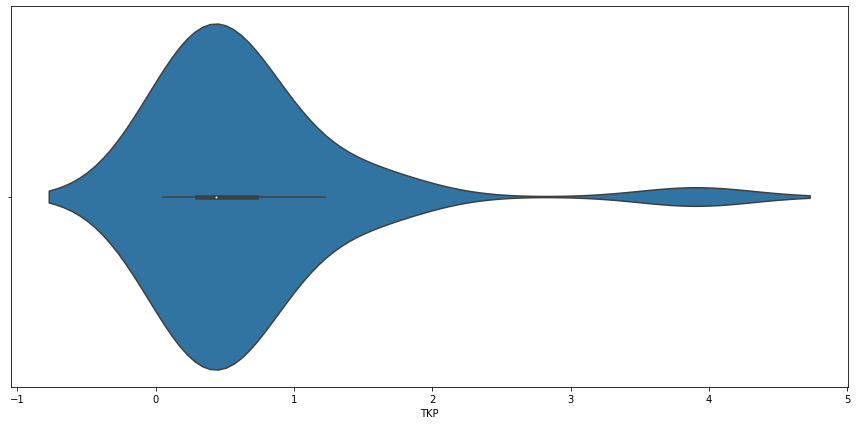

In [24]:
import seaborn as sns

sns.violinplot(total_len_df['TKP'])

### Jaccard Similarity

In [115]:
def get_jaccard_sim(code, test): 
    a = set(code.split()) 
    b = set(test.split())
    c = a.intersection(b)
    
#     result = {
#         'No. of words in android-gpuimage Code Set': a,
#         'No. of words in android-gpuimage Documentation Set': b
#     }
    
#     venn(result)
    
    return float(len(c)) / (len(a) + len(b) - len(c))

In [116]:
p1_jaccard_res = []
i = 0

while i < len(p1_modules):
    res = ( p1_modules[i], get_jaccard_sim(p1_code[i],p1_test[i]) )
    p1_jaccard_res.append(res)
    i+=1
    
p1_res1_df = pd.DataFrame(p1_jaccard_res, columns=['P1 Module','P1 Jaccard Sim'])
p1_res1_df

,P1 Module,P1 Jaccard Sim
0,maven-failsafe-plugin,0.213333
1,maven-surefire-common,0.382900
2,maven-surefire-plugin,0.116505
3,maven-surefire-report-plugin,0.138728
4,surefire-api,0.295290
5,surefire-booter,0.392704
6,surefire-extensions-api,0.233010
7,surefire-grouper,0.053691
8,surefire-logger-api,0.235294
9,surefire-providers,0.284495


In [117]:
p2_jaccard_res = []
i = 0

while i < len(p2_modules):
    res = ( p2_modules[i], get_jaccard_sim(p2_code[i],p2_test[i]) )
    p2_jaccard_res.append(res)
    i+=1
    
p2_res1_df = pd.DataFrame(p2_jaccard_res, columns=['P2 Module','P2 Jaccard Sim'])
p2_res1_df

,P2 Module,P2 Jaccard Sim
0,dubbo-cluster,0.246305
1,dubbo-common,0.267118
2,dubbo-compatible,0.186170
3,dubbo-config,0.333809
4,dubbo-configcenter,0.252033
5,dubbo-container,0.103448
6,dubbo-filter,0.200000
7,dubbo-metadata,0.251799
8,dubbo-monitor,0.271186
9,dubbo-plugin,0.219653


In [118]:
jacc_a = set(p1_code[1].split())
jacc_b = set(p1_test[1].split())
jacc_c = jacc_a.intersection(jacc_b)

In [119]:
print(len(jacc_a))
print(len(jacc_b))
print(len(jacc_c))

580
536
309


In [120]:
float(len(jacc_c)) / (len(jacc_a) + len(jacc_b) - len(jacc_c))

0.3828996282527881

### Cosine Similarity with TFIDF Vectorizer

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

p1_tfidf = []

tfidf_vectorizer = TfidfVectorizer()

i = 0

while i < len(p1_modules):
    p1_tfidf.append(tfidf_vectorizer.fit_transform([p1_code[i], p1_test[i]]))
    i+=1

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

p2_tfidf = []

tfidf_vectorizer = TfidfVectorizer()

i = 0

while i < len(p2_modules):
    p2_tfidf.append(tfidf_vectorizer.fit_transform([p2_code[i], p2_test[i]]))
    i+=1

In [123]:
p1_tfidf

[<2x146 sparse matrix of type '<class 'numpy.float64'>'
 	with 179 stored elements in Compressed Sparse Row format>,
 <2x676 sparse matrix of type '<class 'numpy.float64'>'
 	with 990 stored elements in Compressed Sparse Row format>,
 <2x102 sparse matrix of type '<class 'numpy.float64'>'
 	with 114 stored elements in Compressed Sparse Row format>,
 <2x161 sparse matrix of type '<class 'numpy.float64'>'
 	with 186 stored elements in Compressed Sparse Row format>,
 <2x444 sparse matrix of type '<class 'numpy.float64'>'
 	with 614 stored elements in Compressed Sparse Row format>,
 <2x426 sparse matrix of type '<class 'numpy.float64'>'
 	with 614 stored elements in Compressed Sparse Row format>,
 <2x88 sparse matrix of type '<class 'numpy.float64'>'
 	with 113 stored elements in Compressed Sparse Row format>,
 <2x138 sparse matrix of type '<class 'numpy.float64'>'
 	with 147 stored elements in Compressed Sparse Row format>,
 <2x29 sparse matrix of type '<class 'numpy.float64'>'
 	with 39 

In [124]:
from sklearn.metrics.pairwise import cosine_similarity

def get_cos_sim(code, test):
    return cosine_similarity(code, test)

In [125]:
p1_tfidf_res = []
i = 0

while i < len(p1_modules):
    res = ( p1_modules[i], get_cos_sim(p1_tfidf[i], p1_tfidf[i])[0][1] )
    p1_tfidf_res.append(res)
    i+=1
    
p1_res2_df = pd.DataFrame(p1_tfidf_res, columns=['P1 Module','P1 Cos Sim + TFIDF'])
p1_res2_df

,P1 Module,P1 Cos Sim + TFIDF
0,maven-failsafe-plugin,0.290981
1,maven-surefire-common,0.725239
2,maven-surefire-plugin,0.168704
3,maven-surefire-report-plugin,0.383015
4,surefire-api,0.628109
5,surefire-booter,0.639367
6,surefire-extensions-api,0.339394
7,surefire-grouper,0.237036
8,surefire-logger-api,0.358280
9,surefire-providers,0.438886


In [126]:
p2_tfidf_res = []
i = 0

while i < len(p2_modules):
    res = ( p2_modules[i], get_cos_sim(p2_tfidf[i], p2_tfidf[i])[0][1] )
    p2_tfidf_res.append(res)
    i+=1
    
p2_res2_df = pd.DataFrame(p2_tfidf_res, columns=['P2 Module','P2 Cos Sim + TFIDF'])
p2_res2_df

,P2 Module,P2 Cos Sim + TFIDF
0,dubbo-cluster,0.694716
1,dubbo-common,0.607956
2,dubbo-compatible,0.485741
3,dubbo-config,0.517930
4,dubbo-configcenter,0.686853
5,dubbo-container,0.679380
6,dubbo-filter,0.522603
7,dubbo-metadata,0.682495
8,dubbo-monitor,0.765477
9,dubbo-plugin,0.493226


### Cosine Similarity with Averaged Word2Vec

In [127]:
from gensim.models.keyedvectors import KeyedVectors
from nltk import word_tokenize

so_w2v_model = KeyedVectors.load_word2vec_format('C:/Users/biadge/OneDrive - BP/PhD/extraction/SO_vectors_200.bin', binary=True)

INFO:gensim.models.utils_any2vec:loading projection weights from C:/Users/biadge/OneDrive - BP/PhD/extraction/SO_vectors_200.bin
DEBUG:smart_open.smart_open_lib:{'uri': 'C:/Users/biadge/OneDrive - BP/PhD/extraction/SO_vectors_200.bin', 'mode': 'rb', 'buffering': -1, 'encoding': None, 'errors': None, 'newline': None, 'closefd': True, 'opener': None, 'ignore_ext': False, 'transport_params': None}
INFO:gensim.models.utils_any2vec:loaded (1787145, 200) matrix from C:/Users/biadge/OneDrive - BP/PhD/extraction/SO_vectors_200.bin


In [128]:
import numpy as np
from scipy import spatial

index2word_set = set(so_w2v_model.index2word)

def avg_feature_vector(sentence, model=so_w2v_model, num_features=200, index2word_set=index2word_set):
    words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [129]:
p1_sow2v_res = []
i = 0

while i < len(p1_modules):
    code_vector = avg_feature_vector(p1_code[i])
    test_vector = avg_feature_vector(p1_test[i])
    res = ( p1_modules[i], 1 - spatial.distance.cosine(code_vector, test_vector) )
    p1_sow2v_res.append(res)
    i+=1
    
p1_res3_df = pd.DataFrame(p1_sow2v_res, columns=['P1 Module','P1 Cos Sim + W2V'])
p1_res3_df

,P1 Module,P1 Cos Sim + W2V
0,maven-failsafe-plugin,0.879926
1,maven-surefire-common,0.981578
2,maven-surefire-plugin,0.805044
3,maven-surefire-report-plugin,0.769315
4,surefire-api,0.945042
5,surefire-booter,0.980915
6,surefire-extensions-api,0.818550
7,surefire-grouper,0.684036
8,surefire-logger-api,0.825659
9,surefire-providers,0.956905


In [130]:
p2_sow2v_res = []
i = 0

while i < len(p2_modules):
    code_vector = avg_feature_vector(p2_code[i])
    test_vector = avg_feature_vector(p2_test[i])
    res = ( p2_modules[i], 1 - spatial.distance.cosine(code_vector, test_vector) )
    p2_sow2v_res.append(res)
    i+=1
    
p2_res3_df = pd.DataFrame(p2_sow2v_res, columns=['P2 Module','P2 Cos Sim + W2V'])
p2_res3_df

,P2 Module,P2 Cos Sim + W2V
0,dubbo-cluster,0.931697
1,dubbo-common,0.952783
2,dubbo-compatible,0.906468
3,dubbo-config,0.945948
4,dubbo-configcenter,0.952482
5,dubbo-container,0.851279
6,dubbo-filter,0.848411
7,dubbo-metadata,0.944736
8,dubbo-monitor,0.933463
9,dubbo-plugin,0.935490


### Text Similarity Summary

In [131]:
p1_summ_df = p1_res1_df.merge(p1_res2_df).merge(p1_res3_df)
#p1_summ_df['Baseline'] = p1_baseline_res
p1_summ_df

,P1 Module,P1 Jaccard Sim,P1 Cos Sim + TFIDF,P1 Cos Sim + W2V
0,maven-failsafe-plugin,0.213333,0.290981,0.879926
1,maven-surefire-common,0.382900,0.725239,0.981578
2,maven-surefire-plugin,0.116505,0.168704,0.805044
3,maven-surefire-report-plugin,0.138728,0.383015,0.769315
4,surefire-api,0.295290,0.628109,0.945042
5,surefire-booter,0.392704,0.639367,0.980915
6,surefire-extensions-api,0.233010,0.339394,0.818550
7,surefire-grouper,0.053691,0.237036,0.684036
8,surefire-logger-api,0.235294,0.358280,0.825659
9,surefire-providers,0.284495,0.438886,0.956905


In [132]:
p2_summ_df = p2_res1_df.merge(p2_res2_df).merge(p2_res3_df)
#p2_summ_df['Baseline'] = p2_baseline_res
p2_summ_df

,P2 Module,P2 Jaccard Sim,P2 Cos Sim + TFIDF,P2 Cos Sim + W2V
0,dubbo-cluster,0.246305,0.694716,0.931697
1,dubbo-common,0.267118,0.607956,0.952783
2,dubbo-compatible,0.186170,0.485741,0.906468
3,dubbo-config,0.333809,0.517930,0.945948
4,dubbo-configcenter,0.252033,0.686853,0.952482
5,dubbo-container,0.103448,0.679380,0.851279
6,dubbo-filter,0.200000,0.522603,0.848411
7,dubbo-metadata,0.251799,0.682495,0.944736
8,dubbo-monitor,0.271186,0.765477,0.933463
9,dubbo-plugin,0.219653,0.493226,0.935490


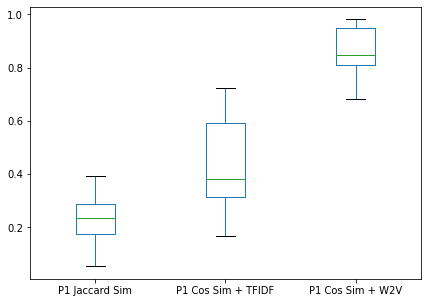

In [133]:
p1_summ_df.plot(kind='box', figsize=(7,5))

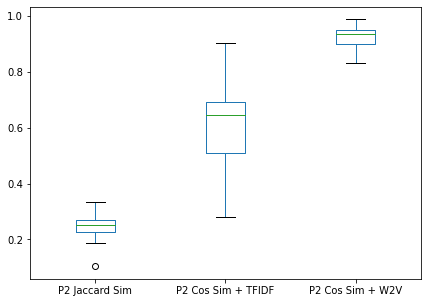

In [134]:
p2_summ_df.plot(kind='box', figsize=(7,5))

In [135]:
# print(p1_jaccard_res.mean())
# print(p2_jaccard_res.mean())
# print(p1_tfidf_res.mean())
# print(p2_tfidf_res.mean())
# print(p1_sow2v_res.mean())
# print(p2_sow2v_res.mean())

In [136]:
p1_summ_df = p1_summ_df.rename({'P1 Module': 'Module'}, axis=1)
p2_summ_df = p2_summ_df.rename({'P2 Module': 'Module'}, axis=1)

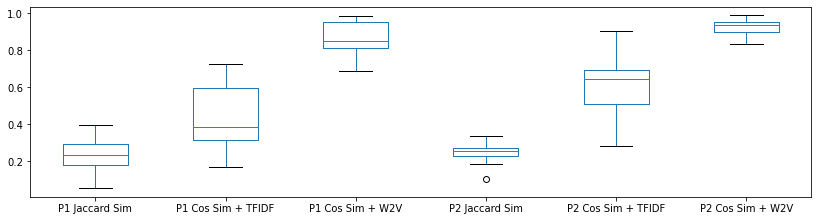

In [137]:
pd.concat([p1_summ_df, p2_summ_df], ignore_index=True).plot(kind='box', figsize=(14,3.5))

### Topic Modeling with LDA

In [47]:
p1_data_df['Code Extraction'] = p1_data_df['Code Extraction'].apply(lambda x: x.split(','))
p1_data_df['Test Extraction'] = p1_data_df['Test Extraction'].apply(lambda x: x.split(','))

In [48]:
p1_data_df['Code Extraction'] = p1_data_df['Code Extraction'].apply(lambda x: [y.split() for y in x])
p1_data_df['Test Extraction'] = p1_data_df['Test Extraction'].apply(lambda x: [y.split() for y in x])

In [49]:
p1_data_df

,P1 Module,Code Extraction,Code Length,Test Extraction,Test Length
0,maven-failsafe-plugin,"[[verify, mojo, skip, test, skip, skip, exec, ...",268,"[[basic, web, client, client, url, property, p...",406
1,maven-surefire-common,"[[surefire, mojo, fork, fork, always, always, ...",5741,"[[iterable, artifact, artifact, class, directo...",4497
2,maven-surefire-plugin,"[[surefire, plugin, class, directory, test, fa...",448,"[[surefire, plugin, expect, expect, include, r...",23
3,maven-surefire-report-plugin,"[[surefire, report, mojo, show, success, repor...",703,"[[suite, suite], [mojo, renderer, renderer, di...",113
4,surefire-api,"[[provider, factory, inside, fork, reporter, f...",2854,"[[control, event, report, entry, event, run, m...",1530
5,surefire-booter,"[[path, configuration, child, delegation, chil...",2343,"[[master, process, channel, encoder, event, ch...",1032
6,surefire-extensions-api,"[[closeable, daemon, thread, thread, closeable...",314,"[[stateless, testset, info, console, report, e...",124
7,surefire-grouper,"[[group, matcher, group, matcher, group, match...",596,"[[group, matcher, do, not, match, one, group, ...",89
8,surefire-logger-api,"[[console, logger], [console, logger, decorato...",115,"[[console, logger, util, print, stacktrace, pr...",23
9,surefire-providers,"[[match, stack, trace, element, element], [mat...",2953,"[[npe], [assertion, message, something], [sub]...",3628


In [50]:
p2_data_df['Code Extraction'] = p2_data_df['Code Extraction'].apply(lambda x: x.split(','))
p2_data_df['Test Extraction'] = p2_data_df['Test Extraction'].apply(lambda x: x.split(','))

In [51]:
p2_data_df['Code Extraction'] = p2_data_df['Code Extraction'].apply(lambda x: [y.split() for y in x])
p2_data_df['Test Extraction'] = p2_data_df['Test Extraction'].apply(lambda x: [y.split() for y in x])

In [52]:
p2_data_df

,P2 Module,Code Extraction,Code Length,Test Extraction,Test Length
0,dubbo-cluster,"[[cacheable, router, factory, router, factory,...",2206,"[[short, response, load, balance, load, balanc...",1412
1,dubbo-common,"[[activate], [reference], [service], [service,...",12861,"[[service, metadata], [pojo, utils, non, non, ...",3865
2,dubbo-compatible,"[[cache, cache], [cache, factory, cache, facto...",1781,"[[cache, cache, factory, target, service, uniq...",772
3,dubbo-config,"[[config, initializer], [config, processor], [...",5234,"[[config, append, append, append, validate, pr...",3288
4,dubbo-configcenter,"[[apollo, dynamic, configuration, dynamic, con...",690,"[[apollo, dynamic, configuration, session, tim...",211
5,dubbo-container,"[[container], [container, key, shutdown, hook,...",64,"[[container, container], [logback, container, ...",14
6,dubbo-filter,"[[cache], [cache, factory], [cache, filter, fi...",474,"[[cache, filter, rpc, invocation, invocation, ...",183
7,dubbo-metadata,"[[metadata, param, filter, metadata, param, fi...",4476,"[[demo, service], [metadata, info, revision], ...",3517
8,dubbo-monitor,"[[constant], [metric, service], [monitor, node...",413,"[[monitor, factory, monitor, factory, monitor,...",274
9,dubbo-plugin,"[[access, key, authenticator, authenticator, s...",1139,"[[access, key, authenticator], [access, key, s...",673


In [53]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

def generate_lda(corpus_in, num_topics):
    id2word = corpora.Dictionary(corpus_in)
    corpus = [id2word.doc2bow(text) for text in corpus_in]
    
    lda_model =  gensim.models.LdaMulticore(corpus=corpus, 
                                        num_topics=num_topics,
                                        random_state=42,
                                        id2word=id2word, 
                                        alpha=0.01,
                                        passes=10,
                                        per_word_topics=True,
                                        workers=2)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus_in, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    return lda_model, coherence_lda

In [54]:
p1_lda_code_res = []
p1_lda_test_res = []

for ce_data in p1_data_df['Code Extraction']:
    lm, coh_score = generate_lda(ce_data, 5)
    p1_lda_code_res.append((lm, coh_score))
    
for te_data in p1_data_df['Test Extraction']:
    lm, coh_score = generate_lda(te_data, 5)
    p1_lda_test_res.append((lm, coh_score))

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(79 unique tokens: ['basedir', 'class', 'cli', 'collection', 'command']...) from 3 documents (total 268 corpus positions)
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 5 topics, 10 passes over the supplied corpus of 3 documents, updating every 4000 documents, evaluating every ~3 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 2 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #3/3, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.103*"node" + 0.082*"line" + 0.042*"element" + 0.041*"indent" + 0.035*"length" + 0.026*"builder" + 0.026*"

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.146*"summary" + 0.098*"xml" + 0.098*"failsafe" + 0.098*"run" + 0.098*"result" + 0.035*"util" + 0.035*"message" + 0.035*"element" + 0.019*"schema" + 0.019*"template"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.024*"node" + 0.020*"element" + 0.019*"line" + 0.019*"indent" + 0.015*"goal" + 0.015*"length" + 0.015*"size" + 0.014*"summary" + 0.014*"child" + 0.014*"list"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.107*"test" + 0.107*"skip" + 0.054*"directory" + 0.054*"fail" + 0.048*"summary" + 0.041*"logger" + 0.028*"exec" + 0.028*"failure" + 0.028*"count" + 0.028*"class"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.016*"skip" + 0.016*"test" + 0.014*"fail" + 0.014*"directory" + 0.014*"summary" + 0.013*"logger" + 0.013*"count" + 0.013*"basedir" + 0.013*"report" + 0.013*"option"
INFO:gensim.models.ldamodel:topic diff=0.082177, rho=0.408197
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.880 per-word boun

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.070*"test" + 0.047*"report" + 0.030*"reporter" + 0.025*"run" + 0.025*"entry" + 0.023*"stream" + 0.021*"phrase" + 0.020*"use" + 0.020*"console" + 0.017*"event"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.047*"fork" + 0.043*"jdk" + 0.025*"attribute" + 0.019*"node" + 0.018*"artifact" + 0.014*"nonnull" + 0.014*"factory" + 0.014*"platform" + 0.014*"argument" + 0.014*"session"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.030*"event" + 0.029*"run" + 0.029*"dump" + 0.026*"report" + 0.026*"thread" + 0.025*"fork" + 0.020*"stream" + 0.018*"number" + 0.015*"nonnull" + 0.015*"result"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.047*"test" + 0.042*"report" + 0.033*"artifact" + 0.023*"property" + 0.023*"entry" + 0.020*"fork" + 0.019*"map" + 0.018*"listener" + 0.018*"output" + 0.017*"event"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.043*"listener" + 0.039*"artifact" + 0.037*"report" + 0.027*"eve

INFO:gensim.models.ldamodel:topic #4 (0.010): 0.059*"artifact" + 0.042*"listener" + 0.034*"event" + 0.028*"fork" + 0.025*"process" + 0.025*"provider" + 0.023*"classpath" + 0.022*"list" + 0.019*"test" + 0.018*"nonnull"
INFO:gensim.models.ldamodel:topic diff=0.092884, rho=0.406877
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-5.157 per-word bound, 35.7 perplexity estimate based on a held-out corpus of 81 documents with 5741 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #81/81, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.099*"report" + 0.078*"test" + 0.052*"entry" + 0.043*"reporter" + 0.037*"output" + 0.026*"console" + 0.025*"stream" + 0.022*"run" + 0.020*"phrase" + 0.019*"use"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.072*"jdk" + 0.062*"fork" + 0.044*"attribute" + 0.033*"node" + 0.026*"jvm" + 0.021*"platform" + 0.020*"factory" +

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.065*"test" + 0.042*"timeout" + 0.037*"use" + 0.035*"process" + 0.032*"second" + 0.032*"fork" + 0.029*"skip" + 0.023*"run" + 0.022*"order" + 0.022*"parallel"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.055*"node" + 0.048*"test" + 0.033*"line" + 0.027*"timeout" + 0.026*"second" + 0.025*"use" + 0.024*"element" + 0.024*"process" + 0.022*"fail" + 0.021*"indent"
INFO:gensim.models.ldamodel:topic diff=1.509448, rho=1.000000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-5.009 per-word bound, 32.2 perplexity estimate based on a held-out corpus of 2 documents with 448 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #2/2, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.042*"node" + 0.036*"test" + 0.027*"line" + 0.022*"timeout" + 0.020*"indent" + 0.020*"second" + 0.019*"process" + 0.019*"skip" + 0.0

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.013*"test" + 0.012*"second" + 0.011*"use" + 0.011*"skip" + 0.011*"directory" + 0.011*"timeout" + 0.011*"process" + 0.011*"include" + 0.011*"report" + 0.011*"count"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.074*"test" + 0.042*"use" + 0.042*"second" + 0.042*"timeout" + 0.037*"process" + 0.032*"skip" + 0.029*"fail" + 0.029*"fork" + 0.024*"run" + 0.024*"report"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.014*"test" + 0.012*"timeout" + 0.012*"use" + 0.012*"process" + 0.012*"fork" + 0.012*"second" + 0.012*"skip" + 0.011*"run" + 0.011*"parallel" + 0.011*"order"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.124*"node" + 0.086*"line" + 0.058*"element" + 0.058*"indent" + 0.039*"length" + 0.030*"list" + 0.030*"goal" + 0.030*"size" + 0.030*"builder" + 0.030*"child"
INFO:gensim.models.ldamodel:topic diff=0.089110, rho=0.377937
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.287 per-word bound, 19.5 perplex

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.007*"message" + 0.007*"error" + 0.007*"throwable" + 0.007*"sequence" + 0.007*"debug" + 0.007*"enable" + 0.007*"info" + 0.007*"content" + 0.007*"warn" + 0.007*"create"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.116*"node" + 0.081*"line" + 0.054*"element" + 0.054*"indent" + 0.037*"length" + 0.028*"child" + 0.028*"size" + 0.028*"goal" + 0.028*"builder" + 0.028*"list"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.112*"message" + 0.085*"error" + 0.057*"enable" + 0.057*"sequence" + 0.057*"throwable" + 0.044*"debug" + 0.030*"builder" + 0.030*"warn" + 0.030*"content" + 0.030*"info"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.118*"report" + 0.063*"sink" + 0.041*"text" + 0.036*"description" + 0.034*"bundle" + 0.031*"locale" + 0.029*"label" + 0.028*"title" + 0.025*"property" + 0.024*"project"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.192*"sink" + 0.066*"report" + 0.044*"locale" + 0.036*"o

INFO:gensim.models.ldamodel:topic #4 (0.010): 0.210*"sink" + 0.068*"report" + 0.035*"locale" + 0.034*"test" + 0.028*"output" + 0.025*"directory" + 0.024*"construct" + 0.024*"link" + 0.024*"property" + 0.021*"factory"
INFO:gensim.models.ldamodel:topic diff=0.019216, rho=0.377830
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.183 per-word bound, 18.2 perplexity estimate based on a held-out corpus of 10 documents with 703 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #10/10, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.007*"message" + 0.007*"error" + 0.007*"throwable" + 0.007*"sequence" + 0.007*"debug" + 0.007*"enable" + 0.007*"info" + 0.007*"content" + 0.007*"create" + 0.007*"warn"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.116*"node" + 0.081*"line" + 0.054*"element" + 0.054*"indent" + 0.037*"length" + 0.028*"child" + 0.028*"size

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.036*"loader" + 0.032*"method" + 0.031*"run" + 0.030*"test" + 0.028*"object" + 0.027*"parameter" + 0.024*"scanner" + 0.021*"list" + 0.020*"encoder" + 0.020*"reporter"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.043*"memento" + 0.039*"source" + 0.037*"text" + 0.037*"event" + 0.036*"category" + 0.031*"report" + 0.030*"entry" + 0.027*"buffer" + 0.026*"stream" + 0.026*"console"
INFO:gensim.models.ldamodel:topic diff=0.495080, rho=0.699969
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.812 per-word bound, 28.1 perplexity estimate based on a held-out corpus of 82 documents with 2854 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #82/82, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.053*"command" + 0.044*"stream" + 0.042*"report" + 0.039*"run" + 0.035*"process" + 0.034*"print" + 0.034*"maste

INFO:gensim.models.ldamodel:topic #0 (0.010): 0.054*"run" + 0.052*"command" + 0.046*"stream" + 0.044*"event" + 0.040*"mode" + 0.036*"report" + 0.034*"process" + 0.032*"print" + 0.032*"master" + 0.030*"test"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.130*"run" + 0.063*"order" + 0.044*"thread" + 0.040*"entry" + 0.034*"test" + 0.031*"statistic" + 0.028*"failure" + 0.025*"result" + 0.023*"priority" + 0.020*"factory"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.072*"dump" + 0.046*"stream" + 0.045*"channel" + 0.041*"category" + 0.037*"writer" + 0.037*"trace" + 0.034*"error" + 0.034*"stack" + 0.032*"buffer" + 0.024*"throwable"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.038*"loader" + 0.037*"method" + 0.034*"test" + 0.032*"object" + 0.027*"parameter" + 0.026*"scanner" + 0.023*"list" + 0.023*"run" + 0.021*"reporter" + 0.021*"encoder"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.045*"memento" + 0.043*"source" + 0.041*"text" + 0.037*"category" + 0.037*"report" + 0.035*"entry" + 0.

INFO:gensim.models.ldamodel:topic diff=0.523332, rho=0.704208
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-5.069 per-word bound, 33.6 perplexity estimate based on a held-out corpus of 33 documents with 2343 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #33/33, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.035*"process" + 0.033*"channel" + 0.027*"trace" + 0.027*"stack" + 0.026*"encoder" + 0.024*"fork" + 0.022*"report" + 0.022*"entry" + 0.021*"event" + 0.017*"ping"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.082*"command" + 0.050*"channel" + 0.036*"type" + 0.035*"listener" + 0.034*"process" + 0.027*"master" + 0.025*"decoder" + 0.020*"stream" + 0.019*"logger" + 0.019*"nonnull"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.087*"test" + 0.058*"object" + 0.049*"parameter" + 0.037*"configuration" + 0.036*"run" + 0.036*"reporter" + 0.0

INFO:gensim.models.ldamodel:topic #2 (0.010): 0.093*"test" + 0.059*"object" + 0.048*"parameter" + 0.039*"configuration" + 0.038*"run" + 0.035*"provider" + 0.034*"reporter" + 0.033*"loader" + 0.029*"order" + 0.026*"directory"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.080*"classpath" + 0.050*"property" + 0.044*"configuration" + 0.036*"path" + 0.035*"loader" + 0.022*"surefire" + 0.021*"type" + 0.019*"test" + 0.018*"value" + 0.018*"modular"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.061*"url" + 0.054*"classpath" + 0.045*"nonnull" + 0.040*"loader" + 0.025*"element" + 0.019*"role" + 0.019*"add" + 0.018*"delegation" + 0.018*"child" + 0.016*"assertion"
INFO:gensim.models.ldamodel:topic diff=0.041380, rho=0.353189
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.975 per-word bound, 31.5 perplexity estimate based on a held-out corpus of 33 documents with 2343 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to 

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.106*"thread" + 0.087*"closeable" + 0.068*"event" + 0.058*"handler" + 0.056*"nonnull" + 0.053*"argument" + 0.050*"fork" + 0.043*"daemon" + 0.041*"channel" + 0.035*"node"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.114*"process" + 0.072*"commandline" + 0.064*"closeable" + 0.061*"countdown" + 0.044*"hook" + 0.044*"streams" + 0.036*"command" + 0.035*"fork" + 0.033*"thread" + 0.031*"end"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.209*"channel" + 0.105*"std" + 0.072*"readable" + 0.044*"closeable" + 0.038*"err" + 0.038*"streams" + 0.038*"commandline" + 0.038*"writable" + 0.038*"close" + 0.038*"process"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.087*"closeable" + 0.070*"listener" + 0.069*"report" + 0.059*"countdown" + 0.058*"disable" + 0.057*"encoding" + 0.056*"output" + 0.056*"console" + 0.043*"event" + 0.031*"close"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.116*"report" + 0.064*"s

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.085*"closeable" + 0.071*"listener" + 0.071*"report" + 0.058*"countdown" + 0.058*"disable" + 0.058*"encoding" + 0.057*"output" + 0.057*"console" + 0.044*"event" + 0.030*"close"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.120*"report" + 0.066*"stateless" + 0.045*"disable" + 0.045*"version" + 0.045*"configuration" + 0.045*"test" + 0.034*"listener" + 0.034*"suffix" + 0.034*"mojo" + 0.034*"trim"
INFO:gensim.models.ldamodel:topic diff=0.030918, rho=0.353399
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.853 per-word bound, 14.5 perplexity estimate based on a held-out corpus of 14 documents with 314 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #14/14, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.108*"thread" + 0.098*"closeable" + 0.064*"event" + 0.060*"fork" + 0.055*"handler" + 0.055*"no

INFO:gensim.models.ldamodel:topic #2 (0.010): 0.216*"matcher" + 0.170*"group" + 0.088*"enable" + 0.064*"cat" + 0.033*"object" + 0.033*"code" + 0.033*"hash" + 0.033*"obj" + 0.032*"loader" + 0.023*"load"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.027*"dstream" + 0.026*"stream" + 0.022*"input" + 0.019*"startline" + 0.017*"init" + 0.016*"simple" + 0.015*"reader" + 0.015*"encode" + 0.014*"line" + 0.013*"column"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.104*"token" + 0.091*"stream" + 0.070*"matcher" + 0.063*"group" + 0.056*"parser" + 0.052*"xla" + 0.033*"state" + 0.030*"init" + 0.029*"literal" + 0.027*"parse"
INFO:gensim.models.ldamodel:topic diff=0.222546, rho=0.576726
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.856 per-word bound, 14.5 perplexity estimate based on a held-out corpus of 13 documents with 596 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #13/13, outstanding queue size 1
DEBUG:gens

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.127*"stream" + 0.099*"dstream" + 0.072*"input" + 0.067*"startline" + 0.056*"simple" + 0.050*"init" + 0.039*"line" + 0.039*"encode" + 0.039*"reader" + 0.034*"column"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.167*"token" + 0.108*"error" + 0.046*"kind" + 0.037*"line" + 0.037*"column" + 0.037*"mgr" + 0.035*"image" + 0.027*"uid" + 0.027*"version" + 0.027*"serial"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.220*"matcher" + 0.175*"group" + 0.085*"enable" + 0.062*"cat" + 0.032*"object" + 0.032*"code" + 0.032*"hash" + 0.032*"obj" + 0.032*"loader" + 0.024*"load"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.009*"dstream" + 0.009*"stream" + 0.009*"input" + 0.009*"startline" + 0.009*"init" + 0.009*"simple" + 0.009*"reader" + 0.009*"encode" + 0.009*"line" + 0.009*"column"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.095*"stream" + 0.093*"token" + 0.073*"matcher" + 0.065*"group" + 0.058*"parse

DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.050 per-word bound, 8.3 perplexity estimate based on a held-out corpus of 6 documents with 115 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #6/6, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.173*"message" + 0.145*"error" + 0.131*"enable" + 0.102*"logger" + 0.074*"console" + 0.060*"throwable" + 0.060*"debug" + 0.060*"info" + 0.031*"warn" + 0.031*"warning"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.045*"warn" + 0.045*"return" + 0.045*"print" + 0.045*"successful" + 0.045*"resolve" + 0.045*"level" + 0.045*"failure" + 0.045*"utils" + 0.045*"util" + 0.045*"warning"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.133*"stream" + 0.133*"message" + 0.091*"logger" + 0.091*"throwable" + 0.090*"enable" + 0.090*"error" + 0.090*"print" + 0.048*"console" + 0.047*"debug" + 0.047*"info"
INFO:gensim

INFO:gensim.models.ldamodel:topic #2 (0.010): 0.134*"stream" + 0.134*"message" + 0.091*"logger" + 0.091*"throwable" + 0.091*"enable" + 0.091*"error" + 0.090*"print" + 0.047*"console" + 0.047*"debug" + 0.047*"info"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.048*"message" + 0.047*"error" + 0.047*"enable" + 0.046*"logger" + 0.046*"decorator" + 0.046*"info" + 0.046*"object" + 0.046*"debug" + 0.046*"invoke" + 0.045*"throwable"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.279*"level" + 0.105*"error" + 0.105*"resolve" + 0.105*"failure" + 0.105*"successful" + 0.019*"message" + 0.018*"logger" + 0.018*"console" + 0.018*"enable" + 0.018*"info"
INFO:gensim.models.ldamodel:topic diff=0.015142, rho=0.333278
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.027 per-word bound, 8.1 perplexity estimate based on a held-out corpus of 6 documents with 115 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #6/6, outstanding 

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.124*"filter" + 0.084*"description" + 0.036*"launcher" + 0.033*"test" + 0.029*"create" + 0.025*"runner" + 0.022*"ignore" + 0.021*"method" + 0.021*"request" + 0.020*"computer"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.095*"runner" + 0.033*"pool" + 0.032*"listener" + 0.031*"thread" + 0.030*"parallel" + 0.026*"service" + 0.023*"collection" + 0.021*"balancer" + 0.021*"scheduler" + 0.020*"executor"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.051*"shutdown" + 0.044*"thread" + 0.040*"parallel" + 0.038*"trace" + 0.037*"stack" + 0.031*"key" + 0.031*"timeout" + 0.029*"test" + 0.025*"count" + 0.024*"element"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.121*"test" + 0.064*"run" + 0.040*"parameter" + 0.036*"unit" + 0.036*"listener" + 0.034*"core" + 0.034*"method" + 0.026*"count" + 0.021*"description" + 0.020*"failure"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.089*"description" + 0.088*"tes

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.121*"test" + 0.070*"run" + 0.045*"listener" + 0.041*"parameter" + 0.038*"unit" + 0.036*"core" + 0.034*"method" + 0.028*"count" + 0.020*"failure" + 0.019*"provider"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.094*"test" + 0.081*"description" + 0.038*"report" + 0.037*"entry" + 0.025*"strategy" + 0.025*"identifier" + 0.022*"run" + 0.021*"thread" + 0.021*"failure" + 0.020*"console"
INFO:gensim.models.ldamodel:topic diff=0.036493, rho=0.332779
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.668 per-word bound, 25.4 perplexity estimate based on a held-out corpus of 60 documents with 2953 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #60/60, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.137*"filter" + 0.128*"description" + 0.039*"launcher" + 0.032*"test" + 0.030*"create" + 0.027*"collection

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.050*"report" + 0.050*"test" + 0.045*"list" + 0.043*"suite" + 0.038*"console" + 0.038*"logger" + 0.036*"format" + 0.036*"number" + 0.036*"directory" + 0.035*"include"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.036*"report" + 0.036*"skip" + 0.036*"parse" + 0.036*"parser" + 0.036*"pcent" + 0.036*"percentage" + 0.036*"map" + 0.036*"test" + 0.036*"summary" + 0.036*"locale"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.131*"report" + 0.112*"suite" + 0.111*"list" + 0.111*"test" + 0.042*"number" + 0.042*"format" + 0.042*"directory" + 0.042*"logger" + 0.042*"console" + 0.032*"file"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.036*"report" + 0.036*"skip" + 0.036*"parse" + 0.036*"parser" + 0.036*"pcent" + 0.036*"percentage" + 0.036*"map" + 0.036*"test" + 0.036*"summary" + 0.036*"locale"
INFO:gensim.models.ldamodel:topic diff=0.095425, rho=0.447191
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.411 per-wor

DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.404 per-word bound, 10.6 perplexity estimate based on a held-out corpus of 1 documents with 95 words
DEBUG:gensim.models.coherencemodel:Setting topics to those of the model: LdaModel(num_terms=28, num_topics=5, decay=0.5, chunksize=2000)
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 1 virtual documents
INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(100 unique tokens: ['basic', 'client', 'property', 'smoke', 'tear']...) from 11 documents (total 406 corpus positions)
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.lda

INFO:gensim.models.ldamodel:topic #4 (0.010): 0.045*"use" + 0.045*"timeout" + 0.045*"second" + 0.045*"skip" + 0.040*"process" + 0.034*"directory" + 0.031*"fork" + 0.028*"summary" + 0.026*"report" + 0.025*"run"
INFO:gensim.models.ldamodel:topic diff=0.167562, rho=0.446968
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.427 per-word bound, 21.5 perplexity estimate based on a held-out corpus of 11 documents with 406 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #11/11, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.082*"run" + 0.082*"result" + 0.056*"serialization" + 0.031*"skip" + 0.031*"failure" + 0.031*"aggregate" + 0.031*"simple" + 0.031*"write" + 0.031*"expect" + 0.031*"append"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.117*"property" + 0.070*"something" + 0.068*"client" + 0.053*"mojo" + 0.036*"jar" + 0.036*"integration" + 0.036

INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 239 virtual documents
INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(481 unique tokens: ['absolute', 'additional', 'artifact', 'class', 'classpath']...) from 73 documents (total 4497 corpus positions)
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 5 topics, 10 passes over the supplied corpus of 73 documents, updating every 4000 documents, evaluating every ~73 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 2 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #73/73, outstanding queue siz

INFO:gensim.models.ldamodel:-5.088 per-word bound, 34.0 perplexity estimate based on a held-out corpus of 73 documents with 4497 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #73/73, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.040*"use" + 0.034*"timeout" + 0.034*"second" + 0.031*"skip" + 0.029*"process" + 0.024*"path" + 0.023*"directory" + 0.023*"report" + 0.022*"fork" + 0.021*"run"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.055*"event" + 0.052*"stream" + 0.026*"console" + 0.024*"nonnull" + 0.023*"logger" + 0.023*"text" + 0.021*"queue" + 0.020*"log" + 0.019*"fork" + 0.019*"run"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.054*"artifact" + 0.034*"invocation" + 0.027*"toolchain" + 0.026*"mock" + 0.024*"result" + 0.024*"resolve" + 0.023*"provider" + 0.019*"stream" + 0.017*"answer" + 0.016*"output"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.099*"report" + 0

INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 5 topics, 10 passes over the supplied corpus of 1 documents, updating every 4000 documents, evaluating every ~1 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 2 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1/1, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.062*"plugin" + 0.062*"location" + 0.062*"surefire" + 0.062*"schema" + 0.062*"rerun" + 0.062*"report" + 0.062*"property" + 0.062*"count" + 0.062*"negative" + 0.062*"failure"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.062*"plugin" + 0.062*"location" + 0.062*"surefire" + 0.062*"schema" + 0.062*"rerun" + 0.062*"report" + 0.062*"property" + 0.062*"count" + 

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.062*"plugin" + 0.062*"location" + 0.062*"surefire" + 0.062*"schema" + 0.062*"rerun" + 0.062*"report" + 0.062*"property" + 0.062*"count" + 0.062*"negative" + 0.062*"failure"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.122*"fail" + 0.084*"expect" + 0.084*"env" + 0.084*"plugin" + 0.084*"count" + 0.084*"flake" + 0.046*"schema" + 0.046*"surefire" + 0.046*"rerun" + 0.046*"report"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.062*"plugin" + 0.062*"location" + 0.062*"surefire" + 0.062*"schema" + 0.062*"rerun" + 0.062*"report" + 0.062*"property" + 0.062*"count" + 0.062*"negative" + 0.062*"failure"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.065*"flake" + 0.065*"fail" + 0.064*"count" + 0.063*"plugin" + 0.063*"env" + 0.062*"expect" + 0.062*"property" + 0.062*"failure" + 0.062*"location" + 0.062*"without"
INFO:gensim.models.ldamodel:topic diff=0.018990, rho=0.408231
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamo

INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #8/8, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.116*"plugin" + 0.116*"report" + 0.063*"maven" + 0.063*"list" + 0.063*"project" + 0.063*"stub" + 0.063*"rep" + 0.063*"surefire" + 0.011*"unit" + 0.011*"trim"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.169*"report" + 0.157*"surefire" + 0.074*"renderer" + 0.074*"mojo" + 0.062*"basic" + 0.026*"suite" + 0.026*"trim" + 0.026*"trace" + 0.026*"html" + 0.026*"stack"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.145*"schema" + 0.100*"utils" + 0.100*"basedir" + 0.055*"validate" + 0.055*"surefire" + 0.055*"validation" + 0.055*"line" + 0.055*"system" + 0.055*"project" + 0.009*"stack"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.022*"project" + 0.022*"validate" + 0.022*"single" + 0.022*"stack" + 0.022*"success" + 0.022*"trace" + 0.022*"trim" + 0.022*"unit" + 0.022*"xref" + 0.022*"b

INFO:gensim.models.ldamodel:topic #4 (0.010): 0.079*"corrupted" + 0.079*"type" + 0.079*"miss" + 0.079*"message" + 0.079*"failure" + 0.079*"error" + 0.016*"plugin" + 0.016*"report" + 0.015*"list" + 0.015*"surefire"
INFO:gensim.models.ldamodel:topic diff=0.012634, rho=0.408112
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.610 per-word bound, 12.2 perplexity estimate based on a held-out corpus of 8 documents with 113 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #8/8, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.150*"plugin" + 0.150*"report" + 0.078*"project" + 0.078*"rep" + 0.078*"maven" + 0.078*"list" + 0.078*"surefire" + 0.043*"stub" + 0.007*"unit" + 0.007*"trim"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.169*"report" + 0.157*"surefire" + 0.074*"renderer" + 0.074*"mojo" + 0.062*"basic" + 0.026*"stack" + 0.026*"trace" + 0.026*"

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.084*"pattern" + 0.074*"method" + 0.057*"regex" + 0.044*"match" + 0.026*"list" + 0.019*"matcher" + 0.019*"resolver" + 0.018*"wildcard" + 0.018*"resolve" + 0.014*"suite"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.126*"entry" + 0.093*"run" + 0.059*"report" + 0.054*"event" + 0.046*"mode" + 0.044*"statistic" + 0.029*"value" + 0.023*"control" + 0.016*"category" + 0.013*"priority"
INFO:gensim.models.ldamodel:topic diff=2.935064, rho=1.000000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.885 per-word bound, 29.6 perplexity estimate based on a held-out corpus of 48 documents with 1530 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #48/48, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.089*"list" + 0.059*"method" + 0.053*"resolver" + 0.040*"run" + 0.039*"pattern" + 0.034*"include" + 0.030*"cl

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.095*"list" + 0.059*"resolver" + 0.056*"method" + 0.039*"pattern" + 0.034*"include" + 0.032*"class" + 0.030*"directory" + 0.027*"exclude" + 0.027*"run" + 0.022*"resolve"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.046*"event" + 0.044*"read" + 0.042*"buffer" + 0.035*"category" + 0.033*"type" + 0.031*"channel" + 0.029*"stream" + 0.026*"fork" + 0.024*"close" + 0.020*"charset"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.169*"run" + 0.106*"order" + 0.033*"count" + 0.025*"statistic" + 0.025*"parameter" + 0.025*"random" + 0.025*"seed" + 0.017*"priority" + 0.017*"socket" + 0.017*"atomic"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.098*"pattern" + 0.098*"method" + 0.082*"regex" + 0.052*"match" + 0.022*"matcher" + 0.022*"resolve" + 0.020*"list" + 0.020*"wildcard" + 0.017*"exclusive" + 0.017*"violation"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.152*"entry" + 0.114*"run" + 0.090*"report" +

INFO:gensim.models.ldamodel:topic diff=2.683371, rho=1.000000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-5.403 per-word bound, 42.3 perplexity estimate based on a held-out corpus of 16 documents with 1032 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #16/16, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.036*"decoder" + 0.035*"stream" + 0.033*"command" + 0.031*"dump" + 0.026*"enable" + 0.024*"logger" + 0.024*"debug" + 0.023*"console" + 0.021*"text" + 0.020*"message"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.044*"console" + 0.044*"buffer" + 0.043*"stream" + 0.032*"error" + 0.026*"std" + 0.020*"handle" + 0.019*"channel" + 0.014*"write" + 0.014*"count" + 0.014*"src"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.042*"channel" + 0.039*"property" + 0.027*"classpath" + 0.026*"factory" + 0.021*"argument" + 0.021*"read" + 0.020*"run"

INFO:gensim.models.ldamodel:topic #2 (0.010): 0.052*"channel" + 0.038*"property" + 0.033*"factory" + 0.026*"classpath" + 0.026*"read" + 0.025*"run" + 0.023*"argument" + 0.023*"processor" + 0.019*"element" + 0.019*"process"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.051*"run" + 0.048*"reporter" + 0.042*"parameter" + 0.036*"loader" + 0.036*"provider" + 0.030*"jdk" + 0.027*"order" + 0.027*"configuration" + 0.024*"info" + 0.024*"artifact"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.050*"url" + 0.044*"loader" + 0.040*"classpath" + 0.034*"element" + 0.034*"method" + 0.031*"path" + 0.028*"iterator" + 0.028*"statement" + 0.025*"property" + 0.019*"dummy"
INFO:gensim.models.ldamodel:topic diff=0.041146, rho=0.377749
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.995 per-word bound, 31.9 perplexity estimate based on a held-out corpus of 16 documents with 1032 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.026*"consumer" + 0.026*"exec" + 0.026*"loader" + 0.026*"object" + 0.026*"reporter" + 0.026*"target" + 0.026*"command" + 0.026*"commandline" + 0.026*"create" + 0.026*"dir"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.107*"report" + 0.088*"logger" + 0.087*"console" + 0.065*"listener" + 0.055*"info" + 0.054*"testset" + 0.054*"stateless" + 0.044*"event" + 0.043*"disable" + 0.035*"commandline"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.188*"suite" + 0.039*"report" + 0.038*"disable" + 0.035*"listener" + 0.035*"stateless" + 0.031*"testset" + 0.030*"info" + 0.029*"create" + 0.027*"console" + 0.026*"event"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.042*"report" + 0.032*"charset" + 0.031*"listener" + 0.030*"directory" + 0.030*"suffix" + 0.030*"encoding" + 0.029*"testset" + 0.029*"stateless" + 0.029*"info" + 0.028*"event"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.240*"report" + 0.075*"s

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.027*"report" + 0.027*"charset" + 0.027*"listener" + 0.027*"directory" + 0.027*"suffix" + 0.026*"encoding" + 0.026*"testset" + 0.026*"stateless" + 0.026*"info" + 0.026*"event"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.239*"report" + 0.075*"suffix" + 0.075*"directory" + 0.052*"event" + 0.052*"info" + 0.052*"stateless" + 0.052*"testset" + 0.052*"encoding" + 0.052*"listener" + 0.052*"charset"
INFO:gensim.models.ldamodel:topic diff=0.009558, rho=0.377897
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.692 per-word bound, 12.9 perplexity estimate based on a held-out corpus of 5 documents with 124 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #5/5, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.026*"consumer" + 0.026*"exec" + 0.026*"loader" + 0.026*"object" + 0.026*"reporter" + 0.026*"targ

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.256*"match" + 0.073*"without" + 0.073*"unknown" + 0.073*"single" + 0.073*"matcher" + 0.073*"load" + 0.073*"exact" + 0.073*"group" + 0.012*"parse" + 0.012*"ded"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.261*"group" + 0.197*"match" + 0.102*"ored" + 0.070*"one" + 0.070*"not" + 0.070*"do" + 0.070*"matcher" + 0.038*"none" + 0.006*"red" + 0.006*"grouped"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.193*"matcher" + 0.105*"single" + 0.105*"invert" + 0.105*"inverse" + 0.105*"group" + 0.018*"dot" + 0.018*"grouped" + 0.018*"pair" + 0.018*"comma" + 0.018*"parse"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.160*"parse" + 0.140*"pair" + 0.082*"red" + 0.082*"single" + 0.082*"group" + 0.062*"bare" + 0.062*"ded" + 0.062*"invert" + 0.043*"match" + 0.023*"simple"
INFO:gensim.models.ldamodel:topic diff=0.000001, rho=0.706665
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.168 per-word bound, 9.0 perplexity estima

INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #5/5, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.037*"grouped" + 0.037*"pair" + 0.037*"bare" + 0.037*"comma" + 0.037*"ded" + 0.037*"dot" + 0.037*"without" + 0.037*"separate" + 0.037*"parser" + 0.037*"unknown"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.256*"match" + 0.073*"exact" + 0.073*"matcher" + 0.073*"without" + 0.073*"group" + 0.073*"load" + 0.073*"unknown" + 0.073*"single" + 0.012*"parse" + 0.012*"ded"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.261*"group" + 0.197*"match" + 0.102*"ored" + 0.070*"do" + 0.070*"one" + 0.070*"matcher" + 0.070*"not" + 0.038*"none" + 0.006*"red" + 0.006*"grouped"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.193*"matcher" + 0.105*"single" + 0.105*"invert" + 0.105*"group" + 0.105*"inverse" + 0.018*"dot" + 0.018*"grouped" + 0.018*"pair" + 0.018*"comma" + 0.018*"parse"
INFO:gensim.mo

INFO:gensim.models.ldamodel:topic diff=0.000000, rho=0.706753
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.475 per-word bound, 11.1 perplexity estimate based on a held-out corpus of 4 documents with 23 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #4/4, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.059*"failure" + 0.059*"error" + 0.059*"npe" + 0.059*"decorator" + 0.059*"success" + 0.059*"skip" + 0.059*"level" + 0.059*"flake" + 0.059*"console" + 0.059*"stacktrace"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.177*"success" + 0.177*"suite" + 0.097*"skip" + 0.097*"failure" + 0.097*"error" + 0.097*"level" + 0.097*"flake" + 0.016*"npe" + 0.016*"decorator" + 0.016*"console"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.059*"failure" + 0.059*"error" + 0.059*"npe" + 0.059*"decorator" + 0.059*"success" + 0.059*"skip" + 0.059*"level" + 0

INFO:gensim.models.ldamodel:topic #2 (0.010): 0.059*"failure" + 0.059*"error" + 0.059*"npe" + 0.059*"decorator" + 0.059*"success" + 0.059*"skip" + 0.059*"level" + 0.059*"flake" + 0.059*"console" + 0.059*"stacktrace"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.059*"failure" + 0.059*"error" + 0.059*"npe" + 0.059*"decorator" + 0.059*"success" + 0.059*"skip" + 0.059*"level" + 0.059*"flake" + 0.059*"console" + 0.059*"stacktrace"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.184*"logger" + 0.184*"print" + 0.069*"stream" + 0.069*"npe" + 0.069*"decorator" + 0.069*"console" + 0.069*"util" + 0.069*"stacktrac" + 0.069*"message" + 0.069*"stacktrace"
INFO:gensim.models.ldamodel:topic diff=0.000000, rho=0.353509
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.475 per-word bound, 11.1 perplexity estimate based on a held-out corpus of 4 documents with 23 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #4/4, outstandi

INFO:gensim.models.ldamodel:topic #0 (0.010): 0.120*"method" + 0.042*"notify" + 0.036*"descriptor" + 0.032*"identifier" + 0.030*"execution" + 0.024*"list" + 0.022*"resolver" + 0.019*"name" + 0.019*"filter" + 0.017*"run"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.044*"run" + 0.035*"result" + 0.032*"listener" + 0.029*"suite" + 0.025*"fail" + 0.022*"failure" + 0.021*"reporter" + 0.018*"map" + 0.017*"method" + 0.017*"provider"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.071*"suite" + 0.040*"run" + 0.034*"description" + 0.027*"thread" + 0.023*"method" + 0.018*"valid" + 0.016*"category" + 0.016*"something" + 0.015*"pool" + 0.014*"interrupt"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.092*"fail" + 0.088*"report" + 0.061*"thread" + 0.059*"cpu" + 0.050*"entry" + 0.047*"count" + 0.032*"atomic" + 0.032*"suite" + 0.030*"method" + 0.029*"integer"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.105*"method" + 0.033*"class" + 0.033*"regex" + 0.024*"description" + 0.021*"parameter" + 0.02

INFO:gensim.models.ldamodel:topic #4 (0.010): 0.107*"method" + 0.037*"regex" + 0.034*"class" + 0.030*"description" + 0.024*"multiple" + 0.023*"parameter" + 0.022*"unit" + 0.022*"run" + 0.022*"core" + 0.020*"match"
INFO:gensim.models.ldamodel:topic diff=0.036926, rho=0.352333
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.997 per-word bound, 31.9 perplexity estimate based on a held-out corpus of 111 documents with 3628 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #111/111, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.122*"method" + 0.045*"notify" + 0.038*"descriptor" + 0.034*"identifier" + 0.032*"execution" + 0.031*"list" + 0.027*"resolver" + 0.020*"name" + 0.020*"filter" + 0.020*"run"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.043*"run" + 0.036*"listener" + 0.035*"result" + 0.029*"suite" + 0.026*"fail" + 0.022*"failure" + 0.02

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.162*"suite" + 0.153*"number" + 0.119*"report" + 0.031*"failure" + 0.031*"full" + 0.030*"skip" + 0.030*"error" + 0.030*"list" + 0.026*"time" + 0.025*"elapse"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.073*"report" + 0.040*"parser" + 0.040*"failure" + 0.040*"summary" + 0.040*"parse" + 0.040*"xml" + 0.040*"suite" + 0.040*"surefire" + 0.040*"detail" + 0.040*"file"
INFO:gensim.models.ldamodel:topic diff=0.277334, rho=0.576966
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.678 per-word bound, 12.8 perplexity estimate based on a held-out corpus of 8 documents with 371 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #8/8, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.029*"report" + 0.024*"failure" + 0.022*"message" + 0.022*"error" + 0.019*"parser" + 0.017*"full" + 0.016*"everything" + 0.016*

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.080*"parser" + 0.060*"error" + 0.051*"everything" + 0.051*"pattern" + 0.051*"message" + 0.041*"enable" + 0.041*"last" + 0.041*"enclose" + 0.041*"logger" + 0.031*"ordinal"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.210*"failure" + 0.159*"report" + 0.085*"full" + 0.076*"error" + 0.076*"message" + 0.065*"type" + 0.054*"time" + 0.044*"line" + 0.044*"detail" + 0.033*"skip"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.163*"suite" + 0.153*"number" + 0.119*"report" + 0.030*"failure" + 0.030*"full" + 0.030*"skip" + 0.030*"error" + 0.030*"list" + 0.025*"time" + 0.025*"elapse"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.073*"report" + 0.040*"parser" + 0.040*"failure" + 0.040*"summary" + 0.040*"parse" + 0.040*"xml" + 0.040*"suite" + 0.040*"surefire" + 0.040*"detail" + 0.040*"percentage"
INFO:gensim.models.ldamodel:topic diff=0.023515, rho=0.333259
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.606 per-wo

In [55]:
p2_lda_code_res = []
p2_lda_test_res = []

for ce_data in p2_data_df['Code Extraction']:
    lm, coh_score = generate_lda(ce_data, 5)
    p2_lda_code_res.append((lm, coh_score))
    
for te_data in p2_data_df['Test Extraction']:
    lm, coh_score = generate_lda(te_data, 5)
    p2_lda_test_res.append((lm, coh_score))

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(216 unique tokens: ['cacheable', 'concurrent', 'create', 'factory', 'hash']...) from 95 documents (total 2206 corpus positions)
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 5 topics, 10 passes over the supplied corpus of 95 documents, updating every 4000 documents, evaluating every ~95 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 2 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #95/95, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.074*"item" + 0.070*"merger" + 0.066*"list" + 0.062*"url" + 0.058*"config" + 0.037*"array" + 0.

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.130*"merger" + 0.113*"item" + 0.097*"config" + 0.053*"array" + 0.049*"merge" + 0.049*"list" + 0.045*"script" + 0.030*"url" + 0.029*"object" + 0.026*"map"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.167*"router" + 0.126*"url" + 0.059*"list" + 0.042*"invoker" + 0.039*"rule" + 0.034*"invocation" + 0.033*"condition" + 0.031*"factory" + 0.027*"logger" + 0.024*"chain"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.126*"list" + 0.076*"address" + 0.053*"invoker" + 0.047*"migration" + 0.036*"key" + 0.034*"tag" + 0.033*"rule" + 0.029*"map" + 0.029*"step" + 0.029*"invokers"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.154*"invoker" + 0.134*"cluster" + 0.088*"invocation" + 0.080*"directory" + 0.041*"logger" + 0.039*"rpc" + 0.031*"load" + 0.030*"balance" + 0.029*"list" + 0.024*"invokers"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.194*"url" + 0.069*"configurator" + 0.031*"map" + 0.030*"rule" + 0

INFO:gensim.models.ldamulticore:training LDA model using 2 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #277/277, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.055*"config" + 0.051*"logger" + 0.033*"level" + 0.028*"msg" + 0.027*"throwable" + 0.024*"key" + 0.019*"listener" + 0.018*"path" + 0.018*"provider" + 0.015*"stream"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.042*"object" + 0.040*"map" + 0.029*"integer" + 0.024*"configuration" + 0.022*"value" + 0.020*"config" + 0.020*"key" + 0.016*"type" + 0.015*"method" + 0.014*"thread"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.027*"extension" + 0.023*"type" + 0.018*"object" + 0.018*"converter" + 0.017*"map" + 0.017*"event" + 0.015*"value" + 0.012*"integer" + 0.011*"stream" + 0.011*"pool"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.063*"service" + 0.042*"object" + 0.037*"map" + 0.036*"key" + 0.022*"url" + 0.0

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.059*"object" + 0.049*"service" + 0.039*"thread" + 0.030*"json" + 0.029*"executor" + 0.027*"map" + 0.023*"writer" + 0.021*"url" + 0.020*"key" + 0.020*"group"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.117*"method" + 0.068*"parameter" + 0.052*"key" + 0.048*"url" + 0.039*"service" + 0.037*"value" + 0.033*"map" + 0.030*"config" + 0.020*"object" + 0.015*"add"
INFO:gensim.models.ldamodel:topic diff=0.101565, rho=0.403616
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-5.152 per-word bound, 35.6 perplexity estimate based on a held-out corpus of 277 documents with 12861 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #277/277, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.082*"config" + 0.062*"logger" + 0.035*"key" + 0.034*"level" + 0.033*"path" + 0.029*"msg" + 0.029*"throwable" + 0.028*"listen

INFO:gensim.models.ldamodel:topic #2 (0.010): 0.137*"url" + 0.041*"listener" + 0.034*"notify" + 0.034*"registry" + 0.034*"map" + 0.033*"config" + 0.031*"address" + 0.025*"channel" + 0.021*"future" + 0.020*"parameter"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.071*"invoker" + 0.056*"factory" + 0.042*"level" + 0.038*"method" + 0.035*"status" + 0.033*"invocation" + 0.029*"object" + 0.029*"handler" + 0.021*"rpc" + 0.020*"attachment"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.083*"listener" + 0.068*"url" + 0.057*"notify" + 0.052*"cache" + 0.032*"context" + 0.030*"rpc" + 0.025*"compatible" + 0.025*"address" + 0.024*"exporter" + 0.021*"object"
INFO:gensim.models.ldamodel:topic diff=3.219559, rho=1.000000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.291 per-word bound, 19.6 perplexity estimate based on a held-out corpus of 79 documents with 1781 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #79/79, o

INFO:gensim.models.ldamodel:-4.114 per-word bound, 17.3 perplexity estimate based on a held-out corpus of 79 documents with 1781 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #79/79, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.114*"parameter" + 0.095*"key" + 0.075*"value" + 0.074*"url" + 0.073*"method" + 0.053*"invocation" + 0.029*"rpc" + 0.027*"protocol" + 0.027*"add" + 0.024*"map"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.082*"result" + 0.061*"object" + 0.060*"command" + 0.054*"value" + 0.048*"context" + 0.048*"monitor" + 0.042*"attachment" + 0.030*"key" + 0.030*"map" + 0.026*"throwable"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.166*"url" + 0.084*"listener" + 0.062*"notify" + 0.048*"registry" + 0.034*"map" + 0.029*"channel" + 0.028*"config" + 0.026*"address" + 0.025*"list" + 0.023*"remoting"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.119*"factory"

INFO:gensim.models.ldamodel:topic #4 (0.010): 0.101*"config" + 0.061*"builder" + 0.050*"service" + 0.031*"application" + 0.030*"dubbo" + 0.028*"reference" + 0.026*"context" + 0.025*"bootstrap" + 0.025*"protocol" + 0.023*"consumer"
INFO:gensim.models.ldamodel:topic diff=3.024986, rho=1.000000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.622 per-word bound, 24.6 perplexity estimate based on a held-out corpus of 82 documents with 5234 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #82/82, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.099*"method" + 0.071*"builder" + 0.047*"bean" + 0.040*"config" + 0.032*"service" + 0.031*"definition" + 0.027*"logger" + 0.025*"argument" + 0.023*"status" + 0.018*"registry"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.077*"bean" + 0.049*"definition" + 0.046*"dubbo" + 0.038*"shutdown" + 0.037*"hook" + 0

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.142*"method" + 0.128*"builder" + 0.055*"service" + 0.036*"config" + 0.035*"argument" + 0.024*"logger" + 0.024*"status" + 0.020*"path" + 0.020*"integer" + 0.018*"object"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.084*"bean" + 0.064*"definition" + 0.060*"dubbo" + 0.053*"context" + 0.046*"shutdown" + 0.044*"hook" + 0.042*"parser" + 0.032*"element" + 0.021*"event" + 0.018*"parse"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.184*"bean" + 0.053*"reference" + 0.049*"config" + 0.047*"annotation" + 0.042*"attribute" + 0.028*"service" + 0.023*"definition" + 0.023*"registry" + 0.022*"property" + 0.018*"processor"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.151*"builder" + 0.074*"registry" + 0.068*"config" + 0.040*"application" + 0.038*"monitor" + 0.033*"metadata" + 0.029*"integer" + 0.029*"center" + 0.027*"parameter" + 0.026*"report"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.093*"config"

INFO:gensim.models.ldamodel:topic #4 (0.010): 0.109*"listener" + 0.091*"key" + 0.075*"config" + 0.044*"property" + 0.041*"group" + 0.038*"url" + 0.038*"configuration" + 0.034*"path" + 0.024*"dynamic" + 0.020*"logger"
INFO:gensim.models.ldamodel:topic diff=1.964336, rho=1.000000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.223 per-word bound, 18.7 perplexity estimate based on a held-out corpus of 11 documents with 690 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #11/11, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.125*"listener" + 0.114*"configuration" + 0.070*"dynamic" + 0.070*"key" + 0.061*"path" + 0.037*"url" + 0.026*"watch" + 0.025*"factory" + 0.023*"consul" + 0.023*"config"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.023*"config" + 0.023*"property" + 0.021*"url" + 0.020*"group" + 0.019*"key" + 0.019*"listener" + 0.015*"se

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.011*"config" + 0.011*"property" + 0.011*"url" + 0.011*"group" + 0.011*"key" + 0.011*"listener" + 0.011*"service" + 0.011*"configuration" + 0.011*"nacos" + 0.011*"map"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.127*"watch" + 0.074*"group" + 0.068*"listener" + 0.066*"etcd" + 0.062*"key" + 0.035*"config" + 0.035*"observer" + 0.034*"response" + 0.032*"watcher" + 0.024*"channel"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.104*"apollo" + 0.083*"configuration" + 0.074*"dynamic" + 0.060*"change" + 0.056*"zookeeper" + 0.052*"listener" + 0.047*"transporter" + 0.043*"url" + 0.036*"key" + 0.026*"factory"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.097*"config" + 0.097*"listener" + 0.080*"key" + 0.078*"property" + 0.062*"group" + 0.059*"url" + 0.027*"logger" + 0.026*"configuration" + 0.025*"service" + 0.025*"nacos"
INFO:gensim.models.ldamodel:topic diff=0.077175, rho=0.377816
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.

INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #5/5, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.146*"logger" + 0.111*"extension" + 0.110*"loader" + 0.109*"lock" + 0.076*"key" + 0.076*"reentrant" + 0.075*"condition" + 0.074*"container" + 0.041*"hook" + 0.041*"shutdown"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.042*"application" + 0.042*"config" + 0.042*"initializer" + 0.042*"logback" + 0.042*"max" + 0.042*"subdirectory" + 0.042*"spring" + 0.042*"path" + 0.042*"error" + 0.042*"context"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.042*"application" + 0.042*"config" + 0.042*"initializer" + 0.042*"logback" + 0.042*"max" + 0.042*"subdirectory" + 0.042*"spring" + 0.042*"path" + 0.042*"error" + 0.042*"context"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.193*"spring" + 0.193*"logger" + 0.101*"container" + 0.101*"config" + 0.101*"context" + 0.055*"application" + 0.055*

INFO:gensim.models.ldamodel:topic #2 (0.010): 0.042*"application" + 0.042*"config" + 0.042*"initializer" + 0.042*"logback" + 0.042*"max" + 0.042*"subdirectory" + 0.042*"spring" + 0.042*"path" + 0.042*"error" + 0.042*"context"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.193*"logger" + 0.193*"spring" + 0.101*"container" + 0.101*"config" + 0.101*"context" + 0.055*"path" + 0.055*"application" + 0.055*"xml" + 0.009*"hook" + 0.009*"key"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.187*"container" + 0.186*"level" + 0.186*"logback" + 0.079*"error" + 0.079*"history" + 0.079*"max" + 0.043*"initializer" + 0.043*"subdirectory" + 0.008*"logger" + 0.008*"lock"
INFO:gensim.models.ldamodel:topic diff=0.013220, rho=0.377897
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.085 per-word bound, 8.5 perplexity estimate based on a held-out corpus of 5 documents with 64 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #5/5, 

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.014*"map" + 0.014*"expiration" + 0.014*"time" + 0.014*"expire" + 0.014*"interval" + 0.014*"live" + 0.014*"key" + 0.014*"thread" + 0.014*"object" + 0.014*"value"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.123*"method" + 0.100*"validator" + 0.081*"validation" + 0.070*"url" + 0.042*"parameter" + 0.041*"object" + 0.031*"value" + 0.030*"map" + 0.029*"clazz" + 0.028*"logger"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.145*"object" + 0.068*"key" + 0.065*"expire" + 0.061*"cache" + 0.057*"time" + 0.057*"map" + 0.044*"value" + 0.042*"live" + 0.042*"thread" + 0.038*"interval"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.309*"cache" + 0.139*"factory" + 0.122*"url" + 0.048*"create" + 0.034*"invocation" + 0.031*"lfu" + 0.029*"object" + 0.024*"value" + 0.019*"map" + 0.019*"concurrent"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.047*"map" + 0.041*"expire" + 0.040*"method" + 0.037*"time" + 0.034

INFO:gensim.models.ldamodel:topic #4 (0.010): 0.016*"map" + 0.016*"expire" + 0.016*"method" + 0.016*"time" + 0.015*"thread" + 0.015*"expiration" + 0.015*"object" + 0.015*"interval" + 0.015*"live" + 0.015*"key"
INFO:gensim.models.ldamodel:topic diff=0.040049, rho=0.377668
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.563 per-word bound, 11.8 perplexity estimate based on a held-out corpus of 22 documents with 474 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #22/22, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.014*"map" + 0.014*"expiration" + 0.014*"time" + 0.014*"expire" + 0.014*"interval" + 0.014*"live" + 0.014*"key" + 0.014*"thread" + 0.014*"object" + 0.014*"value"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.137*"method" + 0.107*"validator" + 0.084*"validation" + 0.062*"url" + 0.047*"parameter" + 0.039*"object" + 0.032*"value"

INFO:gensim.models.ldamodel:topic #2 (0.010): 0.215*"metadata" + 0.125*"identifier" + 0.065*"url" + 0.063*"service" + 0.053*"report" + 0.031*"subscriber" + 0.018*"store" + 0.018*"list" + 0.016*"logger" + 0.016*"definition"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.195*"type" + 0.095*"definition" + 0.066*"builder" + 0.038*"method" + 0.031*"clazz" + 0.030*"url" + 0.030*"metadata" + 0.030*"map" + 0.026*"build" + 0.024*"list"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.088*"service" + 0.057*"metadata" + 0.051*"map" + 0.048*"method" + 0.039*"rest" + 0.038*"type" + 0.034*"processing" + 0.029*"parameter" + 0.027*"key" + 0.027*"element"
INFO:gensim.models.ldamodel:topic diff=0.518749, rho=0.696733
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.927 per-word bound, 15.2 perplexity estimate based on a held-out corpus of 120 documents with 4476 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #120/120, outsta

DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.819 per-word bound, 14.1 perplexity estimate based on a held-out corpus of 120 documents with 4476 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #120/120, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.126*"service" + 0.103*"method" + 0.094*"parameter" + 0.086*"annotation" + 0.055*"type" + 0.047*"processor" + 0.041*"metadata" + 0.040*"value" + 0.038*"rest" + 0.033*"process"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.171*"type" + 0.130*"processing" + 0.093*"element" + 0.075*"environment" + 0.066*"env" + 0.029*"definition" + 0.025*"executable" + 0.020*"declare" + 0.017*"support" + 0.016*"path"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.222*"metadata" + 0.130*"identifier" + 0.072*"url" + 0.061*"service" + 0.057*"report" + 0.032*"subscriber" + 0.019*"store" + 0.016*"list" + 0.016*"l

INFO:gensim.models.ldamodel:topic #4 (0.010): 0.112*"url" + 0.110*"service" + 0.077*"statistic" + 0.065*"version" + 0.050*"method" + 0.050*"client" + 0.050*"server" + 0.050*"application" + 0.050*"group" + 0.030*"metric"
INFO:gensim.models.ldamodel:topic diff=0.499310, rho=0.705961
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.975 per-word bound, 15.7 perplexity estimate based on a held-out corpus of 13 documents with 413 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #13/13, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.137*"monitor" + 0.095*"service" + 0.065*"url" + 0.045*"invoker" + 0.045*"logger" + 0.044*"schedule" + 0.044*"dubbo" + 0.033*"send" + 0.033*"map" + 0.023*"atomic"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.093*"invocation" + 0.084*"invoker" + 0.079*"monitor" + 0.060*"metric" + 0.059*"factory" + 0.052*"result" + 0.

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.095*"invocation" + 0.086*"invoker" + 0.072*"monitor" + 0.070*"metric" + 0.058*"factory" + 0.053*"result" + 0.039*"logger" + 0.029*"url" + 0.029*"protocol" + 0.029*"filter"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.223*"monitor" + 0.045*"map" + 0.045*"url" + 0.045*"logger" + 0.045*"factory" + 0.035*"executor" + 0.034*"future" + 0.034*"lock" + 0.024*"service" + 0.024*"hash"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.235*"service" + 0.130*"detector" + 0.068*"builtin" + 0.040*"monitor" + 0.008*"metric" + 0.007*"url" + 0.007*"statistic" + 0.007*"application" + 0.007*"server" + 0.007*"group"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.132*"url" + 0.089*"statistic" + 0.075*"version" + 0.064*"service" + 0.060*"method" + 0.060*"client" + 0.060*"server" + 0.060*"application" + 0.060*"group" + 0.017*"obj"
INFO:gensim.models.ldamodel:topic diff=0.019114, rho=0.353410
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models

INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #54/54, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.083*"border" + 0.056*"column" + 0.053*"key" + 0.048*"define" + 0.037*"access" + 0.030*"width" + 0.027*"outer" + 0.024*"align" + 0.022*"array" + 0.021*"side"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.095*"command" + 0.092*"http" + 0.055*"request" + 0.037*"channel" + 0.034*"context" + 0.030*"rpc" + 0.030*"authentication" + 0.028*"origin" + 0.028*"remote" + 0.022*"message"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.077*"telnet" + 0.074*"handler" + 0.059*"service" + 0.054*"channel" + 0.042*"logger" + 0.031*"command" + 0.026*"node" + 0.026*"context" + 0.026*"repository" + 0.022*"extension"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.162*"command" + 0.070*"method" + 0.060*"context" + 0.048*"list" + 0.032*"telnet" + 0.032*"channel" + 0.029*"provider" + 0.022*"model" +

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.162*"command" + 0.074*"method" + 0.060*"context" + 0.049*"list" + 0.037*"provider" + 0.031*"telnet" + 0.030*"executor" + 0.029*"channel" + 0.026*"model" + 0.023*"consumer"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.049*"protocol" + 0.048*"logger" + 0.043*"server" + 0.038*"qos" + 0.038*"welcome" + 0.038*"invoker" + 0.033*"channel" + 0.032*"accept" + 0.032*"foreign" + 0.028*"handler"
INFO:gensim.models.ldamodel:topic diff=0.036273, rho=0.352958
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.545 per-word bound, 23.3 perplexity estimate based on a held-out corpus of 54 documents with 1139 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #54/54, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.095*"border" + 0.065*"column" + 0.061*"key" + 0.055*"define" + 0.043*"access" + 0.034*"width" + 0.03

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.128*"invoker" + 0.069*"service" + 0.048*"cluster" + 0.042*"protocol" + 0.041*"migration" + 0.040*"url" + 0.034*"logger" + 0.031*"key" + 0.030*"registry" + 0.029*"discovery"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.179*"url" + 0.087*"registry" + 0.064*"service" + 0.056*"listener" + 0.040*"list" + 0.036*"discovery" + 0.034*"map" + 0.032*"factory" + 0.026*"notify" + 0.020*"invoker"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.204*"url" + 0.061*"registry" + 0.053*"listener" + 0.035*"service" + 0.028*"notify" + 0.024*"invoker" + 0.018*"list" + 0.018*"subscribe" + 0.017*"register" + 0.016*"map"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.080*"instance" + 0.056*"url" + 0.051*"eureka" + 0.047*"config" + 0.040*"configurable" + 0.033*"secure" + 0.032*"service" + 0.026*"port" + 0.026*"value" + 0.025*"status"
INFO:gensim.models.ldamodel:topic diff=0.314625, rho=0.571569
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.mode

INFO:gensim.models.ldamodel:topic diff=0.069089, rho=0.352213
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.165 per-word bound, 17.9 perplexity estimate based on a held-out corpus of 122 documents with 7524 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #122/122, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.232*"service" + 0.146*"instance" + 0.053*"event" + 0.040*"metadata" + 0.037*"discovery" + 0.035*"url" + 0.026*"map" + 0.026*"listener" + 0.025*"change" + 0.018*"logger"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.172*"invoker" + 0.059*"cluster" + 0.051*"protocol" + 0.048*"url" + 0.039*"service" + 0.034*"migration" + 0.034*"logger" + 0.031*"key" + 0.031*"registry" + 0.022*"listener"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.209*"url" + 0.102*"registry" + 0.063*"listener" + 0.051*"service" + 0.049*"list" + 0.035*"map" + 0

INFO:gensim.models.ldamodel:topic #4 (0.010): 0.156*"channel" + 0.075*"handler" + 0.043*"address" + 0.036*"url" + 0.035*"object" + 0.034*"logger" + 0.027*"socket" + 0.026*"remote" + 0.023*"throwable" + 0.021*"inet"
INFO:gensim.models.ldamodel:topic diff=0.311584, rho=0.568237
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.356 per-word bound, 20.5 perplexity estimate based on a held-out corpus of 194 documents with 8035 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #194/194, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.125*"channel" + 0.102*"handler" + 0.064*"object" + 0.032*"url" + 0.031*"http" + 0.028*"message" + 0.027*"logger" + 0.025*"context" + 0.021*"telnet" + 0.019*"ssl"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.143*"buffer" + 0.097*"channel" + 0.069*"bytes" + 0.055*"length" + 0.041*"src" + 0.039*"dst" + 0.021*"read" + 0

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.155*"buffer" + 0.103*"channel" + 0.071*"bytes" + 0.057*"length" + 0.042*"src" + 0.040*"dst" + 0.021*"read" + 0.021*"write" + 0.020*"array" + 0.020*"factory"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.103*"url" + 0.061*"exchange" + 0.061*"channel" + 0.059*"handler" + 0.042*"remoting" + 0.039*"server" + 0.026*"logger" + 0.023*"client" + 0.023*"group" + 0.018*"object"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.126*"listener" + 0.065*"path" + 0.043*"child" + 0.035*"client" + 0.031*"state" + 0.028*"watcher" + 0.027*"create" + 0.027*"curator" + 0.025*"zookeeper" + 0.023*"target"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.162*"channel" + 0.077*"handler" + 0.044*"address" + 0.039*"object" + 0.036*"logger" + 0.034*"url" + 0.027*"socket" + 0.027*"remote" + 0.026*"throwable" + 0.022*"inet"
INFO:gensim.models.ldamodel:topic diff=0.049485, rho=0.331551
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.305

INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #152/152, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.084*"url" + 0.067*"protocol" + 0.047*"server" + 0.040*"invoker" + 0.036*"rpc" + 0.034*"client" + 0.022*"exchange" + 0.022*"type" + 0.020*"channel" + 0.016*"port"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.086*"object" + 0.045*"map" + 0.045*"context" + 0.042*"attachment" + 0.041*"invocation" + 0.036*"rpc" + 0.032*"key" + 0.027*"value" + 0.024*"future" + 0.021*"service"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.041*"url" + 0.040*"http" + 0.032*"object" + 0.029*"channel" + 0.029*"request" + 0.027*"service" + 0.023*"server" + 0.022*"protocol" + 0.021*"method" + 0.021*"binder"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.067*"channel" + 0.049*"proxy" + 0.040*"log" + 0.038*"invoker" + 0.034*"factory" + 0.032*"buffer" + 0.029*"url" + 0.022*"access" + 0.021*"logger" +

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.081*"channel" + 0.052*"proxy" + 0.041*"log" + 0.033*"factory" + 0.031*"buffer" + 0.029*"stream" + 0.023*"object" + 0.022*"url" + 0.022*"output" + 0.021*"access"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.122*"invoker" + 0.117*"invocation" + 0.050*"url" + 0.047*"logger" + 0.045*"filter" + 0.033*"rpc" + 0.029*"result" + 0.028*"listener" + 0.026*"invoke" + 0.023*"response"
INFO:gensim.models.ldamodel:topic diff=0.053024, rho=0.331935
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.738 per-word bound, 26.7 perplexity estimate based on a held-out corpus of 152 documents with 6225 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #152/152, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.082*"url" + 0.066*"protocol" + 0.048*"server" + 0.037*"rpc" + 0.035*"invoker" + 0.032*"client" + 0.030*"expor

INFO:gensim.models.ldamodel:topic #2 (0.010): 0.124*"handle" + 0.080*"object" + 0.067*"time" + 0.050*"date" + 0.039*"zone" + 0.037*"read" + 0.035*"local" + 0.034*"offset" + 0.032*"hessian" + 0.030*"version"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.234*"map" + 0.113*"builder" + 0.069*"field" + 0.059*"attachment" + 0.043*"parse" + 0.027*"descriptor" + 0.017*"type" + 0.017*"parser" + 0.014*"input" + 0.014*"message"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.150*"object" + 0.128*"read" + 0.106*"write" + 0.064*"output" + 0.064*"input" + 0.045*"stream" + 0.030*"factory" + 0.028*"serializer" + 0.024*"find" + 0.021*"type"
INFO:gensim.models.ldamodel:topic diff=0.221982, rho=0.497211
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.665 per-word bound, 12.7 perplexity estimate based on a held-out corpus of 90 documents with 3379 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #90/90, outstanding queue size

INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #90/90, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.122*"builder" + 0.121*"throwable" + 0.091*"proto" + 0.078*"stack" + 0.078*"trace" + 0.054*"element" + 0.032*"field" + 0.030*"parse" + 0.027*"message" + 0.021*"original"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.106*"kryo" + 0.102*"url" + 0.090*"output" + 0.090*"input" + 0.071*"type" + 0.058*"object" + 0.053*"serialization" + 0.053*"stream" + 0.051*"content" + 0.026*"serialize"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.139*"handle" + 0.074*"object" + 0.073*"time" + 0.052*"date" + 0.046*"zone" + 0.044*"local" + 0.039*"read" + 0.038*"hessian" + 0.036*"offset" + 0.033*"version"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.239*"map" + 0.112*"builder" + 0.069*"field" + 0.060*"attachment" + 0.043*"parse" + 0.027*"descriptor" + 0.017*"parser" + 0.017*"type" + 0.014*"me

INFO:gensim.models.ldamodel:topic diff=0.136516, rho=0.498724
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.123 per-word bound, 17.4 perplexity estimate based on a held-out corpus of 41 documents with 1412 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #41/41, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.103*"service" + 0.062*"hello" + 0.052*"balance" + 0.048*"list" + 0.047*"invoker" + 0.046*"demo" + 0.046*"load" + 0.039*"select" + 0.036*"rpc" + 0.036*"user"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.104*"menu" + 0.086*"object" + 0.067*"map" + 0.059*"merger" + 0.051*"key" + 0.051*"attachment" + 0.043*"array" + 0.037*"list" + 0.036*"value" + 0.026*"mock"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.171*"invoker" + 0.083*"mock" + 0.080*"invoke" + 0.059*"url" + 0.043*"cluster" + 0.040*"invocation" + 0.039*"list" + 0.034*"overri

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.092*"balance" + 0.087*"load" + 0.070*"weight" + 0.053*"service" + 0.048*"invoker" + 0.032*"bar" + 0.032*"parse" + 0.025*"result" + 0.021*"dubbo" + 0.021*"consumer"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.157*"route" + 0.088*"url" + 0.070*"rule" + 0.057*"router" + 0.048*"script" + 0.043*"condition" + 0.036*"filter" + 0.036*"host" + 0.027*"init" + 0.027*"normal"
INFO:gensim.models.ldamodel:topic diff=0.027396, rho=0.315904
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.077 per-word bound, 16.9 perplexity estimate based on a held-out corpus of 41 documents with 1412 words
DEBUG:gensim.models.coherencemodel:Setting topics to those of the model: LdaModel(num_terms=188, num_topics=5, decay=0.5, chunksize=2000)
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.t

INFO:gensim.models.ldamodel:topic #2 (0.010): 0.069*"method" + 0.062*"extension" + 0.045*"property" + 0.040*"value" + 0.028*"mock" + 0.023*"service" + 0.023*"adaptive" + 0.023*"find" + 0.020*"generic" + 0.019*"key"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.077*"url" + 0.048*"address" + 0.032*"person" + 0.025*"country" + 0.024*"host" + 0.024*"status" + 0.023*"city" + 0.021*"ext" + 0.020*"code" + 0.017*"full"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.057*"ext" + 0.041*"url" + 0.036*"age" + 0.035*"simple" + 0.033*"echo" + 0.032*"property" + 0.027*"value" + 0.023*"activate" + 0.018*"java" + 0.018*"executor"
INFO:gensim.models.ldamodel:topic diff=0.086117, rho=0.441705
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-5.178 per-word bound, 36.2 perplexity estimate based on a held-out corpus of 251 documents with 3865 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #251/251, outstanding queue size 1
DEBUG

INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 343 virtual documents
INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(164 unique tokens: ['argument', 'attachment', 'attribute', 'cache', 'factory']...) from 38 documents (total 772 corpus positions)
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 5 topics, 10 passes over the supplied corpus of 38 documents, updating every 4000 documents, evaluating every ~38 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.lda

DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.250 per-word bound, 19.0 perplexity estimate based on a held-out corpus of 38 documents with 772 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #38/38, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.085*"url" + 0.084*"config" + 0.052*"invoker" + 0.044*"registry" + 0.044*"invocation" + 0.042*"router" + 0.032*"list" + 0.032*"application" + 0.023*"generic" + 0.022*"rpc"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.072*"extension" + 0.049*"age" + 0.037*"path" + 0.037*"factory" + 0.026*"accept" + 0.026*"iothread" + 0.026*"port" + 0.026*"host" + 0.026*"queue" + 0.025*"config"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.059*"handler" + 0.041*"future" + 0.041*"service" + 0.041*"channel" + 0.041*"dispatcher" + 0.041*"url" + 0.041*"echo" + 0.022*"rpc" + 0.022*"alibaba" + 0.022*"context"
INFO:

INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 5 topics, 10 passes over the supplied corpus of 175 documents, updating every 4000 documents, evaluating every ~175 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 2 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #175/175, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.068*"service" + 0.065*"config" + 0.043*"transaction" + 0.034*"url" + 0.032*"mock" + 0.029*"status" + 0.027*"registry" + 0.026*"builder" + 0.022*"protocol" + 0.021*"exporter"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.065*"service" + 0.055*"object" + 0.054*"config" + 0.052*"conf" + 0.052*"method" + 0.028*"hello" + 0.028*"table" + 0.021*"url" + 0

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.072*"object" + 0.059*"method" + 0.056*"config" + 0.051*"conf" + 0.040*"service" + 0.029*"table" + 0.023*"url" + 0.022*"hello" + 0.019*"logger" + 0.017*"builder"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.089*"service" + 0.064*"reference" + 0.049*"bean" + 0.029*"dubbo" + 0.026*"config" + 0.023*"annotation" + 0.018*"protocol" + 0.018*"property" + 0.018*"override" + 0.017*"invoker"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.059*"config" + 0.033*"service" + 0.024*"key" + 0.021*"invoker" + 0.021*"greeting" + 0.018*"context" + 0.018*"demo" + 0.017*"application" + 0.017*"proxy" + 0.017*"stub"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.204*"service" + 0.154*"demo" + 0.096*"url" + 0.038*"registry" + 0.035*"listener" + 0.029*"map" + 0.028*"list" + 0.025*"notify" + 0.019*"box" + 0.017*"ancestor"
INFO:gensim.models.ldamodel:topic diff=0.071846, rho=0.405304
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:

INFO:gensim.models.ldamulticore:training LDA model using 2 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #4/4, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.101*"apollo" + 0.085*"key" + 0.068*"value" + 0.068*"put" + 0.052*"configuration" + 0.052*"embed" + 0.052*"dynamic" + 0.036*"session" + 0.036*"event" + 0.036*"url"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.021*"integer" + 0.021*"hash" + 0.021*"simple" + 0.021*"map" + 0.021*"latch" + 0.021*"publish" + 0.021*"cluster" + 0.021*"count" + 0.021*"service" + 0.021*"etcd"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.021*"integer" + 0.021*"hash" + 0.021*"simple" + 0.021*"map" + 0.021*"latch" + 0.021*"publish" + 0.021*"cluster" + 0.021*"count" + 0.021*"service" + 0.021*"etcd"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.045*"listener" + 0.042*"count" + 0.038*"etcd" + 0.038*"latch" + 0.037*"cluster" + 0.033*"v

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.022*"listener" + 0.022*"count" + 0.022*"etcd" + 0.022*"latch" + 0.022*"cluster" + 0.022*"value" + 0.022*"configuration" + 0.021*"client" + 0.021*"dynamic" + 0.021*"key"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.084*"config" + 0.072*"latch" + 0.072*"count" + 0.072*"listener" + 0.061*"configuration" + 0.055*"map" + 0.055*"key" + 0.055*"value" + 0.037*"event" + 0.037*"dynamic"
INFO:gensim.models.ldamodel:topic diff=0.005456, rho=0.408180
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.793 per-word bound, 13.9 perplexity estimate based on a held-out corpus of 4 documents with 211 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #4/4, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.101*"apollo" + 0.085*"key" + 0.068*"value" + 0.068*"put" + 0.052*"embed" + 0.052*"configuration" + 0.052*"dynam

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.724*"container" + 0.207*"spring" + 0.034*"logback" + 0.034*"logger"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.429*"logger" + 0.327*"container" + 0.224*"logback" + 0.020*"spring"
INFO:gensim.models.ldamodel:topic diff=2.480610, rho=1.000000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-1.726 per-word bound, 3.3 perplexity estimate based on a held-out corpus of 3 documents with 14 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #3/3, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.250*"container" + 0.250*"logback" + 0.250*"logger" + 0.250*"spring"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.250*"container" + 0.250*"logback" + 0.250*"logger" + 0.250*"spring"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.250*"container" + 0.250*"logback" + 0.250*"logger" + 0.250*"spring"
INFO:gensim.

INFO:gensim.corpora.dictionary:built Dictionary(33 unique tokens: ['cache', 'factory', 'filter', 'invocation', 'invoker']...) from 11 documents (total 183 corpus positions)
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 5 topics, 10 passes over the supplied corpus of 11 documents, updating every 4000 documents, evaluating every ~11 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 2 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #11/11, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.030*"provider" + 0.030*"array" + 0.030*"url" + 0.030*"validation" + 0.030*"validator" + 0.030*"without" + 0.030*"invalid" + 0.030*"parameter" + 0.030*"arg" + 0.030*"map"
INFO:gensim.

INFO:gensim.models.ldamodel:topic #0 (0.010): 0.030*"provider" + 0.030*"array" + 0.030*"url" + 0.030*"validation" + 0.030*"validator" + 0.030*"without" + 0.030*"invalid" + 0.030*"parameter" + 0.030*"arg" + 0.030*"map"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.435*"cache" + 0.335*"factory" + 0.078*"expire" + 0.024*"local" + 0.024*"lru" + 0.024*"thread" + 0.013*"construct" + 0.005*"invoker" + 0.004*"type" + 0.004*"mock"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.030*"provider" + 0.030*"array" + 0.030*"url" + 0.030*"validation" + 0.030*"validator" + 0.030*"without" + 0.030*"invalid" + 0.030*"parameter" + 0.030*"arg" + 0.030*"map"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.125*"cache" + 0.104*"invoker" + 0.088*"mock" + 0.088*"type" + 0.074*"method" + 0.071*"filter" + 0.057*"arg" + 0.042*"factory" + 0.039*"constraint" + 0.039*"exist"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.190*"validation" + 0.116*"parameter" + 0.078*"mock" + 0.078*"validator" + 0.060*"rpc" + 0.060*"

INFO:gensim.models.ldamulticore:training LDA model using 2 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #89/89, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.082*"type" + 0.080*"builder" + 0.068*"field" + 0.047*"google" + 0.038*"phone" + 0.036*"number" + 0.026*"element" + 0.024*"map" + 0.021*"request" + 0.021*"annotation"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.182*"metadata" + 0.078*"identifier" + 0.062*"service" + 0.038*"url" + 0.034*"map" + 0.030*"report" + 0.026*"store" + 0.021*"subscriber" + 0.021*"consumer" + 0.020*"etcd"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.140*"metadata" + 0.078*"report" + 0.075*"identifier" + 0.042*"url" + 0.037*"service" + 0.029*"find" + 0.022*"store" + 0.020*"builder" + 0.020*"class" + 0.019*"definition"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.117*"type" + 0.090*"builder" + 0.059*"map" + 0.044*"phone" + 0.044

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.118*"builder" + 0.102*"type" + 0.069*"google" + 0.063*"phone" + 0.060*"map" + 0.056*"number" + 0.044*"field" + 0.035*"request" + 0.028*"parse" + 0.025*"list"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.068*"param" + 0.060*"inner" + 0.052*"user" + 0.050*"map" + 0.046*"service" + 0.046*"model" + 0.042*"type" + 0.041*"object" + 0.040*"request" + 0.033*"integer"
INFO:gensim.models.ldamodel:topic diff=0.102348, rho=0.406743
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.976 per-word bound, 15.7 perplexity estimate based on a held-out corpus of 89 documents with 3517 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #89/89, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.098*"type" + 0.085*"field" + 0.077*"element" + 0.058*"class" + 0.055*"variable" + 0.050*"annotation" + 0.042*"compile" + 0.03

INFO:gensim.models.ldamodel:topic #2 (0.010): 0.110*"service" + 0.077*"url" + 0.074*"invoker" + 0.066*"demo" + 0.062*"metric" + 0.061*"port" + 0.054*"invoke" + 0.032*"success" + 0.032*"timeout" + 0.031*"invocation"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.162*"monitor" + 0.111*"url" + 0.079*"factory" + 0.049*"service" + 0.046*"response" + 0.046*"app" + 0.031*"builder" + 0.030*"invoker" + 0.029*"invocation" + 0.025*"result"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.019*"dubbo" + 0.019*"response" + 0.019*"item" + 0.019*"count" + 0.019*"proxy" + 0.019*"match" + 0.019*"throwable" + 0.019*"builder" + 0.019*"map" + 0.019*"consumer"
INFO:gensim.models.ldamodel:topic diff=2.604742, rho=1.000000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.749 per-word bound, 13.4 perplexity estimate based on a held-out corpus of 9 documents with 274 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #9/9, outstanding q

INFO:gensim.models.ldamodel:-3.659 per-word bound, 12.6 perplexity estimate based on a held-out corpus of 9 documents with 274 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.181*"url" + 0.145*"statistic" + 0.078*"service" + 0.076*"monitor" + 0.042*"collect" + 0.042*"lookup" + 0.042*"list" + 0.042*"query" + 0.041*"mock" + 0.008*"demo"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.020*"url" + 0.020*"monitor" + 0.019*"invocation" + 0.019*"service" + 0.019*"factory" + 0.019*"filter" + 0.019*"invoker" + 0.019*"collect" + 0.019*"available" + 0.019*"last"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.128*"service" + 0.087*"url" + 0.086*"demo" + 0.073*"invoker" + 0.059*"metric" + 0.059*"port" + 0.059*"invoke" + 0.031*"success" + 0.031*"timeout" + 0.031*"invocation"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.161*"moni

INFO:gensim.models.ldamodel:topic #4 (0.010): 0.083*"type" + 0.054*"object" + 0.053*"generic" + 0.050*"demo" + 0.049*"service" + 0.040*"list" + 0.032*"user" + 0.026*"custom" + 0.025*"argument" + 0.023*"parameter"
INFO:gensim.models.ldamodel:topic diff=3.027207, rho=1.000000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.735 per-word bound, 26.6 perplexity estimate based on a held-out corpus of 44 documents with 673 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #44/44, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.068*"change" + 0.059*"url" + 0.059*"age" + 0.045*"remoting" + 0.045*"extension" + 0.030*"type" + 0.030*"registry" + 0.028*"factory" + 0.023*"proxy" + 0.023*"protocol"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.049*"handler" + 0.048*"invoke" + 0.044*"remoting" + 0.037*"object" + 0.035*"protocol" + 0.032*"channel" + 0.028

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.049*"handler" + 0.049*"invoke" + 0.044*"remoting" + 0.039*"object" + 0.033*"protocol" + 0.033*"channel" + 0.028*"telnet" + 0.028*"attribute" + 0.028*"key" + 0.023*"wrapper"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.190*"command" + 0.056*"context" + 0.043*"greeting" + 0.035*"process" + 0.031*"handler" + 0.030*"telnet" + 0.030*"help" + 0.030*"execute" + 0.028*"http" + 0.016*"unknown"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.070*"handler" + 0.067*"telnet" + 0.062*"remoting" + 0.043*"service" + 0.038*"list" + 0.037*"channel" + 0.035*"person" + 0.031*"demo" + 0.028*"map" + 0.024*"mock"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.084*"type" + 0.067*"generic" + 0.059*"object" + 0.051*"demo" + 0.051*"service" + 0.043*"list" + 0.034*"user" + 0.026*"custom" + 0.026*"argument" + 0.026*"parameter"
INFO:gensim.models.ldamodel:topic diff=0.024350, rho=0.377372
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamod

INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #47/47, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.191*"url" + 0.077*"registry" + 0.075*"listener" + 0.068*"notify" + 0.055*"service" + 0.040*"map" + 0.037*"list" + 0.030*"subscribe" + 0.028*"register" + 0.024*"concurrent"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.059*"registry" + 0.039*"key" + 0.038*"url" + 0.033*"print" + 0.032*"collection" + 0.025*"value" + 0.025*"property" + 0.024*"redis" + 0.023*"list" + 0.020*"port"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.116*"service" + 0.094*"registry" + 0.084*"url" + 0.038*"instance" + 0.035*"discovery" + 0.030*"notify" + 0.023*"event" + 0.019*"urls" + 0.018*"destroy" + 0.016*"zookeeper"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.057*"url" + 0.048*"object" + 0.036*"notify" + 0.035*"list" + 0.035*"request" + 0.032*"registry" + 0.028*"urls" + 0.028*"service" + 0.028*

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.079*"object" + 0.051*"request" + 0.040*"remote" + 0.035*"close" + 0.029*"channel" + 0.029*"interrupted" + 0.029*"completable" + 0.029*"future" + 0.024*"logger" + 0.024*"send"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.070*"object" + 0.047*"event" + 0.038*"handler" + 0.029*"curator" + 0.029*"listener" + 0.026*"timeout" + 0.026*"channel" + 0.023*"client" + 0.023*"receive" + 0.020*"executor"
INFO:gensim.models.ldamodel:topic diff=0.049334, rho=0.377332
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.220 per-word bound, 18.6 perplexity estimate based on a held-out corpus of 47 documents with 1949 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #47/47, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.209*"url" + 0.082*"notify" + 0.078*"registry" + 0.077*"listener" + 0.059*"service" + 0.054*"l

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.075*"client" + 0.050*"zookeeper" + 0.037*"watch" + 0.037*"server" + 0.034*"path" + 0.026*"interrupt" + 0.024*"logger" + 0.024*"curator" + 0.023*"create" + 0.021*"throwable"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.142*"object" + 0.091*"channel" + 0.060*"decode" + 0.026*"request" + 0.025*"encode" + 0.025*"input" + 0.025*"output" + 0.015*"stream" + 0.015*"serializable" + 0.015*"uid"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.135*"channel" + 0.048*"remoting" + 0.043*"object" + 0.041*"buffer" + 0.039*"handler" + 0.029*"message" + 0.029*"remote" + 0.026*"server" + 0.026*"url" + 0.025*"client"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.069*"decode" + 0.045*"response" + 0.043*"object" + 0.042*"request" + 0.041*"transport" + 0.032*"error" + 0.029*"header" + 0.027*"magic" + 0.022*"encode" + 0.018*"length"
INFO:gensim.models.ldamodel:topic diff=0.277538, rho=0.699455
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.mo

INFO:gensim.models.ldamodel:topic diff=0.029959, rho=0.376782
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.533 per-word bound, 23.1 perplexity estimate based on a held-out corpus of 88 documents with 2537 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #88/88, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.078*"exchange" + 0.078*"server" + 0.055*"client" + 0.055*"world" + 0.054*"remoting" + 0.047*"handler" + 0.046*"channel" + 0.027*"port" + 0.026*"biz" + 0.023*"error"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.081*"client" + 0.046*"zookeeper" + 0.042*"watch" + 0.036*"path" + 0.035*"server" + 0.033*"logger" + 0.030*"interrupt" + 0.024*"performance" + 0.024*"throwable" + 0.022*"curator"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.137*"object" + 0.098*"channel" + 0.065*"decode" + 0.028*"request" + 0.028*"encode" + 0.028*"input" 

INFO:gensim.models.ldamodel:topic #4 (0.010): 0.078*"object" + 0.052*"channel" + 0.030*"key" + 0.029*"attachment" + 0.026*"invocation" + 0.023*"dubbo" + 0.022*"filter" + 0.020*"integer" + 0.020*"future" + 0.019*"value"
INFO:gensim.models.ldamodel:topic diff=0.520923, rho=0.695805
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.162 per-word bound, 17.9 perplexity estimate based on a held-out corpus of 131 documents with 10516 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #131/131, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.092*"field" + 0.066*"scheme" + 0.053*"result" + 0.044*"protocol" + 0.043*"factory" + 0.038*"hello" + 0.035*"say" + 0.030*"time" + 0.024*"object" + 0.024*"struct"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.062*"field" + 0.047*"service" + 0.046*"echo" + 0.032*"remote" + 0.032*"arg" + 0.028*"protocol" + 0.025*"d

INFO:gensim.models.ldamodel:topic #2 (0.010): 0.199*"field" + 0.127*"echo" + 0.051*"result" + 0.050*"object" + 0.048*"arg" + 0.035*"success" + 0.033*"map" + 0.029*"value" + 0.028*"thrift" + 0.026*"find"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.076*"field" + 0.054*"client" + 0.043*"type" + 0.042*"echo" + 0.042*"find" + 0.040*"method" + 0.040*"object" + 0.032*"protocol" + 0.032*"factory" + 0.027*"result"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.063*"object" + 0.058*"channel" + 0.054*"invoker" + 0.044*"filter" + 0.042*"url" + 0.033*"dubbo" + 0.029*"invoke" + 0.029*"invocation" + 0.024*"key" + 0.023*"attachment"
INFO:gensim.models.ldamodel:topic diff=0.128829, rho=0.352115
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.974 per-word bound, 15.7 perplexity estimate based on a held-out corpus of 131 documents with 10516 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #131/131, outstanding queue size

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.080*"size" + 0.048*"width" + 0.048*"height" + 0.048*"uri" + 0.048*"title" + 0.048*"image" + 0.045*"medium" + 0.034*"read" + 0.032*"player" + 0.029*"object"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.097*"write" + 0.083*"object" + 0.057*"input" + 0.049*"output" + 0.037*"stream" + 0.035*"array" + 0.033*"person" + 0.028*"country" + 0.027*"json" + 0.026*"find"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.105*"person" + 0.103*"serialization" + 0.086*"type" + 0.071*"array" + 0.043*"list" + 0.032*"map" + 0.031*"content" + 0.026*"biz" + 0.023*"stream" + 0.023*"big"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.128*"builder" + 0.095*"type" + 0.076*"phone" + 0.072*"google" + 0.069*"number" + 0.046*"field" + 0.042*"request" + 0.033*"parse" + 0.031*"map" + 0.024*"response"
INFO:gensim.models.ldamodel:topic diff=0.329418, rho=0.575102
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.997 per-word bound, 16.0 p

INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #47/47, outstanding queue size 1
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.112*"read" + 0.065*"object" + 0.041*"phone" + 0.035*"fast" + 0.033*"json" + 0.029*"full" + 0.029*"address" + 0.028*"input" + 0.027*"find" + 0.024*"list"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.085*"size" + 0.051*"width" + 0.051*"height" + 0.051*"title" + 0.051*"uri" + 0.051*"image" + 0.048*"medium" + 0.035*"player" + 0.028*"list" + 0.028*"avro"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.101*"write" + 0.086*"object" + 0.060*"input" + 0.051*"output" + 0.038*"stream" + 0.036*"array" + 0.033*"person" + 0.028*"find" + 0.028*"country" + 0.028*"list"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.118*"type" + 0.103*"array" + 0.101*"serialization" + 0.095*"person" + 0.037*"content" + 0.037*"list" + 0.027*"map" + 0.024*"stream" + 0.022*"biz" + 0.020*"big"
INFO:gensim.mod

In [56]:
# %%time
# import pyLDAvis.gensim
# import pickle 
# import pyLDAvis

# pyLDAvis.enable_notebook()
# LDAvis_prepared = pyLDAvis.gensim.prepare(lm, corpus, id2word)
# LDAvis_prepared

In [57]:
# print coherence scores

for x in p1_lda_code_res:
    print(x)

(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9ACD70F48>, 0.6443472978163989)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9F9DB25C8>, 0.37913626250811083)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9ACA5F148>, 0.46399808932479686)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9829EE048>, 0.6891403438634153)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F982EBE608>, 0.3699618017240511)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9FDECDEC8>, 0.3578637908070628)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9ACA40308>, 0.5333467799337379)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9ACA6D988>, 0.6343866204447586)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD336B88>, 0.4494243024462493)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F982A233C8>, 0.3685596392655114)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD39F1

In [58]:
for x in p1_lda_test_res:
    print(x)

(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD465C48>, 0.3457047997794759)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD457808>, 0.4630172918147292)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9ACC32888>, 1.0)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9ACA52A48>, 0.485966540747261)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F98077C508>, 0.43264849922147103)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD385C08>, 0.5348174139321704)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD408608>, 0.420399687795168)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9ACAD7B48>, 0.45538504804266244)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9ACAD2F88>, 0.3412065821134101)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD496248>, 0.3290655568967574)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD3FF088>, 0.4936956816

In [59]:
# print coherence scores

for x in p2_lda_code_res:
    print(x)

(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD397588>, 0.4525760972520459)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD121708>, 0.32853668545391057)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD414748>, 0.5440417019021254)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9ACAE57C8>, 0.3316170762981602)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD431788>, 0.4740416421060262)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD37BC88>, 0.3261670009777428)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9ACD2F488>, 0.43571567779316495)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9ACD40A08>, 0.4346192647377697)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD4A1148>, 0.6979874026570346)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD479448>, 0.3679182905227006)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9ACD54D

In [60]:
for x in p2_lda_test_res:
    print(x)

(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD41D9C8>, 0.35542124758381066)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD3A4788>, 0.4497415866340525)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD3A7B48>, 0.46545743861699196)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD3A7508>, 0.3959487643541418)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD493188>, 0.5454529804659943)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9ACAF9D48>, 0.34257105774922514)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD3580C8>, 0.39365510444565127)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD396BC8>, 0.41562912999405793)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9ACA63D48>, 0.5606436973657393)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AD490048>, 0.48122200205280485)
(<gensim.models.ldamulticore.LdaMulticore object at 0x000001F9AC

### P1 & P2 Module Code Test LDA

In [61]:
p1_lda_code_kw = []
p1_lda_test_kw = []

In [62]:
p2_lda_code_kw = []
p2_lda_test_kw = []

In [63]:
import re

for lcr in p1_lda_code_res:
    
    lcr_lst = []
    
    for idx, topic in lcr[0].print_topics(-1):

        topic_cluster = re.sub(r'[^A-Za-z ]','',topic)

        lcr_lst.append(topic_cluster.split())
        
        topic_cluster = '-'.join(topic_cluster.split())

        print("\nTopic: {} \nWeights: {}\nCluster: {}\n".format(idx, topic, topic_cluster))
        print("=============================================================================")
        
    p1_lda_code_kw.append(lcr_lst)

INFO:gensim.models.ldamodel:topic #0 (0.010): 0.130*"node" + 0.090*"line" + 0.061*"indent" + 0.061*"element" + 0.041*"length" + 0.031*"builder" + 0.031*"list" + 0.031*"child" + 0.031*"size" + 0.031*"goal"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.146*"summary" + 0.099*"xml" + 0.099*"failsafe" + 0.099*"run" + 0.099*"result" + 0.035*"util" + 0.035*"message" + 0.035*"element" + 0.019*"schema" + 0.019*"template"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.015*"node" + 0.014*"element" + 0.014*"line" + 0.014*"indent" + 0.013*"goal" + 0.013*"length" + 0.013*"size" + 0.013*"summary" + 0.013*"child" + 0.013*"list"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.107*"test" + 0.107*"skip" + 0.054*"directory" + 0.054*"fail" + 0.048*"summary" + 0.041*"logger" + 0.028*"exec" + 0.028*"failure" + 0.028*"count" + 0.028*"class"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.013*"skip" + 0.013*"test" + 0.013*"fail" + 0.013*"directory" + 0.013*"summary" + 0.013*"logger" + 0.013*"count" + 0.013*


Topic: 0 
Weights: 0.130*"node" + 0.090*"line" + 0.061*"indent" + 0.061*"element" + 0.041*"length" + 0.031*"builder" + 0.031*"list" + 0.031*"child" + 0.031*"size" + 0.031*"goal"
Cluster: node-line-indent-element-length-builder-list-child-size-goal


Topic: 1 
Weights: 0.146*"summary" + 0.099*"xml" + 0.099*"failsafe" + 0.099*"run" + 0.099*"result" + 0.035*"util" + 0.035*"message" + 0.035*"element" + 0.019*"schema" + 0.019*"template"
Cluster: summary-xml-failsafe-run-result-util-message-element-schema-template


Topic: 2 
Weights: 0.015*"node" + 0.014*"element" + 0.014*"line" + 0.014*"indent" + 0.013*"goal" + 0.013*"length" + 0.013*"size" + 0.013*"summary" + 0.013*"child" + 0.013*"list"
Cluster: node-element-line-indent-goal-length-size-summary-child-list


Topic: 3 
Weights: 0.107*"test" + 0.107*"skip" + 0.054*"directory" + 0.054*"fail" + 0.048*"summary" + 0.041*"logger" + 0.028*"exec" + 0.028*"failure" + 0.028*"count" + 0.028*"class"
Cluster: test-skip-directory-fail-summary-logger-ex

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.129*"report" + 0.046*"text" + 0.045*"description" + 0.037*"locale" + 0.036*"label" + 0.036*"title" + 0.031*"bundle" + 0.030*"project" + 0.027*"table" + 0.025*"surefire"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.211*"sink" + 0.068*"report" + 0.035*"locale" + 0.034*"test" + 0.028*"output" + 0.024*"directory" + 0.024*"construct" + 0.024*"link" + 0.024*"property" + 0.021*"factory"
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.057*"run" + 0.050*"command" + 0.050*"event" + 0.046*"stream" + 0.043*"mode" + 0.035*"report" + 0.035*"process" + 0.031*"print" + 0.031*"master" + 0.030*"test"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.129*"run" + 0.063*"order" + 0.044*"thread" + 0.042*"entry" + 0.034*"test" + 0.031*"statistic" + 0.028*"failure" + 0.025*"result" + 0.023*"priority" + 0.020*"factory"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.073*"dump" + 0.046*"stream" + 0.046*"channel" + 0.041*"category" + 0.038*"writer" + 0.037*"trace"


Topic: 0 
Weights: 0.007*"message" + 0.007*"error" + 0.007*"throwable" + 0.007*"sequence" + 0.007*"debug" + 0.007*"enable" + 0.007*"info" + 0.007*"warn" + 0.007*"content" + 0.007*"create"
Cluster: message-error-throwable-sequence-debug-enable-info-warn-content-create


Topic: 1 
Weights: 0.116*"node" + 0.081*"line" + 0.054*"element" + 0.054*"indent" + 0.037*"length" + 0.028*"child" + 0.028*"size" + 0.028*"builder" + 0.028*"goal" + 0.028*"list"
Cluster: node-line-element-indent-length-child-size-builder-goal-list


Topic: 2 
Weights: 0.112*"message" + 0.085*"error" + 0.057*"enable" + 0.057*"throwable" + 0.057*"sequence" + 0.044*"debug" + 0.030*"info" + 0.030*"warn" + 0.030*"builder" + 0.030*"content"
Cluster: message-error-enable-throwable-sequence-debug-info-warn-builder-content


Topic: 3 
Weights: 0.129*"report" + 0.046*"text" + 0.045*"description" + 0.037*"locale" + 0.036*"label" + 0.036*"title" + 0.031*"bundle" + 0.030*"project" + 0.027*"table" + 0.025*"surefire"
Cluster: report-t

INFO:gensim.models.ldamodel:topic #2 (0.010): 0.238*"channel" + 0.121*"std" + 0.082*"readable" + 0.043*"err" + 0.043*"streams" + 0.043*"commandline" + 0.043*"writable" + 0.043*"close" + 0.043*"process" + 0.024*"closeable"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.085*"closeable" + 0.071*"listener" + 0.071*"report" + 0.058*"countdown" + 0.058*"disable" + 0.058*"encoding" + 0.057*"output" + 0.057*"console" + 0.044*"event" + 0.030*"close"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.120*"report" + 0.067*"stateless" + 0.045*"disable" + 0.045*"version" + 0.045*"configuration" + 0.045*"test" + 0.034*"listener" + 0.034*"suffix" + 0.034*"mojo" + 0.034*"trim"
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.127*"stream" + 0.099*"dstream" + 0.072*"input" + 0.067*"startline" + 0.056*"simple" + 0.050*"init" + 0.039*"line" + 0.039*"encode" + 0.039*"reader" + 0.034*"column"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.169*"token" + 0.108*"error" + 0.046*"kind" + 0.037*"line" + 0.037*"colu


Topic: 0 
Weights: 0.107*"thread" + 0.098*"closeable" + 0.064*"event" + 0.061*"fork" + 0.055*"handler" + 0.055*"nonnull" + 0.055*"argument" + 0.046*"daemon" + 0.043*"node" + 0.037*"channel"
Cluster: thread-closeable-event-fork-handler-nonnull-argument-daemon-node-channel


Topic: 1 
Weights: 0.139*"process" + 0.088*"commandline" + 0.071*"countdown" + 0.055*"closeable" + 0.054*"streams" + 0.054*"hook" + 0.037*"thread" + 0.037*"executor" + 0.037*"cli" + 0.037*"end"
Cluster: process-commandline-countdown-closeable-streams-hook-thread-executor-cli-end


Topic: 2 
Weights: 0.238*"channel" + 0.121*"std" + 0.082*"readable" + 0.043*"err" + 0.043*"streams" + 0.043*"commandline" + 0.043*"writable" + 0.043*"close" + 0.043*"process" + 0.024*"closeable"
Cluster: channel-std-readable-err-streams-commandline-writable-close-process-closeable


Topic: 3 
Weights: 0.085*"closeable" + 0.071*"listener" + 0.071*"report" + 0.058*"countdown" + 0.058*"disable" + 0.058*"encoding" + 0.057*"output" + 0.057*"con

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.038*"report" + 0.037*"test" + 0.037*"list" + 0.037*"suite" + 0.036*"console" + 0.036*"logger" + 0.036*"format" + 0.036*"number" + 0.036*"directory" + 0.036*"include"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.036*"report" + 0.036*"skip" + 0.036*"parse" + 0.036*"parser" + 0.036*"pcent" + 0.036*"percentage" + 0.036*"map" + 0.036*"test" + 0.036*"summary" + 0.036*"locale"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.131*"report" + 0.111*"suite" + 0.111*"list" + 0.111*"test" + 0.042*"number" + 0.042*"format" + 0.042*"directory" + 0.042*"logger" + 0.042*"console" + 0.032*"file"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.036*"report" + 0.036*"skip" + 0.036*"parse" + 0.036*"parser" + 0.036*"pcent" + 0.036*"percentage" + 0.036*"map" + 0.036*"test" + 0.036*"summary" + 0.036*"locale"



Topic: 0 
Weights: 0.037*"test" + 0.037*"list" + 0.037*"report" + 0.036*"suite" + 0.036*"directory" + 0.036*"console" + 0.036*"logger" + 0.036*"include" + 0.036*"file" + 0.036*"number"
Cluster: test-list-report-suite-directory-console-logger-include-file-number


Topic: 1 
Weights: 0.038*"report" + 0.037*"test" + 0.037*"list" + 0.037*"suite" + 0.036*"console" + 0.036*"logger" + 0.036*"format" + 0.036*"number" + 0.036*"directory" + 0.036*"include"
Cluster: report-test-list-suite-console-logger-format-number-directory-include


Topic: 2 
Weights: 0.036*"report" + 0.036*"skip" + 0.036*"parse" + 0.036*"parser" + 0.036*"pcent" + 0.036*"percentage" + 0.036*"map" + 0.036*"test" + 0.036*"summary" + 0.036*"locale"
Cluster: report-skip-parse-parser-pcent-percentage-map-test-summary-locale


Topic: 3 
Weights: 0.131*"report" + 0.111*"suite" + 0.111*"list" + 0.111*"test" + 0.042*"number" + 0.042*"format" + 0.042*"directory" + 0.042*"logger" + 0.042*"console" + 0.032*"file"
Cluster: report-suite-l

In [64]:
import re

for ltr in p1_lda_test_res:
    
    ltr_lst = []
    
    for idx, topic in ltr[0].print_topics(-1):

        topic_cluster = re.sub(r'[^A-Za-z ]','',topic)

        ltr_lst.append(topic_cluster.split())
        
        topic_cluster = '-'.join(topic_cluster.split())

        print("\nTopic: {} \nWeights: {}\nCluster: {}\n".format(idx, topic, topic_cluster))
        print("=============================================================================")
        
    p1_lda_test_kw.append(ltr_lst)

INFO:gensim.models.ldamodel:topic #0 (0.010): 0.084*"run" + 0.084*"result" + 0.058*"serialization" + 0.031*"skip" + 0.031*"failure" + 0.031*"append" + 0.031*"aggregate" + 0.031*"aggregated" + 0.031*"read" + 0.031*"expect"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.119*"property" + 0.070*"something" + 0.070*"client" + 0.053*"mojo" + 0.037*"jar" + 0.037*"integration" + 0.037*"env" + 0.036*"smoke" + 0.036*"tear" + 0.036*"web"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.077*"xml" + 0.076*"unmarshall" + 0.041*"marshaller" + 0.041*"marshall" + 0.041*"existing" + 0.041*"unmarshaller" + 0.009*"skip" + 0.008*"second" + 0.008*"timeout" + 0.008*"use"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.010*"second" + 0.010*"use" + 0.010*"process" + 0.010*"directory" + 0.010*"skip" + 0.010*"timeout" + 0.010*"report" + 0.010*"summary" + 0.010*"parallel" + 0.010*"run"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.045*"use" + 0.045*"timeout" + 0.045*"second" + 0.045*"skip" + 0.039*"process" + 0


Topic: 0 
Weights: 0.084*"run" + 0.084*"result" + 0.058*"serialization" + 0.031*"skip" + 0.031*"failure" + 0.031*"append" + 0.031*"aggregate" + 0.031*"aggregated" + 0.031*"read" + 0.031*"expect"
Cluster: run-result-serialization-skip-failure-append-aggregate-aggregated-read-expect


Topic: 1 
Weights: 0.119*"property" + 0.070*"something" + 0.070*"client" + 0.053*"mojo" + 0.037*"jar" + 0.037*"integration" + 0.037*"env" + 0.036*"smoke" + 0.036*"tear" + 0.036*"web"
Cluster: property-something-client-mojo-jar-integration-env-smoke-tear-web


Topic: 2 
Weights: 0.077*"xml" + 0.076*"unmarshall" + 0.041*"marshaller" + 0.041*"marshall" + 0.041*"existing" + 0.041*"unmarshaller" + 0.009*"skip" + 0.008*"second" + 0.008*"timeout" + 0.008*"use"
Cluster: xml-unmarshall-marshaller-marshall-existing-unmarshaller-skip-second-timeout-use


Topic: 3 
Weights: 0.010*"second" + 0.010*"use" + 0.010*"process" + 0.010*"directory" + 0.010*"skip" + 0.010*"timeout" + 0.010*"report" + 0.010*"summary" + 0.010*"pa

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.022*"project" + 0.022*"validate" + 0.022*"single" + 0.022*"stack" + 0.022*"success" + 0.022*"trace" + 0.022*"trim" + 0.022*"unit" + 0.022*"xref" + 0.022*"basedir"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.080*"corrupted" + 0.080*"type" + 0.080*"miss" + 0.080*"message" + 0.080*"failure" + 0.080*"error" + 0.014*"plugin" + 0.014*"report" + 0.014*"list" + 0.014*"project"
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.095*"list" + 0.058*"resolver" + 0.056*"method" + 0.039*"pattern" + 0.034*"include" + 0.032*"class" + 0.029*"directory" + 0.027*"exclude" + 0.026*"run" + 0.022*"resolve"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.046*"event" + 0.044*"read" + 0.041*"buffer" + 0.036*"category" + 0.033*"type" + 0.031*"channel" + 0.028*"stream" + 0.026*"fork" + 0.024*"close" + 0.020*"charset"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.173*"run" + 0.113*"order" + 0.032*"count" + 0.027*"parameter" + 0.026*"statistic" + 0.026*"random" + 


Topic: 0 
Weights: 0.150*"plugin" + 0.150*"report" + 0.079*"project" + 0.079*"rep" + 0.079*"maven" + 0.079*"list" + 0.079*"surefire" + 0.043*"stub" + 0.007*"unit" + 0.007*"trim"
Cluster: plugin-report-project-rep-maven-list-surefire-stub-unit-trim


Topic: 1 
Weights: 0.169*"report" + 0.157*"surefire" + 0.074*"renderer" + 0.074*"mojo" + 0.062*"basic" + 0.026*"stack" + 0.026*"trace" + 0.026*"enclose" + 0.026*"trim" + 0.026*"nest"
Cluster: report-surefire-renderer-mojo-basic-stack-trace-enclose-trim-nest


Topic: 2 
Weights: 0.145*"schema" + 0.100*"utils" + 0.100*"basedir" + 0.055*"surefire" + 0.055*"project" + 0.055*"validate" + 0.055*"validation" + 0.055*"line" + 0.055*"system" + 0.009*"stack"
Cluster: schema-utils-basedir-surefire-project-validate-validation-line-system-stack


Topic: 3 
Weights: 0.022*"project" + 0.022*"validate" + 0.022*"single" + 0.022*"stack" + 0.022*"success" + 0.022*"trace" + 0.022*"trim" + 0.022*"unit" + 0.022*"xref" + 0.022*"basedir"
Cluster: project-validate

INFO:gensim.models.ldamodel:topic #0 (0.010): 0.026*"consumer" + 0.026*"exec" + 0.026*"loader" + 0.026*"object" + 0.026*"reporter" + 0.026*"target" + 0.026*"command" + 0.026*"commandline" + 0.026*"create" + 0.026*"dir"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.108*"report" + 0.087*"logger" + 0.087*"console" + 0.066*"listener" + 0.055*"info" + 0.055*"testset" + 0.055*"stateless" + 0.044*"event" + 0.044*"disable" + 0.034*"commandline"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.229*"suite" + 0.021*"report" + 0.021*"disable" + 0.021*"listener" + 0.021*"stateless" + 0.021*"testset" + 0.021*"info" + 0.021*"create" + 0.021*"console" + 0.021*"event"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.027*"report" + 0.026*"charset" + 0.026*"listener" + 0.026*"directory" + 0.026*"suffix" + 0.026*"encoding" + 0.026*"testset" + 0.026*"stateless" + 0.026*"info" + 0.026*"event"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.239*"report" + 0.075*"suffix" + 0.075*"directory" + 0.052*"event" + 



Topic: 1 
Weights: 0.051*"console" + 0.051*"buffer" + 0.051*"stream" + 0.037*"error" + 0.030*"std" + 0.023*"handle" + 0.023*"channel" + 0.016*"write" + 0.016*"count" + 0.016*"src"
Cluster: console-buffer-stream-error-std-handle-channel-write-count-src


Topic: 2 
Weights: 0.051*"channel" + 0.037*"property" + 0.033*"factory" + 0.026*"classpath" + 0.026*"read" + 0.025*"run" + 0.022*"argument" + 0.022*"processor" + 0.019*"element" + 0.019*"process"
Cluster: channel-property-factory-classpath-read-run-argument-processor-element-process


Topic: 3 
Weights: 0.051*"run" + 0.048*"reporter" + 0.042*"parameter" + 0.036*"loader" + 0.036*"provider" + 0.030*"jdk" + 0.027*"order" + 0.027*"configuration" + 0.024*"info" + 0.024*"artifact"
Cluster: run-reporter-parameter-loader-provider-jdk-order-configuration-info-artifact


Topic: 4 
Weights: 0.050*"url" + 0.044*"loader" + 0.041*"classpath" + 0.035*"element" + 0.035*"method" + 0.032*"path" + 0.029*"statement" + 0.029*"iterator" + 0.026*"property" 

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.059*"failure" + 0.059*"error" + 0.059*"npe" + 0.059*"decorator" + 0.059*"success" + 0.059*"skip" + 0.059*"level" + 0.059*"flake" + 0.059*"console" + 0.059*"stacktrace"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.184*"logger" + 0.184*"print" + 0.069*"stream" + 0.069*"npe" + 0.069*"decorator" + 0.069*"console" + 0.069*"util" + 0.069*"stacktrac" + 0.069*"message" + 0.069*"stacktrace"
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.122*"method" + 0.045*"notify" + 0.038*"descriptor" + 0.034*"identifier" + 0.032*"execution" + 0.031*"list" + 0.027*"resolver" + 0.021*"name" + 0.020*"filter" + 0.020*"run"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.043*"run" + 0.037*"listener" + 0.035*"result" + 0.029*"suite" + 0.026*"fail" + 0.022*"reporter" + 0.022*"failure" + 0.020*"object" + 0.019*"map" + 0.018*"option"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.071*"suite" + 0.037*"run" + 0.032*"description" + 0.032*"method" + 0.027*"thread" + 0.


Topic: 0 
Weights: 0.059*"failure" + 0.059*"error" + 0.059*"npe" + 0.059*"decorator" + 0.059*"success" + 0.059*"skip" + 0.059*"level" + 0.059*"flake" + 0.059*"console" + 0.059*"stacktrace"
Cluster: failure-error-npe-decorator-success-skip-level-flake-console-stacktrace


Topic: 1 
Weights: 0.177*"success" + 0.177*"suite" + 0.097*"failure" + 0.097*"error" + 0.097*"skip" + 0.097*"level" + 0.097*"flake" + 0.016*"npe" + 0.016*"decorator" + 0.016*"console"
Cluster: success-suite-failure-error-skip-level-flake-npe-decorator-console


Topic: 2 
Weights: 0.059*"failure" + 0.059*"error" + 0.059*"npe" + 0.059*"decorator" + 0.059*"success" + 0.059*"skip" + 0.059*"level" + 0.059*"flake" + 0.059*"console" + 0.059*"stacktrace"
Cluster: failure-error-npe-decorator-success-skip-level-flake-console-stacktrace


Topic: 3 
Weights: 0.059*"failure" + 0.059*"error" + 0.059*"npe" + 0.059*"decorator" + 0.059*"success" + 0.059*"skip" + 0.059*"level" + 0.059*"flake" + 0.059*"console" + 0.059*"stacktrace"
Clus

In [65]:
import re

for lcr in p2_lda_code_res:
    
    lcr_lst = []
    
    for idx, topic in lcr[0].print_topics(-1):

        topic_cluster = re.sub(r'[^A-Za-z ]','',topic)

        lcr_lst.append(topic_cluster.split())
        
        topic_cluster = '-'.join(topic_cluster.split())

        print("\nTopic: {} \nWeights: {}\nCluster: {}\n".format(idx, topic, topic_cluster))
        print("=============================================================================")
        
    p2_lda_code_kw.append(lcr_lst)

INFO:gensim.models.ldamodel:topic #0 (0.010): 0.132*"merger" + 0.116*"item" + 0.101*"config" + 0.054*"array" + 0.050*"merge" + 0.048*"list" + 0.046*"script" + 0.029*"object" + 0.026*"url" + 0.025*"engine"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.170*"router" + 0.129*"url" + 0.059*"list" + 0.040*"invoker" + 0.039*"rule" + 0.034*"invocation" + 0.033*"condition" + 0.031*"factory" + 0.028*"logger" + 0.025*"chain"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.130*"list" + 0.081*"address" + 0.050*"invoker" + 0.049*"migration" + 0.038*"tag" + 0.037*"key" + 0.034*"rule" + 0.030*"step" + 0.030*"map" + 0.028*"invokers"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.154*"invoker" + 0.130*"cluster" + 0.089*"invocation" + 0.079*"directory" + 0.040*"logger" + 0.038*"rpc" + 0.034*"load" + 0.033*"balance" + 0.031*"list" + 0.026*"invokers"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.192*"url" + 0.071*"configurator" + 0.032*"map" + 0.032*"rule" + 0.028*"weight" + 0.028*"priority" + 0.028*"


Topic: 0 
Weights: 0.132*"merger" + 0.116*"item" + 0.101*"config" + 0.054*"array" + 0.050*"merge" + 0.048*"list" + 0.046*"script" + 0.029*"object" + 0.026*"url" + 0.025*"engine"
Cluster: merger-item-config-array-merge-list-script-object-url-engine


Topic: 1 
Weights: 0.170*"router" + 0.129*"url" + 0.059*"list" + 0.040*"invoker" + 0.039*"rule" + 0.034*"invocation" + 0.033*"condition" + 0.031*"factory" + 0.028*"logger" + 0.025*"chain"
Cluster: router-url-list-invoker-rule-invocation-condition-factory-logger-chain


Topic: 2 
Weights: 0.130*"list" + 0.081*"address" + 0.050*"invoker" + 0.049*"migration" + 0.038*"tag" + 0.037*"key" + 0.034*"rule" + 0.030*"step" + 0.030*"map" + 0.028*"invokers"
Cluster: list-address-invoker-migration-tag-key-rule-step-map-invokers


Topic: 3 
Weights: 0.154*"invoker" + 0.130*"cluster" + 0.089*"invocation" + 0.079*"directory" + 0.040*"logger" + 0.038*"rpc" + 0.034*"load" + 0.033*"balance" + 0.031*"list" + 0.026*"invokers"
Cluster: invoker-cluster-invocation

INFO:gensim.models.ldamodel:topic #3 (0.010): 0.155*"builder" + 0.070*"registry" + 0.069*"config" + 0.037*"application" + 0.036*"monitor" + 0.033*"integer" + 0.032*"metadata" + 0.030*"parameter" + 0.029*"center" + 0.028*"report"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.092*"config" + 0.056*"builder" + 0.048*"service" + 0.039*"dubbo" + 0.038*"protocol" + 0.037*"bootstrap" + 0.031*"application" + 0.029*"event" + 0.026*"consumer" + 0.025*"reference"
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.139*"listener" + 0.109*"configuration" + 0.079*"key" + 0.079*"path" + 0.061*"dynamic" + 0.031*"url" + 0.030*"config" + 0.027*"consul" + 0.024*"cache" + 0.023*"remove"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.011*"config" + 0.011*"property" + 0.011*"url" + 0.011*"group" + 0.011*"key" + 0.011*"listener" + 0.011*"service" + 0.011*"configuration" + 0.011*"nacos" + 0.011*"map"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.126*"watch" + 0.074*"listener" + 0.073*"group" + 0.066*"key" + 0


Topic: 0 
Weights: 0.142*"method" + 0.136*"builder" + 0.064*"service" + 0.041*"config" + 0.035*"argument" + 0.023*"logger" + 0.023*"status" + 0.020*"path" + 0.019*"integer" + 0.019*"provider"
Cluster: method-builder-service-config-argument-logger-status-path-integer-provider


Topic: 1 
Weights: 0.087*"bean" + 0.066*"definition" + 0.061*"dubbo" + 0.055*"context" + 0.046*"shutdown" + 0.044*"hook" + 0.042*"parser" + 0.032*"element" + 0.021*"event" + 0.018*"application"
Cluster: bean-definition-dubbo-context-shutdown-hook-parser-element-event-application


Topic: 2 
Weights: 0.189*"bean" + 0.055*"reference" + 0.050*"config" + 0.048*"annotation" + 0.043*"attribute" + 0.030*"service" + 0.024*"definition" + 0.023*"registry" + 0.023*"property" + 0.020*"environment"
Cluster: bean-reference-config-annotation-attribute-service-definition-registry-property-environment


Topic: 3 
Weights: 0.155*"builder" + 0.070*"registry" + 0.069*"config" + 0.037*"application" + 0.036*"monitor" + 0.033*"integer

INFO:gensim.models.ldamodel:topic #2 (0.010): 0.042*"application" + 0.042*"config" + 0.042*"initializer" + 0.042*"logback" + 0.042*"max" + 0.042*"subdirectory" + 0.042*"spring" + 0.042*"path" + 0.042*"error" + 0.042*"context"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.193*"logger" + 0.193*"spring" + 0.101*"container" + 0.101*"context" + 0.101*"config" + 0.055*"path" + 0.055*"application" + 0.055*"xml" + 0.009*"hook" + 0.009*"key"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.187*"container" + 0.187*"level" + 0.187*"logback" + 0.079*"max" + 0.079*"history" + 0.079*"error" + 0.043*"initializer" + 0.043*"subdirectory" + 0.007*"logger" + 0.007*"lock"
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.014*"map" + 0.014*"time" + 0.014*"expiration" + 0.014*"expire" + 0.014*"interval" + 0.014*"live" + 0.014*"key" + 0.014*"thread" + 0.014*"object" + 0.014*"value"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.137*"method" + 0.107*"validator" + 0.084*"validation" + 0.062*"url" + 0.047*"para


Topic: 0 
Weights: 0.146*"logger" + 0.111*"extension" + 0.111*"loader" + 0.111*"lock" + 0.076*"key" + 0.076*"reentrant" + 0.076*"condition" + 0.076*"container" + 0.042*"hook" + 0.042*"shutdown"
Cluster: logger-extension-loader-lock-key-reentrant-condition-container-hook-shutdown


Topic: 1 
Weights: 0.042*"application" + 0.042*"config" + 0.042*"initializer" + 0.042*"logback" + 0.042*"max" + 0.042*"subdirectory" + 0.042*"spring" + 0.042*"path" + 0.042*"error" + 0.042*"context"
Cluster: application-config-initializer-logback-max-subdirectory-spring-path-error-context


Topic: 2 
Weights: 0.042*"application" + 0.042*"config" + 0.042*"initializer" + 0.042*"logback" + 0.042*"max" + 0.042*"subdirectory" + 0.042*"spring" + 0.042*"path" + 0.042*"error" + 0.042*"context"
Cluster: application-config-initializer-logback-max-subdirectory-spring-path-error-context


Topic: 3 
Weights: 0.193*"logger" + 0.193*"spring" + 0.101*"container" + 0.101*"context" + 0.101*"config" + 0.055*"path" + 0.055*"app

INFO:gensim.models.ldamodel:topic #2 (0.010): 0.225*"monitor" + 0.045*"map" + 0.045*"url" + 0.045*"logger" + 0.045*"factory" + 0.034*"executor" + 0.034*"future" + 0.034*"lock" + 0.024*"service" + 0.024*"hash"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.244*"service" + 0.130*"detector" + 0.068*"builtin" + 0.041*"monitor" + 0.009*"metric" + 0.007*"url" + 0.006*"statistic" + 0.006*"application" + 0.006*"server" + 0.006*"group"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.132*"url" + 0.089*"statistic" + 0.075*"version" + 0.062*"service" + 0.060*"method" + 0.060*"client" + 0.060*"server" + 0.060*"application" + 0.060*"group" + 0.017*"obj"
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.096*"border" + 0.065*"column" + 0.062*"key" + 0.056*"define" + 0.043*"access" + 0.034*"width" + 0.031*"outer" + 0.028*"align" + 0.025*"array" + 0.025*"side"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.093*"command" + 0.093*"http" + 0.054*"request" + 0.040*"channel" + 0.034*"context" + 0.028*"rpc" +


Topic: 0 
Weights: 0.134*"monitor" + 0.090*"service" + 0.067*"url" + 0.045*"invoker" + 0.045*"logger" + 0.045*"schedule" + 0.045*"dubbo" + 0.035*"send" + 0.035*"map" + 0.024*"atomic"
Cluster: monitor-service-url-invoker-logger-schedule-dubbo-send-map-atomic


Topic: 1 
Weights: 0.095*"invocation" + 0.086*"invoker" + 0.072*"monitor" + 0.071*"metric" + 0.058*"factory" + 0.053*"result" + 0.039*"logger" + 0.029*"url" + 0.029*"protocol" + 0.029*"filter"
Cluster: invocation-invoker-monitor-metric-factory-result-logger-url-protocol-filter


Topic: 2 
Weights: 0.225*"monitor" + 0.045*"map" + 0.045*"url" + 0.045*"logger" + 0.045*"factory" + 0.034*"executor" + 0.034*"future" + 0.034*"lock" + 0.024*"service" + 0.024*"hash"
Cluster: monitor-map-url-logger-factory-executor-future-lock-service-hash


Topic: 3 
Weights: 0.244*"service" + 0.130*"detector" + 0.068*"builtin" + 0.041*"monitor" + 0.009*"metric" + 0.007*"url" + 0.006*"statistic" + 0.006*"application" + 0.006*"server" + 0.006*"group"
Clust

INFO:gensim.models.ldamodel:topic #0 (0.010): 0.082*"url" + 0.066*"protocol" + 0.048*"server" + 0.037*"rpc" + 0.035*"invoker" + 0.032*"client" + 0.030*"exporter" + 0.023*"type" + 0.022*"exchange" + 0.021*"channel"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.092*"object" + 0.049*"context" + 0.047*"attachment" + 0.044*"map" + 0.041*"invocation" + 0.037*"rpc" + 0.035*"key" + 0.032*"value" + 0.030*"future" + 0.025*"type"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.053*"http" + 0.041*"url" + 0.036*"request" + 0.030*"object" + 0.028*"channel" + 0.024*"service" + 0.023*"binder" + 0.023*"handler" + 0.023*"server" + 0.022*"protocol"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.081*"channel" + 0.051*"proxy" + 0.041*"log" + 0.033*"factory" + 0.031*"stream" + 0.031*"buffer" + 0.023*"output" + 0.023*"object" + 0.021*"access" + 0.021*"url"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.125*"invoker" + 0.118*"invocation" + 0.051*"url" + 0.048*"logger" + 0.045*"filter" + 0.033*"rpc" + 0.03


Topic: 0 
Weights: 0.082*"url" + 0.066*"protocol" + 0.048*"server" + 0.037*"rpc" + 0.035*"invoker" + 0.032*"client" + 0.030*"exporter" + 0.023*"type" + 0.022*"exchange" + 0.021*"channel"
Cluster: url-protocol-server-rpc-invoker-client-exporter-type-exchange-channel


Topic: 1 
Weights: 0.092*"object" + 0.049*"context" + 0.047*"attachment" + 0.044*"map" + 0.041*"invocation" + 0.037*"rpc" + 0.035*"key" + 0.032*"value" + 0.030*"future" + 0.025*"type"
Cluster: object-context-attachment-map-invocation-rpc-key-value-future-type


Topic: 2 
Weights: 0.053*"http" + 0.041*"url" + 0.036*"request" + 0.030*"object" + 0.028*"channel" + 0.024*"service" + 0.023*"binder" + 0.023*"handler" + 0.023*"server" + 0.022*"protocol"
Cluster: http-url-request-object-channel-service-binder-handler-server-protocol


Topic: 3 
Weights: 0.081*"channel" + 0.051*"proxy" + 0.041*"log" + 0.033*"factory" + 0.031*"stream" + 0.031*"buffer" + 0.023*"output" + 0.023*"object" + 0.021*"access" + 0.021*"url"
Cluster: channel-

In [66]:
import re

for ltr in p2_lda_test_res:
    
    ltr_lst = []
    
    for idx, topic in ltr[0].print_topics(-1):

        topic_cluster = re.sub(r'[^A-Za-z ]','',topic)

        ltr_lst.append(topic_cluster.split())
        
        topic_cluster = '-'.join(topic_cluster.split())

        print("\nTopic: {} \nWeights: {}\nCluster: {}\n".format(idx, topic, topic_cluster))
        print("=============================================================================")
        
    p2_lda_test_kw.append(ltr_lst)

INFO:gensim.models.ldamodel:topic #0 (0.010): 0.116*"service" + 0.071*"hello" + 0.051*"demo" + 0.049*"list" + 0.042*"select" + 0.042*"balance" + 0.040*"user" + 0.038*"invocation" + 0.037*"invoker" + 0.037*"rpc"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.108*"menu" + 0.088*"object" + 0.068*"map" + 0.060*"merger" + 0.052*"attachment" + 0.052*"key" + 0.044*"array" + 0.037*"list" + 0.037*"value" + 0.024*"mock"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.180*"invoker" + 0.089*"mock" + 0.083*"invoke" + 0.057*"url" + 0.046*"cluster" + 0.042*"list" + 0.041*"invocation" + 0.034*"override" + 0.029*"directory" + 0.028*"result"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.092*"balance" + 0.087*"load" + 0.070*"weight" + 0.053*"service" + 0.048*"invoker" + 0.032*"bar" + 0.032*"parse" + 0.025*"result" + 0.021*"dubbo" + 0.021*"consumer"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.157*"route" + 0.088*"url" + 0.070*"rule" + 0.057*"router" + 0.048*"script" + 0.043*"condition" + 0.036*"fil


Topic: 0 
Weights: 0.116*"service" + 0.071*"hello" + 0.051*"demo" + 0.049*"list" + 0.042*"select" + 0.042*"balance" + 0.040*"user" + 0.038*"invocation" + 0.037*"invoker" + 0.037*"rpc"
Cluster: service-hello-demo-list-select-balance-user-invocation-invoker-rpc


Topic: 1 
Weights: 0.108*"menu" + 0.088*"object" + 0.068*"map" + 0.060*"merger" + 0.052*"attachment" + 0.052*"key" + 0.044*"array" + 0.037*"list" + 0.037*"value" + 0.024*"mock"
Cluster: menu-object-map-merger-attachment-key-array-list-value-mock


Topic: 2 
Weights: 0.180*"invoker" + 0.089*"mock" + 0.083*"invoke" + 0.057*"url" + 0.046*"cluster" + 0.042*"list" + 0.041*"invocation" + 0.034*"override" + 0.029*"directory" + 0.028*"result"
Cluster: invoker-mock-invoke-url-cluster-list-invocation-override-directory-result


Topic: 3 
Weights: 0.092*"balance" + 0.087*"load" + 0.070*"weight" + 0.053*"service" + 0.048*"invoker" + 0.032*"bar" + 0.032*"parse" + 0.025*"result" + 0.021*"dubbo" + 0.021*"consumer"
Cluster: balance-load-weight

INFO:gensim.models.ldamodel:topic #1 (0.010): 0.073*"object" + 0.060*"method" + 0.058*"config" + 0.051*"conf" + 0.032*"service" + 0.030*"table" + 0.024*"url" + 0.019*"logger" + 0.016*"builder" + 0.015*"consumer"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.095*"service" + 0.065*"reference" + 0.049*"bean" + 0.031*"dubbo" + 0.027*"config" + 0.023*"annotation" + 0.023*"hello" + 0.020*"context" + 0.018*"property" + 0.017*"override"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.057*"config" + 0.027*"invoker" + 0.026*"key" + 0.022*"greeting" + 0.018*"stub" + 0.018*"append" + 0.018*"proxy" + 0.018*"service" + 0.017*"parameter" + 0.016*"factory"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.217*"service" + 0.158*"demo" + 0.095*"url" + 0.038*"registry" + 0.035*"listener" + 0.028*"list" + 0.028*"map" + 0.024*"notify" + 0.019*"box" + 0.017*"ancestor"
INFO:gensim.models.ldamodel:topic #0 (0.010): 0.101*"apollo" + 0.085*"key" + 0.068*"value" + 0.068*"put" + 0.052*"embed" + 0.052*"configurati


Topic: 0 
Weights: 0.075*"config" + 0.058*"transaction" + 0.042*"url" + 0.039*"mock" + 0.038*"status" + 0.034*"builder" + 0.032*"protocol" + 0.031*"exporter" + 0.030*"service" + 0.025*"registry"
Cluster: config-transaction-url-mock-status-builder-protocol-exporter-service-registry


Topic: 1 
Weights: 0.073*"object" + 0.060*"method" + 0.058*"config" + 0.051*"conf" + 0.032*"service" + 0.030*"table" + 0.024*"url" + 0.019*"logger" + 0.016*"builder" + 0.015*"consumer"
Cluster: object-method-config-conf-service-table-url-logger-builder-consumer


Topic: 2 
Weights: 0.095*"service" + 0.065*"reference" + 0.049*"bean" + 0.031*"dubbo" + 0.027*"config" + 0.023*"annotation" + 0.023*"hello" + 0.020*"context" + 0.018*"property" + 0.017*"override"
Cluster: service-reference-bean-dubbo-config-annotation-hello-context-property-override


Topic: 3 
Weights: 0.057*"config" + 0.027*"invoker" + 0.026*"key" + 0.022*"greeting" + 0.018*"stub" + 0.018*"append" + 0.018*"proxy" + 0.018*"service" + 0.017*"param

INFO:gensim.models.ldamodel:topic #0 (0.010): 0.030*"provider" + 0.030*"array" + 0.030*"url" + 0.030*"validation" + 0.030*"validator" + 0.030*"without" + 0.030*"invalid" + 0.030*"parameter" + 0.030*"arg" + 0.030*"map"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.446*"cache" + 0.338*"factory" + 0.076*"expire" + 0.023*"local" + 0.023*"lru" + 0.023*"thread" + 0.013*"construct" + 0.003*"invoker" + 0.003*"type" + 0.003*"mock"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.030*"provider" + 0.030*"array" + 0.030*"url" + 0.030*"validation" + 0.030*"validator" + 0.030*"without" + 0.030*"invalid" + 0.030*"parameter" + 0.030*"arg" + 0.030*"map"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.113*"invoker" + 0.095*"mock" + 0.095*"type" + 0.094*"cache" + 0.077*"method" + 0.076*"filter" + 0.059*"arg" + 0.040*"constraint" + 0.040*"exist" + 0.040*"non"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.190*"validation" + 0.116*"parameter" + 0.078*"mock" + 0.078*"validator" + 0.060*"rpc" + 0.060*"filt


Topic: 0 
Weights: 0.030*"provider" + 0.030*"array" + 0.030*"url" + 0.030*"validation" + 0.030*"validator" + 0.030*"without" + 0.030*"invalid" + 0.030*"parameter" + 0.030*"arg" + 0.030*"map"
Cluster: provider-array-url-validation-validator-without-invalid-parameter-arg-map


Topic: 1 
Weights: 0.446*"cache" + 0.338*"factory" + 0.076*"expire" + 0.023*"local" + 0.023*"lru" + 0.023*"thread" + 0.013*"construct" + 0.003*"invoker" + 0.003*"type" + 0.003*"mock"
Cluster: cache-factory-expire-local-lru-thread-construct-invoker-type-mock


Topic: 2 
Weights: 0.030*"provider" + 0.030*"array" + 0.030*"url" + 0.030*"validation" + 0.030*"validator" + 0.030*"without" + 0.030*"invalid" + 0.030*"parameter" + 0.030*"arg" + 0.030*"map"
Cluster: provider-array-url-validation-validator-without-invalid-parameter-arg-map


Topic: 3 
Weights: 0.113*"invoker" + 0.095*"mock" + 0.095*"type" + 0.094*"cache" + 0.077*"method" + 0.076*"filter" + 0.059*"arg" + 0.040*"constraint" + 0.040*"exist" + 0.040*"non"
Cluster

INFO:gensim.models.ldamodel:topic #0 (0.010): 0.080*"change" + 0.067*"url" + 0.067*"age" + 0.051*"extension" + 0.034*"type" + 0.034*"registry" + 0.034*"factory" + 0.026*"proxy" + 0.026*"protocol" + 0.026*"export"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.049*"handler" + 0.049*"invoke" + 0.044*"remoting" + 0.039*"object" + 0.033*"protocol" + 0.033*"channel" + 0.028*"telnet" + 0.028*"attribute" + 0.028*"key" + 0.023*"wrapper"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.189*"command" + 0.056*"context" + 0.043*"greeting" + 0.040*"process" + 0.037*"http" + 0.031*"handler" + 0.031*"telnet" + 0.029*"execute" + 0.029*"help" + 0.016*"unknown"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.071*"handler" + 0.067*"telnet" + 0.065*"remoting" + 0.043*"service" + 0.038*"list" + 0.037*"channel" + 0.034*"person" + 0.031*"demo" + 0.028*"map" + 0.024*"mock"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.084*"type" + 0.067*"generic" + 0.059*"object" + 0.051*"demo" + 0.051*"service" + 0.043*"li


Topic: 0 
Weights: 0.080*"change" + 0.067*"url" + 0.067*"age" + 0.051*"extension" + 0.034*"type" + 0.034*"registry" + 0.034*"factory" + 0.026*"proxy" + 0.026*"protocol" + 0.026*"export"
Cluster: change-url-age-extension-type-registry-factory-proxy-protocol-export


Topic: 1 
Weights: 0.049*"handler" + 0.049*"invoke" + 0.044*"remoting" + 0.039*"object" + 0.033*"protocol" + 0.033*"channel" + 0.028*"telnet" + 0.028*"attribute" + 0.028*"key" + 0.023*"wrapper"
Cluster: handler-invoke-remoting-object-protocol-channel-telnet-attribute-key-wrapper


Topic: 2 
Weights: 0.189*"command" + 0.056*"context" + 0.043*"greeting" + 0.040*"process" + 0.037*"http" + 0.031*"handler" + 0.031*"telnet" + 0.029*"execute" + 0.029*"help" + 0.016*"unknown"
Cluster: command-context-greeting-process-http-handler-telnet-execute-help-unknown


Topic: 3 
Weights: 0.071*"handler" + 0.067*"telnet" + 0.065*"remoting" + 0.043*"service" + 0.038*"list" + 0.037*"channel" + 0.034*"person" + 0.031*"demo" + 0.028*"map" + 0.024

INFO:gensim.models.ldamodel:topic #0 (0.010): 0.103*"field" + 0.073*"scheme" + 0.060*"result" + 0.047*"factory" + 0.041*"protocol" + 0.040*"hello" + 0.038*"say" + 0.034*"time" + 0.029*"find" + 0.026*"struct"
INFO:gensim.models.ldamodel:topic #1 (0.010): 0.104*"service" + 0.076*"demo" + 0.074*"extension" + 0.055*"protocol" + 0.049*"proxy" + 0.042*"impl" + 0.035*"remote" + 0.024*"adaptive" + 0.023*"loader" + 0.021*"age"
INFO:gensim.models.ldamodel:topic #2 (0.010): 0.198*"field" + 0.127*"echo" + 0.051*"result" + 0.050*"object" + 0.048*"arg" + 0.035*"success" + 0.033*"map" + 0.029*"value" + 0.028*"thrift" + 0.026*"find"
INFO:gensim.models.ldamodel:topic #3 (0.010): 0.062*"client" + 0.056*"field" + 0.055*"type" + 0.050*"method" + 0.041*"object" + 0.035*"factory" + 0.035*"find" + 0.034*"echo" + 0.029*"protocol" + 0.023*"invoke"
INFO:gensim.models.ldamodel:topic #4 (0.010): 0.062*"object" + 0.058*"channel" + 0.056*"invoker" + 0.046*"filter" + 0.042*"url" + 0.033*"dubbo" + 0.030*"invoke" + 0.


Topic: 0 
Weights: 0.081*"server" + 0.079*"exchange" + 0.056*"client" + 0.054*"world" + 0.054*"remoting" + 0.049*"handler" + 0.045*"channel" + 0.027*"port" + 0.027*"biz" + 0.022*"error"
Cluster: server-exchange-client-world-remoting-handler-channel-port-biz-error


Topic: 1 
Weights: 0.081*"client" + 0.046*"zookeeper" + 0.043*"watch" + 0.037*"path" + 0.035*"server" + 0.034*"logger" + 0.030*"interrupt" + 0.024*"performance" + 0.024*"throwable" + 0.022*"curator"
Cluster: client-zookeeper-watch-path-server-logger-interrupt-performance-throwable-curator


Topic: 2 
Weights: 0.136*"object" + 0.098*"channel" + 0.064*"decode" + 0.028*"request" + 0.028*"encode" + 0.028*"input" + 0.028*"output" + 0.018*"version" + 0.018*"serial" + 0.018*"uid"
Cluster: object-channel-decode-request-encode-input-output-version-serial-uid


Topic: 3 
Weights: 0.140*"channel" + 0.049*"object" + 0.048*"remoting" + 0.042*"buffer" + 0.041*"handler" + 0.031*"remote" + 0.031*"message" + 0.028*"url" + 0.021*"send" + 0.0

In [67]:
p1_lda_code_df = pd.DataFrame(p1_lda_code_kw, columns=['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5'])
p1_lda_code_df

,Topic1,Topic2,Topic3,Topic4,Topic5
0,"[node, line, indent, element, length, builder,...","[summary, xml, failsafe, run, result, util, me...","[node, element, line, indent, goal, length, si...","[test, skip, directory, fail, summary, logger,...","[skip, test, fail, directory, summary, logger,..."
1,"[report, test, entry, reporter, output, consol...","[jdk, fork, attribute, node, jvm, platform, fa...","[run, event, dump, stream, fork, thread, repor...","[property, mode, listener, classpath, line, te...","[artifact, listener, fork, event, provider, cl..."
2,"[node, test, line, timeout, indent, second, pr...","[test, second, use, skip, directory, timeout, ...","[test, use, second, timeout, process, skip, fa...","[test, timeout, use, process, fork, second, sk...","[node, line, element, indent, length, list, go..."
3,"[message, error, throwable, sequence, debug, e...","[node, line, element, indent, length, child, s...","[message, error, enable, throwable, sequence, ...","[report, text, description, locale, label, tit...","[sink, report, locale, test, output, directory..."
4,"[run, command, event, stream, mode, report, pr...","[run, order, thread, entry, test, statistic, f...","[dump, stream, channel, category, writer, trac...","[loader, method, test, object, parameter, scan...","[memento, source, text, category, report, entr..."
5,"[process, channel, trace, stack, encoder, fork...","[command, channel, listener, type, process, ma...","[test, object, parameter, configuration, run, ...","[classpath, property, configuration, path, loa...","[url, classpath, nonnull, loader, element, del..."
6,"[thread, closeable, event, fork, handler, nonn...","[process, commandline, countdown, closeable, s...","[channel, std, readable, err, streams, command...","[closeable, listener, report, countdown, disab...","[report, stateless, disable, version, configur..."
7,"[stream, dstream, input, startline, simple, in...","[token, error, kind, line, column, mgr, image,...","[matcher, group, enable, cat, object, code, ha...","[dstream, stream, input, startline, init, simp...","[stream, token, matcher, group, parser, xla, s..."
8,"[message, error, enable, logger, console, thro...","[warn, return, print, successful, resolve, lev...","[stream, message, logger, throwable, enable, e...","[message, error, enable, logger, decorator, in...","[level, error, resolve, failure, successful, m..."
9,"[filter, description, launcher, test, create, ...","[runner, parallel, thread, pool, service, coll...","[trace, shutdown, stack, thread, parallel, thr...","[test, run, listener, parameter, unit, core, m...","[test, description, report, entry, strategy, i..."


In [68]:
p1_lda_test_df = pd.DataFrame(p1_lda_test_kw, columns=['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5'])
p1_lda_test_df

,Topic1,Topic2,Topic3,Topic4,Topic5
0,"[run, result, serialization, skip, failure, ap...","[property, something, client, mojo, jar, integ...","[xml, unmarshall, marshaller, marshall, existi...","[second, use, process, directory, skip, timeou...","[use, timeout, second, skip, process, director..."
1,"[use, timeout, second, skip, process, path, di...","[event, stream, console, nonnull, logger, text...","[artifact, invocation, mock, toolchain, resolv...","[report, entry, reporter, console, stat, error...","[configuration, command, stream, next, classpa..."
2,"[plugin, location, surefire, schema, rerun, re...","[plugin, location, surefire, schema, rerun, re...","[fail, expect, env, plugin, count, flake, sche...","[plugin, location, surefire, schema, rerun, re...","[flake, fail, count, plugin, env, expect, prop..."
3,"[plugin, report, project, rep, maven, list, su...","[report, surefire, renderer, mojo, basic, stac...","[schema, utils, basedir, surefire, project, va...","[project, validate, single, stack, success, tr...","[corrupted, type, miss, message, failure, erro..."
4,"[list, resolver, method, pattern, include, cla...","[event, read, buffer, category, type, channel,...","[run, order, count, parameter, statistic, rand...","[pattern, method, regex, match, matcher, resol...","[entry, run, report, event, mode, statistic, c..."
5,"[decoder, stream, command, dump, enable, logge...","[console, buffer, stream, error, std, handle, ...","[channel, property, factory, classpath, read, ...","[run, reporter, parameter, loader, provider, j...","[url, loader, classpath, element, method, path..."
6,"[consumer, exec, loader, object, reporter, tar...","[report, logger, console, listener, info, test...","[suite, report, disable, listener, stateless, ...","[report, charset, listener, directory, suffix,...","[report, suffix, directory, event, info, state..."
7,"[grouped, pair, bare, comma, ded, dot, without...","[match, exact, matcher, without, group, load, ...","[group, match, ored, do, one, matcher, not, no...","[matcher, single, invert, group, inverse, dot,...","[parse, pair, single, group, red, ded, bare, i..."
8,"[failure, error, npe, decorator, success, skip...","[success, suite, failure, error, skip, level, ...","[failure, error, npe, decorator, success, skip...","[failure, error, npe, decorator, success, skip...","[logger, print, stream, npe, decorator, consol..."
9,"[method, notify, descriptor, identifier, execu...","[run, listener, result, suite, fail, reporter,...","[suite, run, description, method, thread, cate...","[fail, report, thread, entry, cpu, count, atom...","[method, regex, class, description, multiple, ..."


In [69]:
p2_lda_code_df = pd.DataFrame(p2_lda_code_kw, columns=['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5'])
p2_lda_code_df

,Topic1,Topic2,Topic3,Topic4,Topic5
0,"[merger, item, config, array, merge, list, scr...","[router, url, list, invoker, rule, invocation,...","[list, address, invoker, migration, tag, key, ...","[invoker, cluster, invocation, directory, logg...","[url, configurator, map, rule, weight, priorit..."
1,"[config, logger, key, path, level, listener, m...","[map, integer, object, configuration, property...","[extension, converter, type, event, loader, st...","[object, thread, service, executor, json, map,...","[method, parameter, key, url, service, value, ..."
2,"[parameter, key, value, url, method, invocatio...","[result, object, command, value, context, moni...","[url, listener, notify, registry, map, channel...","[factory, invoker, status, level, handler, rou...","[context, rpc, cache, address, future, url, ob..."
3,"[method, builder, service, config, argument, l...","[bean, definition, dubbo, context, shutdown, h...","[bean, reference, config, annotation, attribut...","[builder, registry, config, application, monit...","[config, builder, service, dubbo, protocol, bo..."
4,"[listener, configuration, key, path, dynamic, ...","[config, property, url, group, key, listener, ...","[watch, listener, group, key, etcd, config, ob...","[configuration, dynamic, apollo, url, change, ...","[config, listener, key, property, group, url, ..."
5,"[logger, extension, loader, lock, key, reentra...","[application, config, initializer, logback, ma...","[application, config, initializer, logback, ma...","[logger, spring, container, context, config, p...","[container, level, logback, max, history, erro..."
6,"[map, time, expiration, expire, interval, live...","[method, validator, validation, url, parameter...","[object, key, expire, time, map, live, thread,...","[cache, url, factory, create, object, invocati...","[map, expire, method, time, thread, expiration..."
7,"[service, method, parameter, annotation, type,...","[type, processing, element, environment, env, ...","[metadata, identifier, url, service, report, s...","[type, definition, builder, method, list, map,...","[map, service, metadata, key, method, path, re..."
8,"[monitor, service, url, invoker, logger, sched...","[invocation, invoker, monitor, metric, factory...","[monitor, map, url, logger, factory, executor,...","[service, detector, builtin, monitor, metric, ...","[url, statistic, version, service, method, cli..."
9,"[border, column, key, define, access, width, o...","[command, http, request, channel, context, rpc...","[telnet, handler, service, channel, logger, re...","[command, method, context, list, provider, exe...","[protocol, logger, server, qos, welcome, invok..."


In [70]:
p2_lda_test_df = pd.DataFrame(p2_lda_test_kw, columns=['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5'])
p2_lda_test_df

,Topic1,Topic2,Topic3,Topic4,Topic5
0,"[service, hello, demo, list, select, balance, ...","[menu, object, map, merger, attachment, key, a...","[invoker, mock, invoke, url, cluster, list, in...","[balance, load, weight, service, invoker, bar,...","[route, url, rule, router, script, condition, ..."
1,"[converter, list, convert, child, map, init, a...","[event, echo, size, url, listener, title, add,...","[method, extension, property, value, adaptive,...","[url, address, person, country, host, status, ...","[ext, url, age, simple, echo, property, value,..."
2,"[url, config, invoker, registry, invocation, r...","[extension, age, path, factory, queue, accept,...","[handler, echo, service, channel, dispatcher, ...","[object, inner, key, type, attachment, map, va...","[output, object, write, input, stream, method,..."
3,"[config, transaction, url, mock, status, build...","[object, method, config, conf, service, table,...","[service, reference, bean, dubbo, config, anno...","[config, invoker, key, greeting, stub, append,...","[service, demo, url, registry, listener, list,..."
4,"[apollo, key, value, put, embed, configuration...","[integer, hash, simple, map, latch, publish, c...","[integer, hash, simple, map, latch, publish, c...","[listener, count, etcd, latch, cluster, value,...","[config, latch, count, listener, configuration..."
5,"[container, logback, logger, spring]","[container, logback, logger, spring]","[container, logback, logger, spring]","[container, spring, logback, logger]","[logger, container, logback, spring]"
6,"[provider, array, url, validation, validator, ...","[cache, factory, expire, local, lru, thread, c...","[provider, array, url, validation, validator, ...","[invoker, mock, type, cache, method, filter, a...","[validation, parameter, mock, validator, rpc, ..."
7,"[type, field, element, class, variable, annota...","[metadata, identifier, service, url, map, repo...","[metadata, report, url, find, redis, failover,...","[builder, type, google, phone, map, number, fi...","[param, inner, user, map, model, type, object,..."
8,"[url, statistic, service, monitor, collect, lo...","[url, monitor, invocation, service, factory, f...","[service, url, demo, invoker, metric, port, in...","[monitor, url, factory, service, response, app...","[dubbo, response, item, count, proxy, match, t..."
9,"[change, url, age, extension, type, registry, ...","[handler, invoke, remoting, object, protocol, ...","[command, context, greeting, process, http, ha...","[handler, telnet, remoting, service, list, cha...","[type, generic, object, demo, service, list, u..."


In [71]:
p1_lda_code_lst = p1_lda_code_df.apply(lambda x: [item for sublist in x for item in sublist], axis=1)
p1_lda_test_lst = p1_lda_test_df.apply(lambda x: [item for sublist in x for item in sublist], axis=1)

In [72]:
p1_lda_res_df = pd.DataFrame(list(zip(p1_lda_code_lst, p1_lda_test_lst)), columns=['Code', 'Test'])
p1_lda_res_df.insert(loc=0, column='P1 Module', value=p1_modules)

In [73]:
p2_lda_code_lst = p2_lda_code_df.apply(lambda x: [item for sublist in x for item in sublist], axis=1)
p2_lda_test_lst = p2_lda_test_df.apply(lambda x: [item for sublist in x for item in sublist], axis=1)

In [74]:
p2_lda_res_df = pd.DataFrame(list(zip(p2_lda_code_lst, p2_lda_test_lst)), columns=['Code', 'Test'])
p2_lda_res_df.insert(loc=0, column='P2 Module', value=p2_modules)

In [75]:
p1_lda_res_df

,P1 Module,Code,Test
0,maven-failsafe-plugin,"[node, line, indent, element, length, builder,...","[run, result, serialization, skip, failure, ap..."
1,maven-surefire-common,"[report, test, entry, reporter, output, consol...","[use, timeout, second, skip, process, path, di..."
2,maven-surefire-plugin,"[node, test, line, timeout, indent, second, pr...","[plugin, location, surefire, schema, rerun, re..."
3,maven-surefire-report-plugin,"[message, error, throwable, sequence, debug, e...","[plugin, report, project, rep, maven, list, su..."
4,surefire-api,"[run, command, event, stream, mode, report, pr...","[list, resolver, method, pattern, include, cla..."
5,surefire-booter,"[process, channel, trace, stack, encoder, fork...","[decoder, stream, command, dump, enable, logge..."
6,surefire-extensions-api,"[thread, closeable, event, fork, handler, nonn...","[consumer, exec, loader, object, reporter, tar..."
7,surefire-grouper,"[stream, dstream, input, startline, simple, in...","[grouped, pair, bare, comma, ded, dot, without..."
8,surefire-logger-api,"[message, error, enable, logger, console, thro...","[failure, error, npe, decorator, success, skip..."
9,surefire-providers,"[filter, description, launcher, test, create, ...","[method, notify, descriptor, identifier, execu..."


In [76]:
p2_lda_res_df

,P2 Module,Code,Test
0,dubbo-cluster,"[merger, item, config, array, merge, list, scr...","[service, hello, demo, list, select, balance, ..."
1,dubbo-common,"[config, logger, key, path, level, listener, m...","[converter, list, convert, child, map, init, a..."
2,dubbo-compatible,"[parameter, key, value, url, method, invocatio...","[url, config, invoker, registry, invocation, r..."
3,dubbo-config,"[method, builder, service, config, argument, l...","[config, transaction, url, mock, status, build..."
4,dubbo-configcenter,"[listener, configuration, key, path, dynamic, ...","[apollo, key, value, put, embed, configuration..."
5,dubbo-container,"[logger, extension, loader, lock, key, reentra...","[container, logback, logger, spring, container..."
6,dubbo-filter,"[map, time, expiration, expire, interval, live...","[provider, array, url, validation, validator, ..."
7,dubbo-metadata,"[service, method, parameter, annotation, type,...","[type, field, element, class, variable, annota..."
8,dubbo-monitor,"[monitor, service, url, invoker, logger, sched...","[url, statistic, service, monitor, collect, lo..."
9,dubbo-plugin,"[border, column, key, define, access, width, o...","[change, url, age, extension, type, registry, ..."


In [77]:
def get_jaccard_sim2(code, test): 
    a = set(code) 
    b = set(test)
    c = a.intersection(b)
    
#     result = {
#         'No. of words in android-gpuimage Code Set': a,
#         'No. of words in android-gpuimage Documentation Set': b
#     }
    
#     venn(result)
    
    return float(len(c)) / (len(a) + len(b) - len(c))

In [78]:
p1_jaccard_res2 = []
i = 0

while i < len(p1_modules):
    res = get_jaccard_sim2(p1_lda_res_df['Code'][i],p1_lda_res_df['Test'][i])
    p1_jaccard_res2.append(res)
    i+=1

In [79]:
p2_jaccard_res2 = []
i = 0

while i < len(p2_modules):
    res = get_jaccard_sim2(p2_lda_res_df['Code'][i],p2_lda_res_df['Test'][i])
    p2_jaccard_res2.append(res)
    i+=1

In [80]:
p1_lda_res_df['Jacc Sim'] = p1_jaccard_res2
p2_lda_res_df['Jacc Sim'] = p2_jaccard_res2

In [81]:
p1_lda_res_df

,P1 Module,Code,Test,Jacc Sim
0,maven-failsafe-plugin,"[node, line, indent, element, length, builder,...","[run, result, serialization, skip, failure, ap...",0.137931
1,maven-surefire-common,"[report, test, entry, reporter, output, consol...","[use, timeout, second, skip, process, path, di...",0.266667
2,maven-surefire-plugin,"[node, test, line, timeout, indent, second, pr...","[plugin, location, surefire, schema, rerun, re...",0.081081
3,maven-surefire-report-plugin,"[message, error, throwable, sequence, debug, e...","[plugin, report, project, rep, maven, list, su...",0.109375
4,surefire-api,"[run, command, event, stream, mode, report, pr...","[list, resolver, method, pattern, include, cla...",0.230769
5,surefire-booter,"[process, channel, trace, stack, encoder, fork...","[decoder, stream, command, dump, enable, logge...",0.276923
6,surefire-extensions-api,"[thread, closeable, event, fork, handler, nonn...","[consumer, exec, loader, object, reporter, tar...",0.176471
7,surefire-grouper,"[stream, dstream, input, startline, simple, in...","[grouped, pair, bare, comma, ded, dot, without...",0.094340
8,surefire-logger-api,"[message, error, enable, logger, console, thro...","[failure, error, npe, decorator, success, skip...",0.344828
9,surefire-providers,"[filter, description, launcher, test, create, ...","[method, notify, descriptor, identifier, execu...",0.245902


In [82]:
p2_lda_res_df

,P2 Module,Code,Test,Jacc Sim
0,dubbo-cluster,"[merger, item, config, array, merge, list, scr...","[service, hello, demo, list, select, balance, ...",0.327586
1,dubbo-common,"[config, logger, key, path, level, listener, m...","[converter, list, convert, child, map, init, a...",0.234375
2,dubbo-compatible,"[parameter, key, value, url, method, invocatio...","[url, config, invoker, registry, invocation, r...",0.295082
3,dubbo-config,"[method, builder, service, config, argument, l...","[config, transaction, url, mock, status, build...",0.280702
4,dubbo-configcenter,"[listener, configuration, key, path, dynamic, ...","[apollo, key, value, put, embed, configuration...",0.209302
5,dubbo-container,"[logger, extension, loader, lock, key, reentra...","[container, logback, logger, spring, container...",0.173913
6,dubbo-filter,"[map, time, expiration, expire, interval, live...","[provider, array, url, validation, validator, ...",0.282051
7,dubbo-metadata,"[service, method, parameter, annotation, type,...","[type, field, element, class, variable, annota...",0.303571
8,dubbo-monitor,"[monitor, service, url, invoker, logger, sched...","[url, statistic, service, monitor, collect, lo...",0.235294
9,dubbo-plugin,"[border, column, key, define, access, width, o...","[change, url, age, extension, type, registry, ...",0.164179


### Venn Diagram

In [83]:
set_a = set(p1_lda_code_lst[1])
set_a

{'argument',
 'artifact',
 'attribute',
 'channel',
 'classpath',
 'console',
 'dump',
 'entry',
 'event',
 'factory',
 'fork',
 'handle',
 'jdk',
 'jvm',
 'line',
 'list',
 'listener',
 'map',
 'mode',
 'node',
 'nonnull',
 'number',
 'output',
 'phrase',
 'platform',
 'process',
 'property',
 'provider',
 'report',
 'reporter',
 'result',
 'run',
 'session',
 'stream',
 'test',
 'thread'}

In [84]:
set_b = set(p1_lda_test_lst[1])
set_b

{'answer',
 'artifact',
 'classpath',
 'command',
 'configuration',
 'console',
 'directory',
 'entry',
 'error',
 'event',
 'fork',
 'info',
 'invocation',
 'listener',
 'log',
 'logger',
 'mock',
 'next',
 'nonnull',
 'output',
 'path',
 'process',
 'provider',
 'queue',
 'report',
 'reporter',
 'resolve',
 'result',
 'run',
 'second',
 'shutdown',
 'skip',
 'startup',
 'stat',
 'stream',
 'text',
 'timeout',
 'toolchain',
 'use',
 'wrap'}

In [85]:
set_a.intersection(set_b)

{'artifact',
 'classpath',
 'console',
 'entry',
 'event',
 'fork',
 'listener',
 'nonnull',
 'output',
 'process',
 'provider',
 'report',
 'reporter',
 'result',
 'run',
 'stream'}

In [86]:
set_a - set_b

{'argument',
 'attribute',
 'channel',
 'dump',
 'factory',
 'handle',
 'jdk',
 'jvm',
 'line',
 'list',
 'map',
 'mode',
 'node',
 'number',
 'phrase',
 'platform',
 'property',
 'session',
 'test',
 'thread'}

In [87]:
set_b - set_a

{'answer',
 'command',
 'configuration',
 'directory',
 'error',
 'info',
 'invocation',
 'log',
 'logger',
 'mock',
 'next',
 'path',
 'queue',
 'resolve',
 'second',
 'shutdown',
 'skip',
 'startup',
 'stat',
 'text',
 'timeout',
 'toolchain',
 'use',
 'wrap'}

In [88]:
len(set_a)

36

In [89]:
len(set_b)

40

## Correlation Analysis

In [143]:
total_len_df

,Code Token Count,Test Token Count,TKP
Module,,,
maven-failsafe-plugin,268,406,1.514925
maven-surefire-common,5741,4497,0.783313
maven-surefire-plugin,448,23,0.051339
maven-surefire-report-plugin,703,113,0.160740
surefire-api,2854,1530,0.536090
surefire-booter,2343,1032,0.440461
surefire-extensions-api,314,124,0.394904
surefire-grouper,596,89,0.149329
surefire-logger-api,115,23,0.200000


In [144]:
p1_summ_df['TKP'] = total_len_df[:11]['TKP'].values

In [145]:
p2_summ_df['TKP'] = total_len_df[11:]['TKP'].values

In [146]:
# p1_summ_df = p1_summ_df.drop('Baseline', axis=1)
# p2_summ_df = p2_summ_df.drop('Baseline', axis=1)

In [147]:
p1_summ_df

,Module,P1 Jaccard Sim,P1 Cos Sim + TFIDF,P1 Cos Sim + W2V,TKP
0,maven-failsafe-plugin,0.213333,0.290981,0.879926,1.514925
1,maven-surefire-common,0.382900,0.725239,0.981578,0.783313
2,maven-surefire-plugin,0.116505,0.168704,0.805044,0.051339
3,maven-surefire-report-plugin,0.138728,0.383015,0.769315,0.160740
4,surefire-api,0.295290,0.628109,0.945042,0.536090
5,surefire-booter,0.392704,0.639367,0.980915,0.440461
6,surefire-extensions-api,0.233010,0.339394,0.818550,0.394904
7,surefire-grouper,0.053691,0.237036,0.684036,0.149329
8,surefire-logger-api,0.235294,0.358280,0.825659,0.200000
9,surefire-providers,0.284495,0.438886,0.956905,1.228581


In [148]:
p2_summ_df

,Module,P2 Jaccard Sim,P2 Cos Sim + TFIDF,P2 Cos Sim + W2V,TKP
0,dubbo-cluster,0.246305,0.694716,0.931697,0.640073
1,dubbo-common,0.267118,0.607956,0.952783,0.300521
2,dubbo-compatible,0.186170,0.485741,0.906468,0.433464
3,dubbo-config,0.333809,0.517930,0.945948,0.628200
4,dubbo-configcenter,0.252033,0.686853,0.952482,0.305797
5,dubbo-container,0.103448,0.679380,0.851279,0.218750
6,dubbo-filter,0.200000,0.522603,0.848411,0.386076
7,dubbo-metadata,0.251799,0.682495,0.944736,0.785746
8,dubbo-monitor,0.271186,0.765477,0.933463,0.663438
9,dubbo-plugin,0.219653,0.493226,0.935490,0.590869


In [149]:
import scipy.stats as ss

# p1 pearson's Jacc
ss.pearsonr(p1_summ_df['P1 Jaccard Sim'], p1_summ_df['TKP'])

(0.2030205622363143, 0.5493627230639249)

In [151]:
# p1 pearson's TF-IDF
ss.pearsonr(p1_summ_df['P1 Cos Sim + TFIDF'], p1_summ_df['TKP'])

(0.2935772219228199, 0.3809120335274992)

In [152]:
# p1 pearson's SO W2V
ss.pearsonr(p1_summ_df['P1 Cos Sim + W2V'], p1_summ_df['TKP'])

(0.18374514612253323, 0.5886318972622667)

In [153]:
# p2 pearson's Jacc
ss.pearsonr(p2_summ_df['P2 Jaccard Sim'], p2_summ_df['TKP'])

(0.26913743881599606, 0.35213158170435993)

In [154]:
# p2 pearson's TF-IDF
ss.pearsonr(p2_summ_df['P2 Cos Sim + TFIDF'], p2_summ_df['TKP'])

(-0.647495007133141, 0.012296685619800612)

In [155]:
# p2 pearson's SO W2V
ss.pearsonr(p2_summ_df['P2 Cos Sim + W2V'], p2_summ_df['TKP'])

(-0.45608485240069535, 0.10118895520543549)

In [156]:
# p1 spearman's Jacc
ss.spearmanr(p1_summ_df['P1 Jaccard Sim'], p1_summ_df['TKP'])

SpearmanrResult(correlation=0.5818181818181819, pvalue=0.06041989621564832)

In [157]:
# p1 spearman's TF-IDF
ss.spearmanr(p1_summ_df['P1 Cos Sim + TFIDF'], p1_summ_df['TKP'])

SpearmanrResult(correlation=0.5363636363636364, pvalue=0.08895341813596276)

In [158]:
# p1 spearman's TF-IDF
ss.spearmanr(p1_summ_df['P1 Cos Sim + W2V'], p1_summ_df['TKP'])

SpearmanrResult(correlation=0.690909090909091, pvalue=0.018565033381595004)

In [159]:
# p2 spearman's Jacc
ss.spearmanr(p2_summ_df['P2 Jaccard Sim'], p2_summ_df['TKP'])

SpearmanrResult(correlation=0.2, pvalue=0.49300373503999984)

In [161]:
# p2 spearman's TFIDF
ss.spearmanr(p2_summ_df['P2 Cos Sim + TFIDF'], p2_summ_df['TKP'])

SpearmanrResult(correlation=-0.3758241758241759, pvalue=0.18541002869712303)

In [162]:
# p2 spearman's SO W2V
ss.spearmanr(p2_summ_df['P2 Cos Sim + W2V'], p2_summ_df['TKP'])

SpearmanrResult(correlation=-0.4153846153846154, pvalue=0.1396659475175257)

In [166]:
p1_summ_df = p1_summ_df.rename({'P1 Jaccard Sim': 'Jaccard Sim',
                                'P1 Cos Sim + TFIDF': 'Cos Sim + TFIDF',
                                'P1 Cos Sim + W2V': 'Cos Sim + W2V'}, axis='columns')

In [167]:
p2_summ_df = p2_summ_df.rename({'P2 Jaccard Sim': 'Jaccard Sim',
                                'P2 Cos Sim + TFIDF': 'Cos Sim + TFIDF',
                                'P2 Cos Sim + W2V': 'Cos Sim + W2V'}, axis='columns')

In [168]:
scat_plot_df = pd.concat([p1_summ_df, p2_summ_df]).reset_index(drop=True).set_index('Module')

In [169]:
scat_plot_df

,Jaccard Sim,Cos Sim + TFIDF,Cos Sim + W2V,TKP
Module,,,,
maven-failsafe-plugin,0.213333,0.290981,0.879926,1.514925
maven-surefire-common,0.382900,0.725239,0.981578,0.783313
maven-surefire-plugin,0.116505,0.168704,0.805044,0.051339
maven-surefire-report-plugin,0.138728,0.383015,0.769315,0.160740
surefire-api,0.295290,0.628109,0.945042,0.536090
surefire-booter,0.392704,0.639367,0.980915,0.440461
surefire-extensions-api,0.233010,0.339394,0.818550,0.394904
surefire-grouper,0.053691,0.237036,0.684036,0.149329
surefire-logger-api,0.235294,0.358280,0.825659,0.200000


<Figure size 1080x432 with 0 Axes>

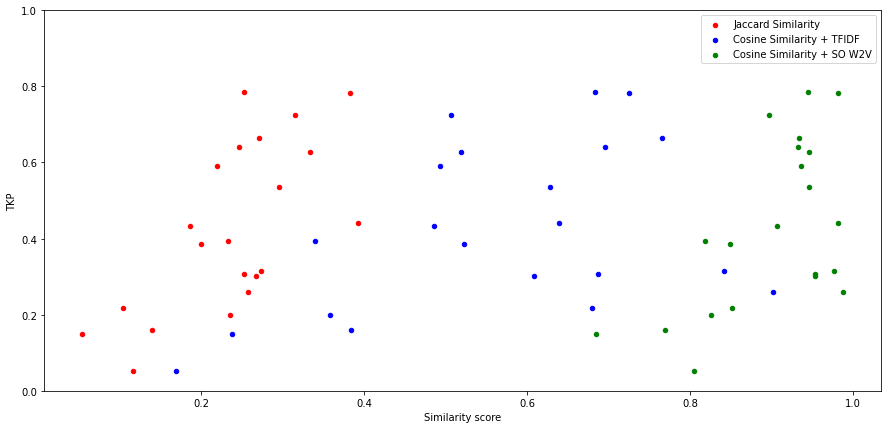

<Figure size 1080x432 with 0 Axes>

In [170]:
ax1 = scat_plot_df.plot(kind='scatter', 
                  x='Jaccard Sim', 
                  y='TKP',
                  color='Red',
                  label='Jaccard Similarity')

ax2 = scat_plot_df.plot(kind='scatter', 
                  x='Cos Sim + TFIDF', 
                  y='TKP',
                  color='Blue',
                  label='Cosine Similarity + TFIDF',
                  ax=ax1)


scat_plot_df.plot(kind='scatter', 
                  x='Cos Sim + W2V', 
                  y='TKP',
                  color='Green',
                  label='Cosine Similarity + SO W2V',
                  ylim=(0.0, 1.0),
                  ax=ax2)

plt.xlabel("Similarity score")
plt.ylabel("TKP")
plt.figure(figsize=(15,6))

In [171]:
p1_summ_df = p1_summ_df.reset_index(drop=True).set_index('Module')
p2_summ_df = p2_summ_df.reset_index(drop=True).set_index('Module')

Text(0, 0.5, 'P1 TKP')

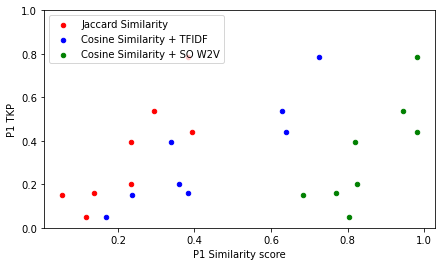

In [179]:
ax1 = p1_summ_df.plot(kind='scatter', 
                  x='Jaccard Sim', 
                  y='TKP',
                  color='Red',
                  label='Jaccard Similarity',
                  figsize=(7,4))

ax2 = p1_summ_df.plot(kind='scatter', 
                  x='Cos Sim + TFIDF', 
                  y='TKP',
                  color='Blue',
                  label='Cosine Similarity + TFIDF',
                  figsize=(7,4),
                  ax=ax1)


p1_summ_df.plot(kind='scatter', 
                  x='Cos Sim + W2V', 
                  y='TKP',
                  color='Green',
                  label='Cosine Similarity + SO W2V',
                  ylim=(0.0, 1.0),
                  figsize=(7,4),
                  ax=ax2)

plt.xlabel("P1 Similarity score")
plt.ylabel("P1 TKP")

Text(0, 0.5, 'P2 TKP')

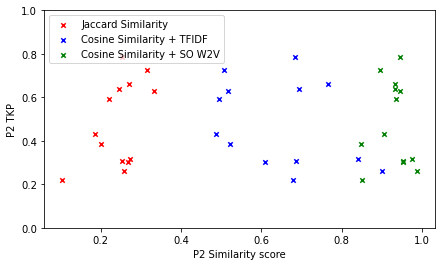

In [180]:
ax1 = p2_summ_df.plot(kind='scatter', 
                  x='Jaccard Sim', 
                  y='TKP',
                  color='Red',
                  label='Jaccard Similarity',
                  marker='x',
                  figsize=(7,4))

ax2 = p2_summ_df.plot(kind='scatter', 
                  x='Cos Sim + TFIDF', 
                  y='TKP',
                  color='Blue',
                  label='Cosine Similarity + TFIDF',
                  marker='x',
                  figsize=(7,4),
                  ax=ax1)


p2_summ_df.plot(kind='scatter', 
                  x='Cos Sim + W2V', 
                  y='TKP',
                  color='Green',
                  label='Cosine Similarity + SO W2V',
                  ylim=(0.0, 1.0),
                  marker='x',
                  figsize=(7,4),
                  ax=ax2)

plt.xlabel("P2 Similarity score")
plt.ylabel("P2 TKP")

## Baseline vs Concept Coverage

In [115]:
p1_lda_res_df['Jacc Sim'].to_list()

[0.13793103448275862,
 0.26666666666666666,
 0.08108108108108109,
 0.109375,
 0.23076923076923078,
 0.27692307692307694,
 0.17647058823529413,
 0.09433962264150944,
 0.3448275862068966,
 0.2459016393442623,
 0.2777777777777778]

In [116]:
p2_lda_res_df['Jacc Sim'].to_list()

[0.3275862068965517,
 0.234375,
 0.29508196721311475,
 0.2807017543859649,
 0.20930232558139536,
 0.17391304347826086,
 0.28205128205128205,
 0.30357142857142855,
 0.23529411764705882,
 0.16417910447761194,
 0.3148148148148148,
 0.2982456140350877,
 0.32142857142857145,
 0.22950819672131148]

In [117]:
p1_baseline_res

[0.21, 0.603, 0.131, 0.769, 0.502, 0.525, 0.543, 0.322, 0.798, 0.544, 0.843]

In [118]:
p2_baseline_res

[0.595,
 0.593,
 0.083,
 0.683,
 0.14,
 0.186,
 0.728,
 0.57,
 0.747,
 0.635,
 0.284,
 0.41,
 0.513,
 0.145]

In [119]:
p1_modules

['maven-failsafe-plugin',
 'maven-surefire-common',
 'maven-surefire-plugin',
 'maven-surefire-report-plugin',
 'surefire-api',
 'surefire-booter',
 'surefire-extensions-api',
 'surefire-grouper',
 'surefire-logger-api',
 'surefire-providers',
 'surefire-report-parser']

In [120]:
p2_modules

['dubbo-cluster',
 'dubbo-common',
 'dubbo-compatible',
 'dubbo-config',
 'dubbo-configcenter',
 'dubbo-container',
 'dubbo-filter',
 'dubbo-metadata',
 'dubbo-monitor',
 'dubbo-plugin',
 'dubbo-registry',
 'dubbo-remoting',
 'dubbo-rpc',
 'dubbo-serialization']

In [121]:
p1_bc = pd.DataFrame(np.transpose([p1_modules, p1_baseline_res, p1_lda_res_df['Jacc Sim'].to_list()]), columns=['Module', 'Baseline', 'Concept Coverage'])

In [122]:
p2_bc = pd.DataFrame(np.transpose([p2_modules, p2_baseline_res, p2_lda_res_df['Jacc Sim'].to_list()]), columns=['Module', 'Baseline', 'Concept Coverage'])

In [123]:
summ_bc = pd.concat([p1_bc, p2_bc]).set_index('Module')
summ_bc['Baseline'] = summ_bc['Baseline'].astype(float)
summ_bc['Concept Coverage'] = summ_bc['Concept Coverage'].astype(float)
summ_bc

,Baseline,Concept Coverage
Module,,
maven-failsafe-plugin,0.210,0.137931
maven-surefire-common,0.603,0.266667
maven-surefire-plugin,0.131,0.081081
maven-surefire-report-plugin,0.769,0.109375
surefire-api,0.502,0.230769
surefire-booter,0.525,0.276923
surefire-extensions-api,0.543,0.176471
surefire-grouper,0.322,0.094340
surefire-logger-api,0.798,0.344828


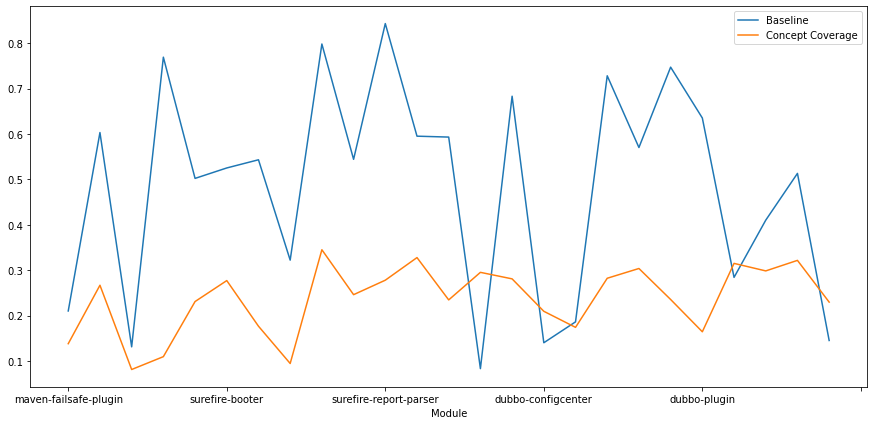

In [124]:
summ_bc.plot(kind='line')

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


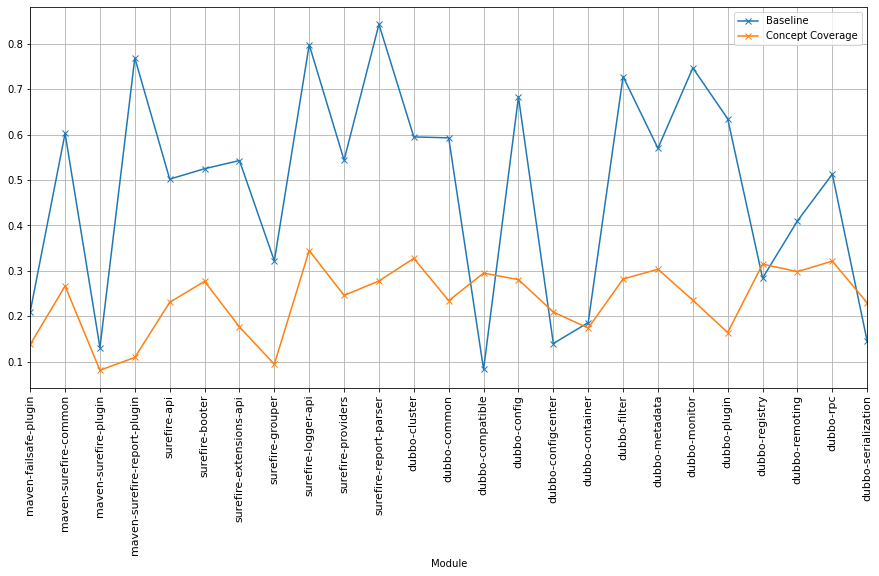

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,7)

summ_bc.plot(grid=True, marker='x', xlim=(0,24))
plt.xticks(list(range(len(p1_modules+p2_modules))), summ_bc.index, fontsize=11, rotation=90)
plt.show()